# Nettoyage et Exploration Générale

In [ ]:
# Import librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime

from pyproj import Geod
from datetime import timedelta

In [ ]:
# If working in google colab
# Import files
from google.colab import files
uploaded = files.upload()

Saving olist_sellers_dataset.csv to olist_sellers_dataset.csv
Saving product_category_name_translation.csv to product_category_name_translation.csv
Saving olist_products_dataset.csv to olist_products_dataset.csv
Saving olist_order_reviews_dataset.csv to olist_order_reviews_dataset.csv
Saving olist_orders_dataset.csv to olist_orders_dataset.csv
Saving olist_order_items_dataset.csv to olist_order_items_dataset.csv
Saving olist_order_payments_dataset.csv to olist_order_payments_dataset.csv
Saving olist_geolocation_dataset.csv to olist_geolocation_dataset.csv
Saving olist_customers_dataset.csv to olist_customers_dataset.csv


In [ ]:
# If working in google colab
# Read file
df_customers = pd.read_csv(io.BytesIO(
    uploaded['olist_customers_dataset.csv']))
df_items = pd.read_csv(io.BytesIO(
    uploaded['olist_order_items_dataset.csv']))
df_reviews = pd.read_csv(io.BytesIO(
    uploaded['olist_order_reviews_dataset.csv']))
df_payments = pd.read_csv(io.BytesIO(
    uploaded['olist_order_payments_dataset.csv']))
df_orders = pd.read_csv(io.BytesIO(
    uploaded['olist_orders_dataset.csv']))
df_products = pd.read_csv(io.BytesIO(
    uploaded['olist_products_dataset.csv']))
df_sellers = pd.read_csv(io.BytesIO(
    uploaded['olist_sellers_dataset.csv']))
df_products_name = pd.read_csv(io.BytesIO(
    uploaded['product_category_name_translation.csv']))
df_geolocalisation = pd.read_csv(io.BytesIO(
    uploaded['olist_geolocation_dataset.csv']))

In [ ]:
# If working in Jupyter
# Read files
df_customers = pd.read_csv('olist_customers_dataset.csv')
df_items = pd.read_csv('olist_order_items_dataset.csv')
df_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
df_payments = pd.read_csv('olist_order_payments_dataset.csv')
df_orders = pd.read_csv('olist_orders_dataset.csv')
df_products = pd.read_csv('olist_products_dataset.csv')
df_sellers = pd.read_csv('olist_sellers_dataset.csv')
df_products_name = pd.read_csv('product_category_name_translation.csv')
df_geolocalisation = pd.read_csv('olist_geolocation_dataset.csv')

In [ ]:
liste_df = [
    df_customers,
    df_items,
    df_reviews,
    df_payments,
    df_orders,
    df_products,
    df_sellers,
    df_products_name,
    df_geolocalisation,
]

In [ ]:
df_customers.sample(5)

customer_id                customer_unique_id  \
66154  7fb28b72559f15550a82e040b117dcc6  3188c007dd2e0cad868f43a39274c6e8   
77446  dfd239feb53ae84d8c50baab69d38133  826c449cf40b8267142abd5c6e753ae2   
61984  0e2a4c9eb384b1ded134d519b6baa0fe  e5f02d7d17c6b96e78f078a555516a23   
56786  dfd18dbef42d2d617d822af592b2fa62  9ee03e957df37196acff32001e29894f   
36696  2985a69f43a3e22e6147e29d5af17093  ba2da7dd06ec9addbc1193c8f314f09e   

       customer_zip_code_prefix          customer_city customer_state  
66154                     95660            tres coroas             RS  
77446                     73802                formosa             GO  
61984                     15013  sao jose do rio preto             SP  
56786                     71917               brasilia             DF  
36696                      8461              sao paulo             SP

In [ ]:
df_items.sample(5)

order_id  order_item_id  \
46249  691123bd7667e28df807da5274073e1f              1   
95560  d8c2d5ded5aae20ac6a6e9ef34d9c3dd              1   
40052  5b2bc181b79df76b831c2c73bfa96c08              1   
79535  b4e6acaa8099879abe597c7f79f0c2b3              1   
95527  d8ae8292c42789ec8fa46d9abc72b493              1   

                             product_id                         seller_id  \
46249  3eb235314db36995d65c80718db4fd85  ea8482cd71df3c1969d7b9473ff13abc   
95560  226b3973913b6154cb1102026822360d  ad420dd0c4f92f8af951ac24b86d0cf5   
40052  a50acd33ba7a8da8e9db65094fa990a4  8581055ce74af1daba164fdbd55a40de   
79535  39e3d246a3edd7b9ceba203155c1542c  1835b56ce799e6a4dc4eddc053f04066   
95527  488f6ad202b2656d346498ec03963de1  dbc22125167c298ef99da25668e1011f   

       shipping_limit_date   price  freight_value  
46249  2017-12-26 09:50:57   24.99          17.63  
95560  2018-07-25 12:03:12  160.00          19.22  
40052  2018-04-03 16:55:33  117.30          21.73  
79535  2017-11-30 13:47:32   38.50          11.85  
95527  2017-08-25 13:55:15   43.90          13.37

In [ ]:
df_reviews.sample(5)

review_id                          order_id  \
73292  c230a71ca66b6e2286c972ce9ae8de68  7d923e68a94ad8d7a6f8e5041a147c17   
89819  6dea2c9fe5bf75594c6b474e88e7e2f3  8e4614fbf9caf0cbe6bb3d1ac53d4f82   
44515  b5cbd320121540f101fd774cacf10518  baa236e595125eae9865b38b2f1b7240   
4843   f6b4421edb12bf2fcdca4cd184bbed89  e072ad0e4dabf06b9e381c614c27c903   
70975  162dabc4bb037d92a1497b3c2358038d  b8871d60cf4ec81490da7658b25c1c04   

       review_score review_comment_title  \
73292             5                  NaN   
89819             5                  NaN   
44515             5                  NaN   
4843              1                  NaN   
70975             2        Não recomendo   

                           review_comment_message review_creation_date  \
73292                                         NaN  2018-01-30 00:00:00   
89819                                         NaN  2018-07-14 00:00:00   
44515                                         NaN  2017-03-11 00:00:00   
4843                                          NaN  2018-03-21 00:00:00   
70975  Produto com baixa qualidade e resistência.  2018-05-19 00:00:00   

      review_answer_timestamp  
73292     2018-01-31 01:23:06  
89819     2018-07-14 16:04:20  
44515     2017-03-12 23:29:26  
4843      2018-03-21 14:45:43  
70975     2018-05-23 12:21:29

In [ ]:
df_payments.sample(5)

order_id  payment_sequential payment_type  \
4784   fb8c84f49d464b75f05a3de37923fc87                   1  credit_card   
17693  29baa2288a6c833c165b32b46e4ffcce                   1  credit_card   
17475  69f54f52631eb8ea8bec66cb902cf54e                   3      voucher   
66369  708d3d7c0c996a92a48a8cf501f6fd8b                   1  credit_card   
33649  97a0c3698151724b828f425d511d224c                   1  credit_card   

       payment_installments  payment_value  
4784                     10        1828.41  
17693                     6         245.89  
17475                     1          14.32  
66369                    10        1233.65  
33649                     5         158.43

In [ ]:
df_orders.sample(5)

order_id                       customer_id  \
59996  d81092e5b4741adbb395bb5aba884c36  78d035468d20932fde6cde700713c2f6   
75084  e47353f32490612c3a0666507c09b8fb  b921e4c10af0bee895e4ae1ebeeb46be   
53752  83e064bc8c54fef04698774d069eed59  800cb37f32d964f78ffe5ce8dbe7565f   
70862  207fb26690b0cac4a3d8b36808b54833  ac14c96de0060afc775af479d4fd32de   
4953   6700e4a77b114b2f0fac57e19e6182d6  871d486e1b7f81d41839e0ddee6cf90a   

      order_status order_purchase_timestamp    order_approved_at  \
59996    delivered      2017-12-06 14:56:40  2017-12-06 15:12:03   
75084    delivered      2017-10-22 21:10:34  2017-10-22 21:21:22   
53752    delivered      2017-09-01 09:36:13  2017-09-05 04:26:02   
70862    delivered      2017-04-23 00:32:23  2017-04-24 20:45:17   
4953     delivered      2018-01-14 13:21:54  2018-01-16 03:35:39   

      order_delivered_carrier_date order_delivered_customer_date  \
59996          2017-12-07 15:58:46           2017-12-16 12:47:14   
75084          2017-10-24 18:39:39           2017-10-26 21:55:55   
53752          2017-09-05 19:17:52           2017-09-14 18:07:39   
70862          2017-04-25 17:25:21           2017-05-09 11:04:10   
4953           2018-01-17 19:19:06           2018-01-31 01:21:40   

      order_estimated_delivery_date  
59996           2018-01-04 00:00:00  
75084           2017-11-03 00:00:00  
53752           2017-09-22 00:00:00  
70862           2017-05-25 00:00:00  
4953            2018-02-05 00:00:00

In [ ]:
df_products.sample(5)

product_id  product_category_name  \
1190   a4c27cf9767fe2b589251c764b891eda             perfumaria   
16020  a89f9c4cd59eaed03ef9cd685c41a8b2             brinquedos   
13224  f906dbac60e535e0e5c313eaf7c5bfce              telefonia   
13260  7d49a5410d8c53d37ad9167e32e65e1c  utilidades_domesticas   
20866  00aa70fd749f3b9ce8ca4bc914a9e7b1       moveis_decoracao   

       product_name_lenght  product_description_lenght  product_photos_qty  \
1190                  58.0                      1061.0                 2.0   
16020                 54.0                       668.0                 8.0   
13224                 56.0                       316.0                 1.0   
13260                 60.0                       240.0                 1.0   
20866                 26.0                       345.0                 1.0   

       product_weight_g  product_length_cm  product_height_cm  \
1190              368.0               22.0               15.0   
16020            1300.0               52.0                9.0   
13224             150.0               19.0                4.0   
13260            2350.0               40.0               10.0   
20866             700.0               16.0               16.0   

       product_width_cm  
1190               18.0  
16020              32.0  
13224              11.0  
13260              35.0  
20866              16.0

In [ ]:
df_sellers.sample(5)

seller_id  seller_zip_code_prefix seller_city  \
559   3504c0cb71d7fa48d967e0e4c94d59d9                    9350        maua   
2264  5f67c6082caacb26e431a7b17940cece                   87083     maringa   
1952  3d01d1c414c44b5943a09619ff3853cb                   13040    campinas   
1530  02b72cdeb9cfcc429f1af6f4e3f3b737                   14940    ibitinga   
122   9d39404483343dd55c7ae254494d8388                    1044   sao paulo   

     seller_state  
559            SP  
2264           PR  
1952           SP  
1530           SP  
122            SP

In [ ]:
df_products_name.sample(5)

product_category_name product_category_name_english
32            eletronicos                   electronics
68        fraldas_higiene           diapers_and_hygiene
60             la_cuisine                    la_cuisine
3         cama_mesa_banho                bed_bath_table
7   utilidades_domesticas                    housewares

In [ ]:
df_geolocalisation.sample(5)

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
899928                        87970       -22.762813       -52.983798   
414600                        20540       -22.925371       -43.249922   
410313                        20541       -22.917309       -43.240251   
496153                        26255       -22.747010       -43.425603   
218602                         9030       -23.670774       -46.524291   

       geolocation_city geolocation_state  
899928    nova londrina                PR  
414600   rio de janeiro                RJ  
410313   rio de janeiro                RJ  
496153      nova iguacu                RJ  
218602      santo andre                SP

#### Vérifier les doublons dans le fichier df_geolocalisation

- Vérifier si les lat et long sont identiques pour les zipcodes en doublons
- Remplacer les doublons par une moyenne des lat et long par zip codes

In [ ]:
# Show duplicated for rows 'geolocation_zip_code_prefix' and 'geolocation_lat'
df_geolocalisation[df_geolocalisation.duplicated(
    ['geolocation_zip_code_prefix', 'geolocation_lat'],
    keep=False)]

geolocation_zip_code_prefix  ...  geolocation_state
0                               1037  ...                 SP
1                               1046  ...                 SP
2                               1046  ...                 SP
6                               1047  ...                 SP
7                               1013  ...                 SP
...                              ...  ...                ...
1000153                        99970  ...                 RS
1000154                        99950  ...                 RS
1000159                        99900  ...                 RS
1000160                        99950  ...                 RS
1000162                        99950  ...                 RS

[412932 rows x 5 columns]

In [ ]:
# Show duplicated for rows 'geolocation_zip_code_prefix' and 'geolocation_lat'
df_geolocalisation[df_geolocalisation.duplicated(
    ['geolocation_zip_code_prefix', 'geolocation_lng'],
    keep=False)]

geolocation_zip_code_prefix  ...  geolocation_state
0                               1037  ...                 SP
1                               1046  ...                 SP
2                               1046  ...                 SP
6                               1047  ...                 SP
7                               1013  ...                 SP
...                              ...  ...                ...
1000153                        99970  ...                 RS
1000154                        99950  ...                 RS
1000159                        99900  ...                 RS
1000160                        99950  ...                 RS
1000162                        99950  ...                 RS

[412728 rows x 5 columns]

In [ ]:
df_geolocalisation.shape

(1000163, 5)

In [ ]:
# Remove outliers based on known lat and lon for Brazil

# Farthest North point is at 5 degrees
df_geolocalisation = df_geolocalisation[
    df_geolocalisation.geolocation_lat <= 5.27438888]

# Farthest West point is at 73 degrees
df_geolocalisation = df_geolocalisation[
    df_geolocalisation.geolocation_lng >= -73.98283055]

# Farthest South point is at 33 degrees
df_geolocalisation = df_geolocalisation[
    df_geolocalisation.geolocation_lat >= -33.75116944]

# Farthest East point is at 34 degrees
df_geolocalisation = df_geolocalisation[
    df_geolocalisation.geolocation_lng <= -34.79314722]

In [ ]:
# Keep a mean for lat and long by zip codes
df_geolocalisation = df_geolocalisation.groupby(
    'geolocation_zip_code_prefix').mean().reset_index()

In [ ]:
df_geolocalisation.shape

(19010, 3)

## Informations générales sur les df

In [ ]:
"""We are creating a function for exploring dataframes.

We print :
- the shape of the table,
- general informations,
- a list of the columns,
- the types of data in each columns,
- a count of the types of data,
- the missing rate per column sorted by ascending order.
"""


def exploration(liste_df):
    for df in liste_df:
        # Shape of the table
        sh = df.shape
        print('Dimensions du df {}'.format(sh))
        # General informations
        inf = df.info()
        print('Info sur le df {}'.format(inf))
        # List all columns
        liste_col = list(df.columns.values)
        print('Liste des colonnes du df {}'.format(liste_col))
        # Types of data in each column
        types_col = df.dtypes
        print('Info sur les colonnes du df {}'.format(types_col))
        # Count of the types of data in each column of the df
        count_types_col = df.dtypes.value_counts()
        print('Compte des types de colonnes du df {}'.format(count_types_col))
        # Missing rate per column
        missing_rate = df.isna().sum()/df.shape[0]
        # Sorting out the missing rate by ascending order
        missing_rate_sort = missing_rate.sort_values(ascending=True)
        print('Taux de données manquantes par colonne '
              'du df :', missing_rate_sort)
        print('##########################################')



In [ ]:
exploration(liste_df)

Dimensions du df (99441, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
Info sur le df None
Liste des colonnes du df ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']
Info sur les colonnes du df customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object
Compte des types de colonnes du df object    4
int64     1
dtype: int64
T

#### Vérifier les doublons dans le fichier df_geolocalisation

In [ ]:
# Show duplicated for rows 'geolocation_zip_code_prefix' and 'geolocation_lat'
df_geolocalisation[df_geolocalisation.duplicated(
    ['geolocation_zip_code_prefix', 'geolocation_lat'],
    keep=False)]

Empty DataFrame
Columns: [geolocation_zip_code_prefix, geolocation_lat, geolocation_lng]
Index: []

In [ ]:
# Show duplicated for rows 'geolocation_zip_code_prefix' and 'geolocation_lat'
df_geolocalisation[df_geolocalisation.duplicated(
    ['geolocation_zip_code_prefix', 'geolocation_lng'],
    keep=False)]

Empty DataFrame
Columns: [geolocation_zip_code_prefix, geolocation_lat, geolocation_lng]
Index: []

In [ ]:
df_geolocalisation.shape

(19010, 3)

### Statistiques descriptives

In [ ]:
for df in liste_df:
    print(df.describe())

       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000
       order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%         1.000000     134.900000      21.150000
max        21.000000    6735.000000     409.680000
        review_score
count  100000.000000
mean        4.070890
std         1.359663
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
       payment_sequential  payment_installments  payment_value
c

## Concatener les df

In [ ]:
"""Concatenating the data frames.

We are concatenating all the data frames together
based on their shared variables.
"""

df_payments.shape

(103886, 5)

In [ ]:
df_items.shape

(112650, 7)

In [ ]:
# Concatenate 'df_payments' and 'df_items'
df1 = df_payments.merge(df_items, on=['order_id'], how='outer')
df1.sample(5)

order_id  ...  freight_value
104434  c262594e0801a04a4946d2f9a16972cd  ...          16.47
23628   c56063fb44250985a4649811b257edc7  ...           7.71
4129    afd09879ff7489d300d0ebeab6348e35  ...          14.10
49741   bacfb12b369a42b37e0246c786bf4637  ...          52.95
33072   7f8627b25121727150b46207617a168a  ...          39.49

[5 rows x 11 columns]

In [ ]:
df1.shape

(118434, 11)

In [ ]:
df_orders.shape

(99441, 8)

In [ ]:
# Concatenate 'df1' and 'df_orders'
df2 = df1.merge(df_orders, on=['order_id'], how='outer')
df2.sample(5)

order_id  ...  order_estimated_delivery_date
107956  4f77cfb31872d2f1c30def178961585e  ...            2018-04-03 00:00:00
79991   4fab03676c2144ed35264324eef0ea12  ...            2018-08-29 00:00:00
39466   d6eaa14b089c4b3a1a97f905d9836018  ...            2017-10-27 00:00:00
41383   2e59385ec33f6734c6e53346083771aa  ...            2017-11-28 00:00:00
103211  c9ebdcaac4bc255b035e5e250a45f7d0  ...            2017-12-15 00:00:00

[5 rows x 18 columns]

In [ ]:
df2.shape

(118434, 18)

In [ ]:
df_reviews.shape

(100000, 7)

In [ ]:
# Concatenate 'df2' and 'df_reviews'
df3 = df2.merge(df_reviews, on=['order_id'], how='outer')
df3.sample(5)

order_id  ...  review_answer_timestamp
2179    f73c0c32115b0bbfd5769c0cf67fb1c7  ...      2018-01-26 08:00:46
115858  213d94bed720c45326d1fea2f7fc2b92  ...      2018-07-31 11:33:40
70833   d4ff9293d6a76a8bcc5fc1fbbbda35e5  ...      2018-04-18 00:14:53
72793   b6403787453855be6332055dc2d6bde9  ...      2018-01-04 21:25:14
17477   4d40fda96f0b038987f7fcfe84a83c56  ...      2018-03-10 12:17:50

[5 rows x 24 columns]

In [ ]:
df3.shape

(119151, 24)

In [ ]:
df_customers.shape

(99441, 5)

In [ ]:
# Concatenate 'df3' and 'df_customers'
df4 = df3.merge(df_customers, on=['customer_id'], how='outer')
df4.sample(5)

order_id  ...  customer_state
62320   1755f2445de4dbedff7644056e446759  ...              SP
104238  17b64a39e956f1ff14d42a2f76a37305  ...              AM
9435    c05d6a79e55da72ca780ce90364abed9  ...              SP
47719   124d67dd63d2412c950eadb79bf29006  ...              BA
6925    1e0ad62d9e96fd47434997dfa81497a8  ...              MA

[5 rows x 28 columns]

In [ ]:
df4.shape

(119151, 28)

In [ ]:
df_sellers.shape

(3095, 4)

In [ ]:
# Concatenate 'df4' and 'df_sellers'
df5 = df4.merge(df_sellers, on=['seller_id'], how='outer')
df5.sample(5)

order_id  ...  seller_state
73547   220ecdab5fbfc0828024fa22d8a9acb2  ...            SP
116681  f7057bf47ad8d184d0857bdaee0a1603  ...            SP
57368   1f48aeb449520a42d9d2e7e1783e5a55  ...            SP
114073  5754d3172f19f363edbaf03691b9f989  ...            PR
39476   061b74bca735bb2c1953e40bc098101d  ...            SP

[5 rows x 31 columns]

In [ ]:
df5.shape

(119151, 31)

In [ ]:
df_products.shape

(32951, 9)

In [ ]:
# Concatenate 'df5' and 'df_products'
df6 = df5.merge(df_products, on=['product_id'], how='outer')
df6.sample(5)

order_id  ...  product_width_cm
80296  e6a66a8350bb88497954d37688ab123e  ...              32.0
46611  0e750b2937251a81713e22e816179c93  ...              20.0
72678  bbf8658c763a5e7e4d2be2e05b39fd42  ...              19.0
11136  b9e94fdb4a15c04cbde632c381826608  ...              15.0
95532  6d4836ff2cb88dc5916769bc7cbfaefc  ...              23.0

[5 rows x 39 columns]

In [ ]:
df6.shape

(119151, 39)

In [ ]:
df_products_name.shape

(71, 2)

In [ ]:
# Concatenate 'df6' and 'df_products_name'
df7 = df6.merge(df_products_name, on=['product_category_name'], how='outer')
df7.sample(5)

order_id  ...  product_category_name_english
111894  22c53f78fdc3a9664521f2f78f15e6d8  ...            luggage_accessories
26651   9c85518f7f627b297892da0556f299bc  ...                 bed_bath_table
11471   6e424a06931a556c15b962b40017f690  ...                  health_beauty
3889    5add1b45cd9bc70f43535f349cfed8ce  ...                           auto
83029   221b863362f9e6ec4ec0a4f08608a69b  ...                   garden_tools

[5 rows x 40 columns]

In [ ]:
df7.shape

(119151, 40)

In [ ]:
df_geolocalisation.shape

(19010, 3)

In [ ]:
# Concatenate 'df7' and 'df_geolocalisation' to localise the customers
df8 = df7.merge(df_geolocalisation, left_on=['customer_zip_code_prefix'],
                right_on=['geolocation_zip_code_prefix'],
                how='left')
df8.sample(5)

order_id  ...  geolocation_lng
13118  f6c9fe3ff737f5568e352b5b2afcf112  ...       -44.203700
45727  5805ab89b5c04778c691daba25a93341  ...       -46.589174
87090  ca1e3df727868ef1138ae5de78a1f611  ...       -38.619175
91184  f9ae6383e4dfb7b5d309593d052000d6  ...       -46.469989
5522   80012b4a007a0b502a4dd3c0d6224abd  ...       -42.007889

[5 rows x 43 columns]

In [ ]:
df8.shape

(119151, 43)

In [ ]:
# Renaming columns
# geolocation_lat : customer_geolocation_lat
# geolocation_lng : customer_geolocation_lng

df8.rename(columns={'geolocation_lat': 'customer_geolocation_lat',
                    'geolocation_lng': 'customer_geolocation_lng'},
           inplace=True)

df8.drop(columns=['geolocation_zip_code_prefix'], inplace=True)

df8.sample(5)

order_id  ...  customer_geolocation_lng
49054  48a310c40917683b0b399849b50cb76f  ...                -42.745689
88618  672d0085da7d96c6350cb54170e4b944  ...                -43.462656
51207  0f67e615d797da223ac5601b9b08b180  ...                -46.539934
37259  81b34538b99858b1645dae735cc8f732  ...                -49.952195
99193  faff16fc16c4344af7f60cedbbf6cb2c  ...                -52.464551

[5 rows x 42 columns]

In [ ]:
# Concatenate 'df8' and 'df_geolocalisation' to localise the sellers
df9 = df8.merge(df_geolocalisation, left_on=['seller_zip_code_prefix'],
                right_on=['geolocation_zip_code_prefix'],
                how='left')
df9.sample(5)

order_id  ...  geolocation_lng
105758  e739161210dba9b6debb04897d5e7046  ...       -43.861688
57773   d5aa77f5eed8acdd598a687ccc27cfa8  ...       -46.853963
114312  13cc20205a5d08b532f127b6fbf0f370  ...       -46.612840
28865   9146c78cd5cb5e53ee985a7feb72e76f  ...       -48.829744
59147   37467cda81e62d78bf86acfaa7d9b030  ...       -48.829744

[5 rows x 45 columns]

In [ ]:
df9.shape

(119151, 45)

In [ ]:
# Renaming columns
# geolocation_lat : seller_geolocation_lat
# geolocation_lng : seller_geolocation_lng

df9.rename(columns={'geolocation_lat': 'seller_geolocation_lat',
                    'geolocation_lng': 'seller_geolocation_lng'},
           inplace=True)

df9.drop(columns=['geolocation_zip_code_prefix'], inplace=True)

df9.sample(5)

order_id  ...  seller_geolocation_lng
36516   fab5dff71a23a54ed252a564cbfd4826  ...              -46.536869
103301  00a57dfbb049fbaae10763e2cf15f797  ...              -51.866703
76821   42ccc07cc09ff8b0c392b43f125ae1d7  ...              -46.762875
8167    57b9cf4a37a14014639920e1f6d81e52  ...              -47.074284
73976   0da349c060ac948eb81278fa539fd719  ...              -46.667265

[5 rows x 44 columns]

In [ ]:
df9.shape

(119151, 44)

In [ ]:
df_tot = df9

In [ ]:
df_tot.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'customer_geolocation_lat',
       'customer_g

In [ ]:
# List all the columns
columns = list(df_tot.columns.values)
columns

['order_id',
 'payment_sequential',
 'payment_type',
 'payment_installments',
 'payment_value',
 'order_item_id',
 'product_id',
 'seller_id',
 'shipping_limit_date',
 'price',
 'freight_value',
 'customer_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'review_id',
 'review_score',
 'review_comment_title',
 'review_comment_message',
 'review_creation_date',
 'review_answer_timestamp',
 'customer_unique_id',
 'customer_zip_code_prefix',
 'customer_city',
 'customer_state',
 'seller_zip_code_prefix',
 'seller_city',
 'seller_state',
 'product_category_name',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'product_category_name_english',
 'customer_geolocation_lat',
 'customer_geolocation_lng',
 'seller_geolocation_lat',
 'seller_geolocation_lng']

## Exploration du df_tot 

In [ ]:
df_list = [df_tot]

In [ ]:
exploration(df_list)

Dimensions du df (119151, 44)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 119151 entries, 0 to 119150
Data columns (total 44 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119151 non-null  object 
 1   payment_sequential             119148 non-null  float64
 2   payment_type                   119148 non-null  object 
 3   payment_installments           119148 non-null  float64
 4   payment_value                  119148 non-null  float64
 5   order_item_id                  118318 non-null  float64
 6   product_id                     118318 non-null  object 
 7   seller_id                      118318 non-null  object 
 8   shipping_limit_date            118318 non-null  object 
 9   price                          118318 non-null  float64
 10  freight_value                  118318 non-null  float64
 11  customer_id                    119151 non-null  object 
 12  

In [ ]:
# Count the columns types of the df
df_tot.dtypes.value_counts()

object     24
float64    18
int64       2
dtype: int64

([<matplotlib.patches.Wedge at 0x7faaea69d9d0>,
 [Text(-1.187785721535642, -0.170777866587138, 'object'),
  Text(1.2999999999999945, 1.2171478379974597e-07, 'float'),
  Text(0.19924064973674066, 1.3857500364396467, 'int')])

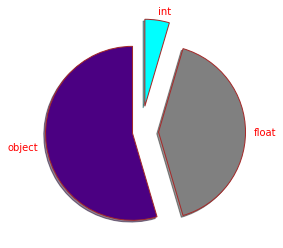

In [ ]:
# Make a graphic with the count the columns types of the df
piechart = df_tot.dtypes.value_counts()

# Add legend
legend = ['object', 'float', 'int']

# Creating explode data
explode = (0.1, 0.2, 0.3, )

# Creating color parameters
colors = ('indigo',
          'grey',
          'cyan')

# Wedge properties
wp = {'linewidth': 1, 'edgecolor': 'brown'}

plt.pie(piechart,
        explode=explode,
        labels=legend,
        shadow=True,
        colors=colors,
        startangle=90,
        wedgeprops=wp,
        textprops=dict(color='red'))

### Données manquantes et taux de remplissage

<AxesSubplot:title={'center':'Remplissage des diverses colonnes du data set'}>

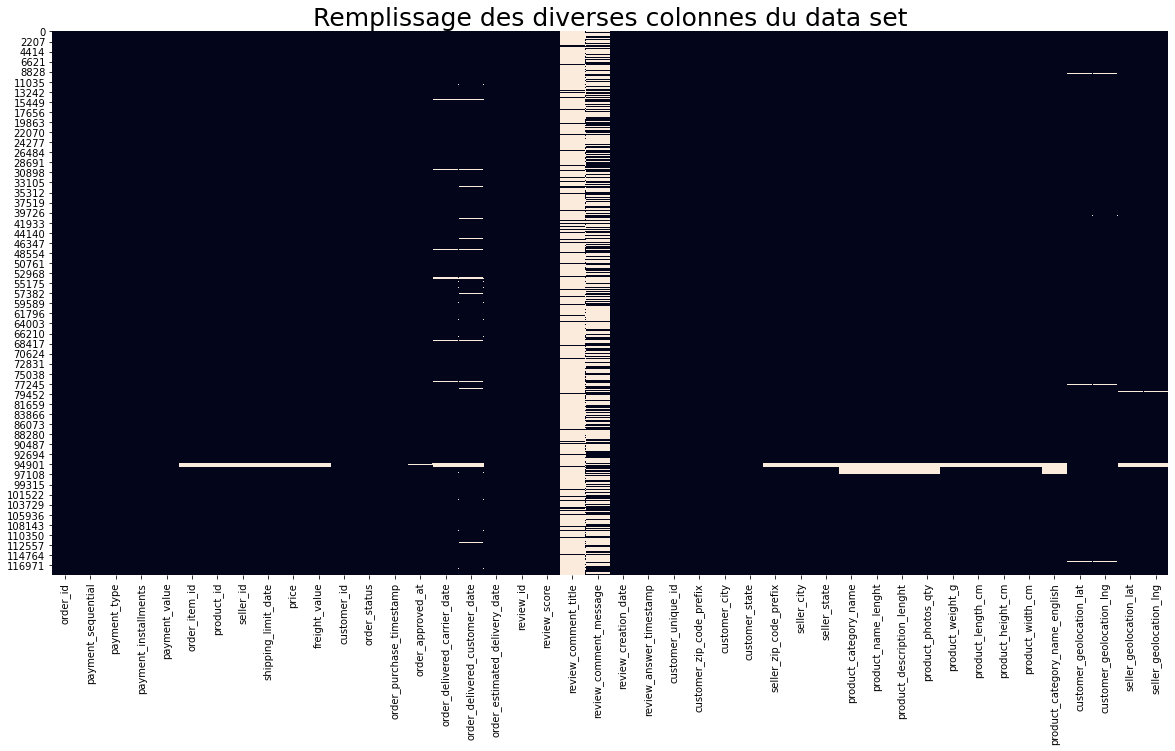

In [ ]:
""""We create a heatmap to visualise the filling rate of the data set"""

# Size
plt.figure(figsize=(20, 10))

# Title
plt.title('Remplissage des diverses colonnes du data set', size=25)

# Rotate xticks at 45°
plt.xticks(rotation=45)

sns.heatmap(df_tot.isna(), cbar=False) 

Taux de données manquantes par colonnedu df order_id                         0.000000
review_score                     0.000000
order_purchase_timestamp         0.000000
order_status                     0.000000
customer_id                      0.000000
review_creation_date             0.000000
review_answer_timestamp          0.000000
review_id                        0.000000
customer_unique_id               0.000000
customer_city                    0.000000
customer_state                   0.000000
customer_zip_code_prefix         0.000000
order_estimated_delivery_date    0.000000
payment_value                    0.000025
payment_installments             0.000025
payment_type                     0.000025
payment_sequential               0.000025
order_approved_at                0.001486
customer_geolocation_lat         0.002711
customer_geolocation_lng         0.002711
freight_value                    0.006991
price                            0.006991
shipping_limit_date             

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

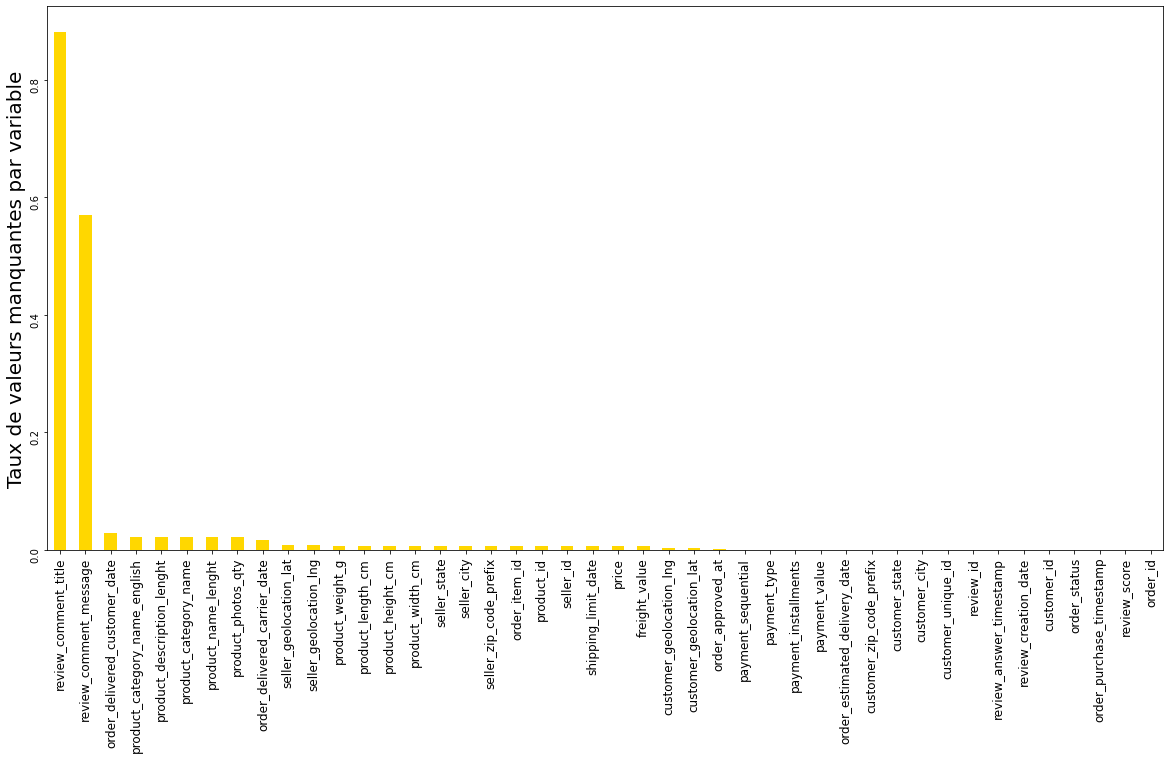

In [ ]:
# Rate of missing values per column
missing_rate = df_tot.isna().sum()/df_tot.shape[0]

# Sort by ascending order
missing_rate_sort = missing_rate.sort_values(ascending=True)
print('Taux de données manquantes par colonne'
      'du df {}'.format(missing_rate_sort))

# Fig size
plt.figure(figsize=(20, 10))

# Show a graphic of the missing rate by columns
missing_rate.sort_values(ascending=False).plot.bar(color='gold')

# Title
plt.ylabel('Taux de valeurs manquantes par variable', size=20)
# plt.title()

# xlabels size
plt.xticks(size=12)

# Rotate xticks at 90°
plt.yticks(rotation=90)

# plt.show()

Taux de remplissage des variablesdu df order_id                         1.000000
customer_city                    1.000000
order_status                     1.000000
order_purchase_timestamp         1.000000
order_estimated_delivery_date    1.000000
review_id                        1.000000
review_score                     1.000000
review_creation_date             1.000000
review_answer_timestamp          1.000000
customer_unique_id               1.000000
customer_zip_code_prefix         1.000000
customer_state                   1.000000
customer_id                      1.000000
payment_value                    0.999975
payment_installments             0.999975
payment_type                     0.999975
payment_sequential               0.999975
order_approved_at                0.998514
customer_geolocation_lng         0.997289
customer_geolocation_lat         0.997289
seller_id                        0.993009
price                            0.993009
shipping_limit_date              0.99

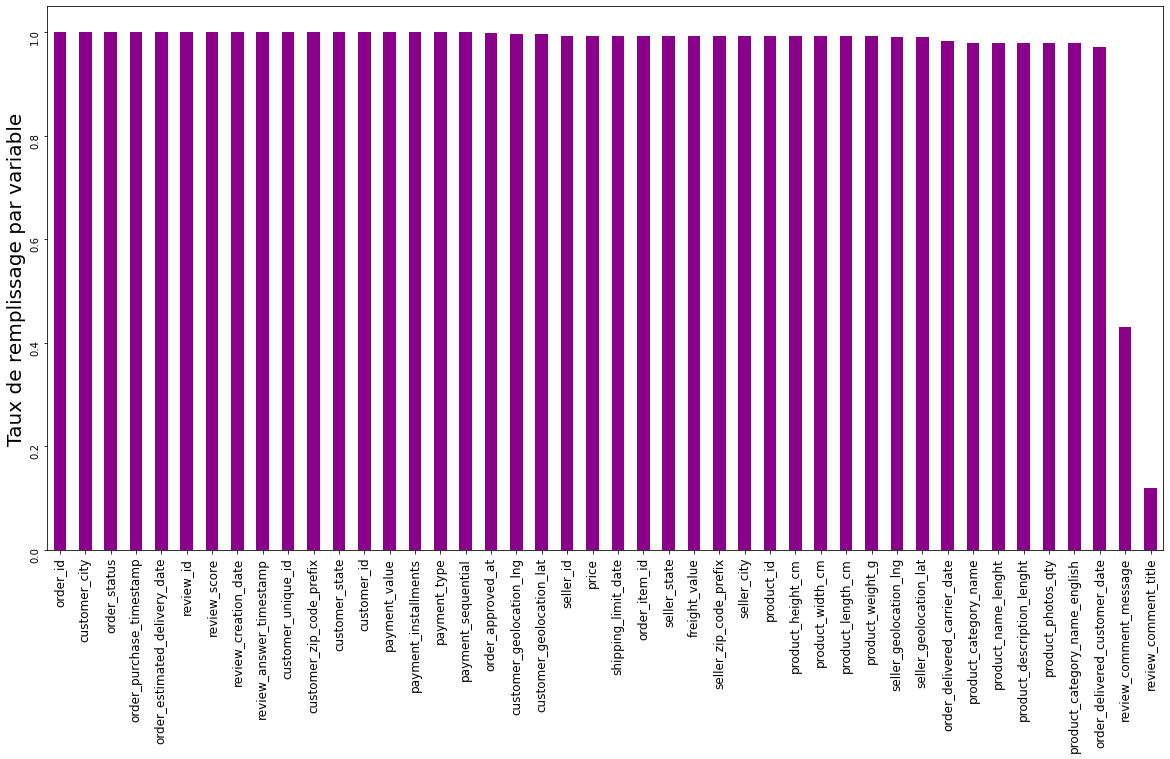

In [ ]:
# Calculate filling rate
filling_rate = 1 - missing_rate

# Sort by ascending order
filling_rate_sort = filling_rate.sort_values(ascending=False)
print('Taux de remplissage des variables'
      'du df {}'.format(filling_rate_sort))

# Fig size
plt.figure(figsize=(20, 10))

#  Show a graphic of the filling rate by columns
filling_rate.sort_values(ascending=False).plot.bar(color='darkmagenta')

# Title
plt.ylabel('Taux de remplissage par variable', size=20)
# plt.title()

# xlabels size
plt.xticks(size=12)

# Rotate xticks at 90°
plt.yticks(rotation=90)

plt.show()

### Créer une variable de distance entre client et vendeur

In [ ]:
"""We are creating a function that calculates the distance between two points.

It should assess the distance between customers and sellers.
Then, we will use that function to create a new column
with that distance between customers and sellers for each row of the df.
"""


# Distance will be measured on this ellipsoid :
# it is more accurate than a spherical method
wgs84_geod = Geod(ellps='WGS84')


def calculate_distance(lat1, lon1, lat2, lon2):
    az12, az21, dist = wgs84_geod.inv(lon1, lat1, lon2, lat2)
    return dist


# Add a column with the distance calculation (in km)
df_tot['distance'] = calculate_distance(
    df_tot['seller_geolocation_lat'].tolist(),
    df_tot['seller_geolocation_lng'].tolist(),
    df_tot['customer_geolocation_lat'].tolist(),
    df_tot['customer_geolocation_lng'].tolist())

In [ ]:
df_tot.sample(5)

order_id  ...      distance
17501   35484f2865463bc3be59efbdc0b218a1  ...  7.159095e+05
24096   c4694142c485a1a9d1ca666ea9c00d07  ...  7.018932e+04
115696  fd743a30d9c92e9f0b93a8733cd2039c  ...  6.782719e+05
5043    4dadb98bf1a3966f985a0e3e5923d413  ...  1.981044e+06
60840   6fb5ce6f25d4074eb5a3e0b2ea99899f  ...  2.768684e+04

[5 rows x 45 columns]

In [ ]:
df_tot['distance'].dtypes

dtype('float64')

### Filtrage / Nettoyage

In [ ]:
df_tot.dtypes

order_id                          object
payment_sequential               float64
payment_type                      object
payment_installments             float64
payment_value                    float64
order_item_id                    float64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
review_id                         object
review_score                       int64
review_comment_title              object
review_comment_message            object
review_creation_date              object
review_answer_timestamp           object
customer_unique_

In [ ]:
df_tot.describe()

payment_sequential  ...      distance
count       119148.000000  ...  1.177360e+05
mean             1.094731  ...  5.957366e+05
std              0.730117  ...  5.860165e+05
min              1.000000  ...  0.000000e+00
25%              1.000000  ...  1.873305e+05
50%              1.000000  ...  4.315211e+05
75%              1.000000  ...  7.908917e+05
max             29.000000  ...  3.565224e+06

[8 rows x 21 columns]

#### Filtrer les prix et valeurs de commandes négatifs

In [ ]:
list_without_neg_strict = ['payment_sequential',
                           'payment_installments',
                           'order_item_id']

In [ ]:
list_without_neg_non_strict = ['payment_value',
                               'price',
                               'freight_value']

In [ ]:
# Change to numerical variable to filtrate numerical values
# non numerical values are changed to NaN
df_tot['payment_value'] = pd.to_numeric(df_tot['payment_value'],
                                        errors='coerce')

In [ ]:
for col in list_without_neg_strict:
    df_tot[(df_tot[col] > 0)]

In [ ]:
for col in list_without_neg_non_strict:
    df_tot[(df_tot[col] >= 0)]

#### Dates 

In [ ]:
list_dates = ['shipping_limit_date',
              'order_purchase_timestamp',
              'order_approved_at',
              'order_delivered_carrier_date',
              'order_delivered_customer_date',
              'order_estimated_delivery_date',
              'review_creation_date',
              'review_answer_timestamp']

In [ ]:
for col in list_dates:
    df_tot[col] = pd.to_datetime(df_tot[col],
                                 errors='coerce')

#### Extraire des variables temporelles

In [ ]:
df_tot['Month'] = df_tot['order_purchase_timestamp'].dt.month
df_tot['Weekday'] = df_tot['order_purchase_timestamp'].dt.weekday
df_tot['Hour'] = df_tot['order_purchase_timestamp'].dt.hour
df_tot['Minute'] = df_tot['order_purchase_timestamp'].dt.minute
df_tot.head(3)

order_id  payment_sequential  ... Hour  Minute
0  b81ef226f3fe1789b1e8b2acac839d17                 1.0  ...   22       1
1  d86305c284cecff56c7ee9d3fbd4f8d6                 1.0  ...   22      53
2  5308fdab519f7478ef64894128fbbee4                 1.0  ...   11      51

[3 rows x 49 columns]

#### Transformer les colonnes d'intéret en variables catégorielles

et filtrer les valeurs qui ne sont pas dans ces catégories

In [ ]:
list_categories = [
    'payment_type',
    'order_status',
    'review_score',
    'customer_state',
    'seller_state',
    'product_category_name',
    'product_category_name_english',
    'Month',
    'Weekday',
    'Hour',
    'Minute'
]

In [ ]:
pd.set_option('display.max_rows', 72)

for col in list_categories:
    df_tot[col] = df_tot[col].astype('category')
    print(df_tot[col].unique())

['credit_card', 'voucher', 'debit_card', 'boleto', NaN, 'not_defined']
Categories (5, object): ['credit_card', 'voucher', 'debit_card', 'boleto', 'not_defined']
['delivered', 'shipped', 'invoiced', 'canceled', 'processing', 'unavailable', 'approved', 'created']
Categories (8, object): ['delivered', 'shipped', 'invoiced', 'canceled', 'processing', 'unavailable',
                         'approved', 'created']
[1, 4, 5, 3, 2]
Categories (5, int64): [1, 4, 5, 3, 2]
['MG', 'SP', 'GO', 'RJ', 'ES', ..., 'RN', 'AC', 'AP', 'RO', 'RR']
Length: 27
Categories (27, object): ['MG', 'SP', 'GO', 'RJ', ..., 'AC', 'AP', 'RO', 'RR']
['SP', 'RJ', 'SC', 'RS', 'PR', ..., 'AM', 'SE', 'PA', NaN, 'AC']
Length: 24
Categories (23, object): ['SP', 'RJ', 'SC', 'RS', ..., 'AM', 'SE', 'PA', 'AC']
['casa_construcao', 'construcao_ferramentas_iluminacao', 'sinalizacao_e_seguranca', 'automotivo', 'perfumaria', ..., 'livros_tecnicos', 'fraldas_higiene', 'pcs', 'portateis_cozinha_e_preparadores_de_alimentos', 'la_cuisine

### Vérifier le type des variables  

In [ ]:
df_tot.dtypes

order_id                                 object
payment_sequential                      float64
payment_type                           category
payment_installments                    float64
payment_value                           float64
order_item_id                           float64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
customer_id                              object
order_status                           category
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
review_id                                object
review_score                           category
review_comment_title                    

In [ ]:
# Count the columns types of the df
df_tot.dtypes.value_counts()

float64           19
object            10
datetime64[ns]     8
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
int64              1
category           1
category           1
dtype: int64

([<matplotlib.patches.Wedge at 0x7faaec11dd50>,
 [Text(-1.1261620985408365, 0.41443808682371314, 'float'),
  Text(-0.08329130704533527, -1.2973290092226721, 'object'),
  Text(1.241239025828917, -0.6475536122664142, 'date'),
  Text(1.4930686718147193, 0.1440345140771168, 'int'),
  Text(1.5598846663363461, 0.3560334643383201, 'category 1'),
  Text(1.1261621155169268, 0.4144380406941911, 'category 2'),
  Text(1.1525791130056122, 0.6012997490962361, 'category 3'),
  Text(1.1482411781488666, 0.8009632930436346, 'category 4'),
  Text(1.110417025600332, 1.0084513023725599, 'category 5'),
  Text(1.037165471921145, 1.2183134998244864, 'category 6'),
  Text(0.6546419166429169, 1.005705702963888, 'category 7'),
  Text(0.564048904913142, 1.171259507054814, 'category 8'),
  Text(0.44115155870594924, 1.3286780280607156, 'category 9'),
  Text(0.28673800617483625, 1.4723387231934368, 'category 10'),
  Text(0.10251242461914722, 1.5967126237362514, 'category 11')])

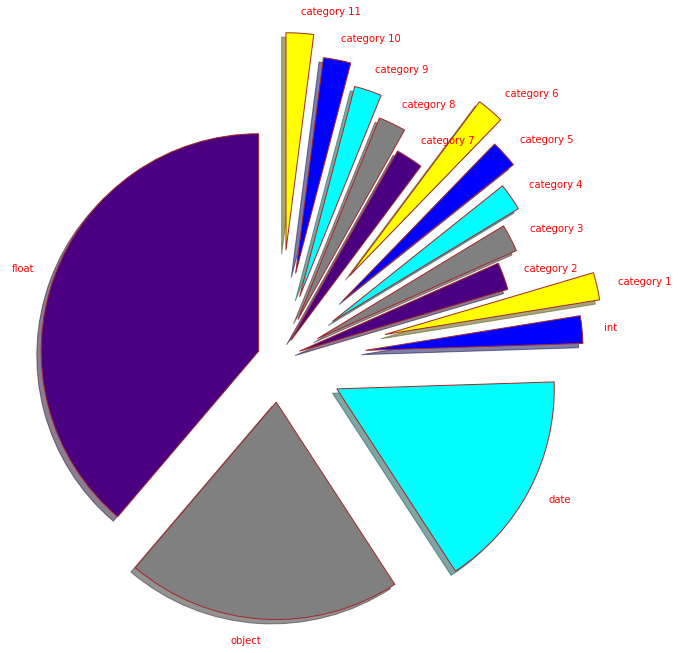

In [ ]:
# Make a graphic with the count the columns types of the df
piechart = df_tot.dtypes.value_counts()

# Add legend
legend = ['float', 'object', 'date',
          'int', 'category 1',
          'category 2', 'category 3',
          'category 4', 'category 5',
          'category 6', 'category 7',
          'category 8', 'category 9',
          'category 10', 'category 11']

# Creating explode data
explode = (0.1, 0.2, 0.3, 0.4, 0.5,
           0.1, 0.2, 0.3, 0.4, 0.5,
           0.1, 0.2, 0.3, 0.4, 0.5)

# Creating color parameters
colors = ('indigo',
          'grey',
          'cyan',
          'blue',
          'yellow',
          'indigo',
          'grey',
          'cyan',
          'blue',
          'yellow',
          'indigo',
          'grey',
          'cyan',
          'blue',
          'yellow')

# Wedge properties
wp = {'linewidth': 1, 'edgecolor': 'brown'}

plt.pie(piechart,
        explode=explode,
        labels=legend,
        shadow=True,
        colors=colors,
        startangle=90,
        wedgeprops=wp,
        textprops=dict(color='red'))

<AxesSubplot:title={'center':'Remplissage des diverses colonnes du data set'}>

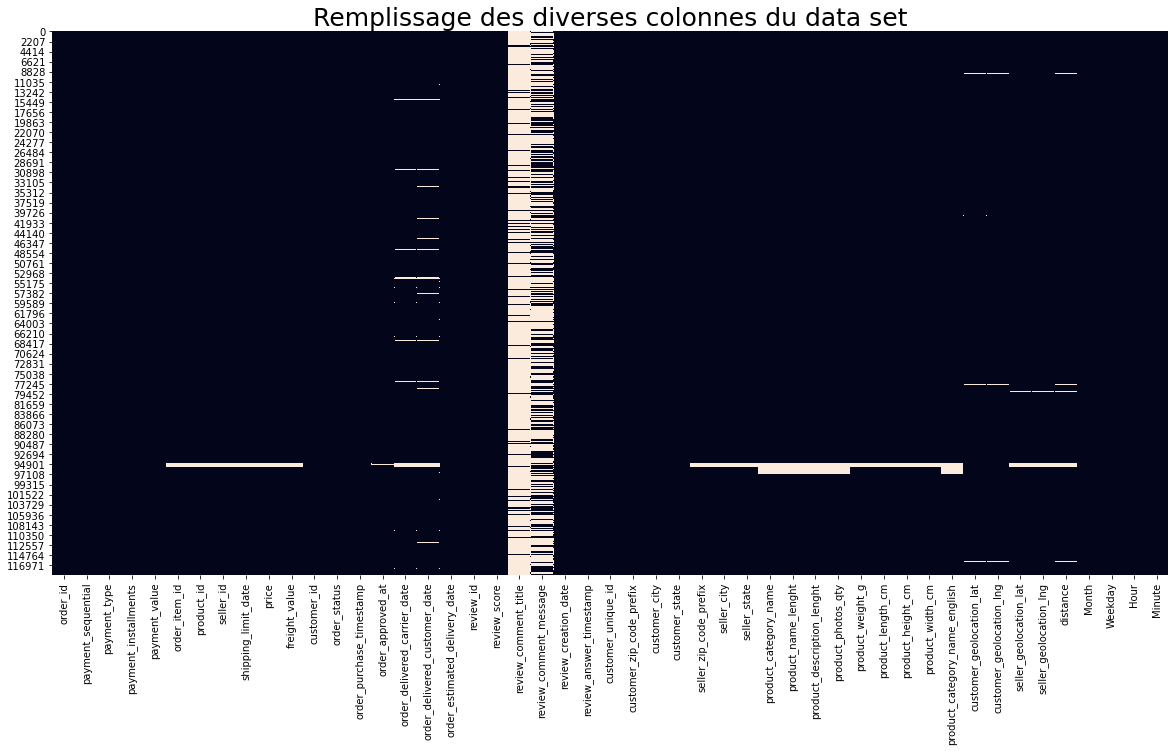

In [ ]:
""""We create a heatmap to visualise the filling rate of the data set"""

# Size
plt.figure(figsize=(20, 10))

# Title
plt.title('Remplissage des diverses colonnes du data set', size=25)

# Rotate xticks at 45°
plt.xticks(rotation=45)

sns.heatmap(df_tot.isna(), cbar=False)

Taux de données manquantes par colonnedu df order_id                         0.000000
Weekday                          0.000000
Month                            0.000000
customer_state                   0.000000
customer_city                    0.000000
customer_zip_code_prefix         0.000000
Hour                             0.000000
review_answer_timestamp          0.000000
review_creation_date             0.000000
review_score                     0.000000
review_id                        0.000000
order_estimated_delivery_date    0.000000
order_purchase_timestamp         0.000000
customer_unique_id               0.000000
Minute                           0.000000
customer_id                      0.000000
order_status                     0.000000
payment_sequential               0.000025
payment_type                     0.000025
payment_installments             0.000025
payment_value                    0.000025
order_approved_at                0.001486
customer_geolocation_lng        

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

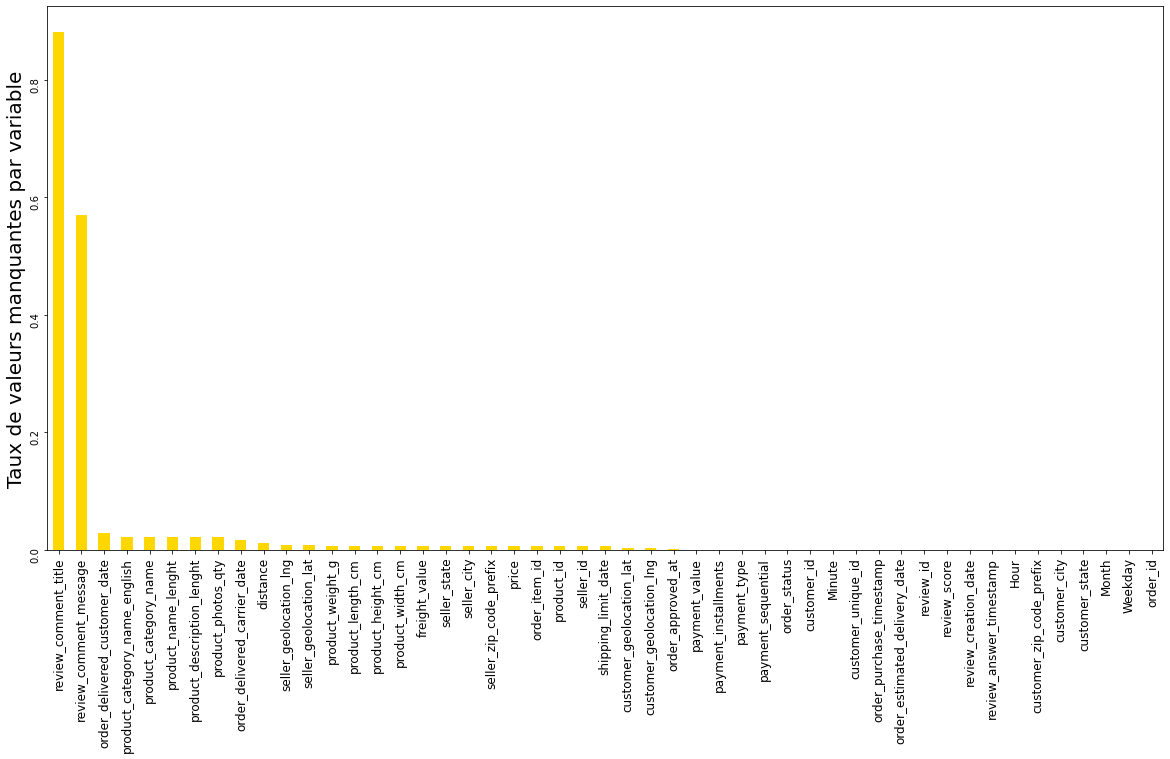

In [ ]:
# Rate of missing values per column
missing_rate = df_tot.isna().sum()/df_tot.shape[0]

# Sort by ascending order
missing_rate_sort = missing_rate.sort_values(ascending=True)
print('Taux de données manquantes par colonne'
      'du df {}'.format(missing_rate_sort))

# Fig size
plt.figure(figsize=(20, 10))

# Show a graphic of the missing rate by columns
missing_rate.sort_values(ascending=False).plot.bar(color='gold')

# Title
plt.ylabel('Taux de valeurs manquantes par variable', size=20)
# plt.title()

# xlabels size
plt.xticks(size=12)

# Rotate xticks at 90°
plt.yticks(rotation=90)

# plt.show()

Taux de remplissage des variablesdu df Minute                           1.000000
customer_state                   1.000000
customer_id                      1.000000
order_status                     1.000000
order_purchase_timestamp         1.000000
order_estimated_delivery_date    1.000000
review_id                        1.000000
review_score                     1.000000
review_creation_date             1.000000
review_answer_timestamp          1.000000
Hour                             1.000000
customer_zip_code_prefix         1.000000
customer_city                    1.000000
customer_unique_id               1.000000
order_id                         1.000000
Weekday                          1.000000
Month                            1.000000
payment_type                     0.999975
payment_sequential               0.999975
payment_value                    0.999975
payment_installments             0.999975
order_approved_at                0.998514
customer_geolocation_lng         0.99

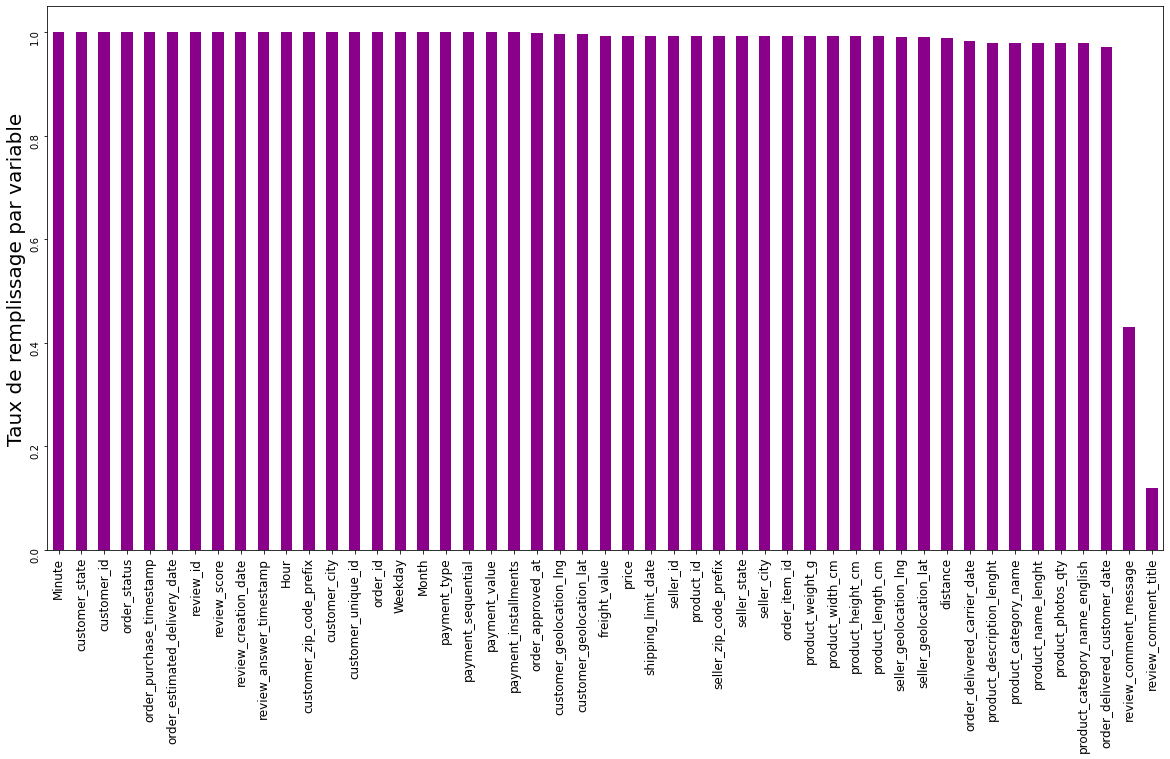

In [ ]:
# Calculate filling rate
filling_rate = 1 - missing_rate

# Sort by ascending order
filling_rate_sort = filling_rate.sort_values(ascending=False)
print('Taux de remplissage des variables'
      'du df {}'.format(filling_rate_sort))

# Fig size
plt.figure(figsize=(20, 10))

# Show a graphic of the filling rate by columns
filling_rate.sort_values(ascending=False).plot.bar(color='darkmagenta')

# Title
plt.ylabel('Taux de remplissage par variable', size=20)
# plt.title()

# xlabels size
plt.xticks(size=12)

# Rotate xticks at 90°
plt.yticks(rotation=90)

plt.show()

### Recherche des doublons

In [ ]:
# Show duplicated for row 'customer_unique_id'
df_tot[df_tot.duplicated(['customer_unique_id'], keep=False)]

order_id  payment_sequential  ... Hour  Minute
2       5308fdab519f7478ef64894128fbbee4                 1.0  ...   11      51
3       5308fdab519f7478ef64894128fbbee4                 2.0  ...   11      51
14      04d3e9115c05c6494aa7c1063f96db5e                 1.0  ...   13      17
15      04d3e9115c05c6494aa7c1063f96db5e                 2.0  ...   13      17
26      fcc92ad75bbb8728d4d4488325ffc907                 1.0  ...    9      22
...                                  ...                 ...  ...  ...     ...
119140  28915ae2a90c218f0c2b7f8e0fb280e0                 1.0  ...   20       4
119141  8f95199a6809023bbfabcd9759bd04a1                 1.0  ...   16      42
119144  fbd9022ebf9271e1952ca884a972d1bd                 1.0  ...   17      55
119147  3821dc9ac1b25bed42324d0885b0a930                 1.0  ...   21       1
119148  3821dc9ac1b25bed42324d0885b0a930                 1.0  ...   21       1

[37550 rows x 49 columns]

# Analyse Exploratoire

## Informations générales sur les commandes 

In [ ]:
# Print min and max dates for orders
maxdate = df_tot['order_purchase_timestamp'].dt.date.max()
mindate = df_tot['order_purchase_timestamp'].dt.date.min()
print(f'La date des commandes va du {mindate} au {maxdate}')

# Print the number of 'customer_id'
# (to verify it's equal to the number of orders)
# cust = df_tot['customer_id'].nunique()
# print(f'Le nombre de clients/transactions différents est : {cust}')
# nb customer_id = nb order_id : OK

# Print the number of orders
unique_order = df_tot['order_id'].nunique()
print(f'Le nombre de transactions différentes est : {unique_order}')

# Print the number of unique customers ()'customer_unique_id')
unique_cust = df_tot['customer_unique_id'].nunique()
print(f'Le nombre de clients différents est : {unique_cust}')
# Verify the difference between 'customer_id' and 'customer_unique_id' : OK


# Print the number of unique products
unique_product = df_tot['product_id'].nunique()
print(f'Le nombre de produits différents est : {unique_product}')

# Print the number of approuved orders
tot_nb_approved_transactions = df_tot['order_approved_at'].nunique()
print(f'Le nombre total de transactions approuvées est : {tot_nb_approved_transactions}')

# Print the payment value of all orders
tot_transactions_value = df_tot['payment_value'].sum()
print(f'La valeur totale des transactions est : {tot_transactions_value} réal brésilien')

# Print the min et max payment values per order
payment_value_max = df_tot['payment_value'].max()
payment_value_min = df_tot['payment_value'].min()
print(f'Le prix des commandes va de {payment_value_min} à {payment_value_max} réal brésilien')

# Print the min et max prices for all products
price_max = df_tot['price'].max()
price_min = df_tot['price'].min()
print(f'Le prix des produits va de {price_min} à {price_max} réal brésilien')

# Print the min et max freight values per order
freight_value_max = df_tot['freight_value'].max()
freight_value_min = df_tot['freight_value'].min()
print(f'Le prix des livraisons va de {freight_value_min} à {freight_value_max} réal brésilien')

# Print the min et max distance between a customer and a seller
distance_max = df_tot['distance'].max()
distance_min = df_tot['distance'].min()
print(f'La distance entre un client et un vendeur va de {freight_value_min} à {freight_value_max} km')

La date des commandes va du 2016-09-04 au 2018-10-17
Le nombre de transactions différentes est : 99441
Le nombre de clients différents est : 96096
Le nombre de produits différents est : 32951
Le nombre total de transactions approuvées est : 90733
La valeur totale des transactions est : 20581109.62
Le prix des commandes va de 0.0 à 13664.08 dollars
Le prix des produits va de 0.85 à 6735.0 dollars
Le prix des livraisons va de 0.0 à 409.68 dollars
La distance entre un client et un vendeur va de 0.0 à 409.68 km


### Produits les plus achetés

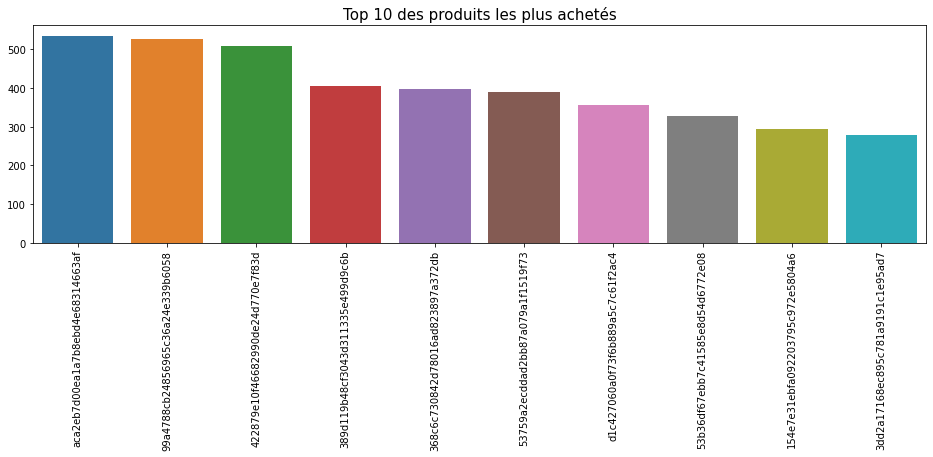

In [ ]:
# Most often purchased products on the website
top_purchase = df_tot.groupby('product_id')['order_id'].count(
).sort_values(ascending=False)[:10]

plt.figure(figsize=(16, 4))
sns.barplot(x=top_purchase.index,
            y=top_purchase.values)
plt.xticks(rotation=90)
plt.title('Top 10 des produits les plus achetés', size=15)
plt.xlabel('')
plt.show()

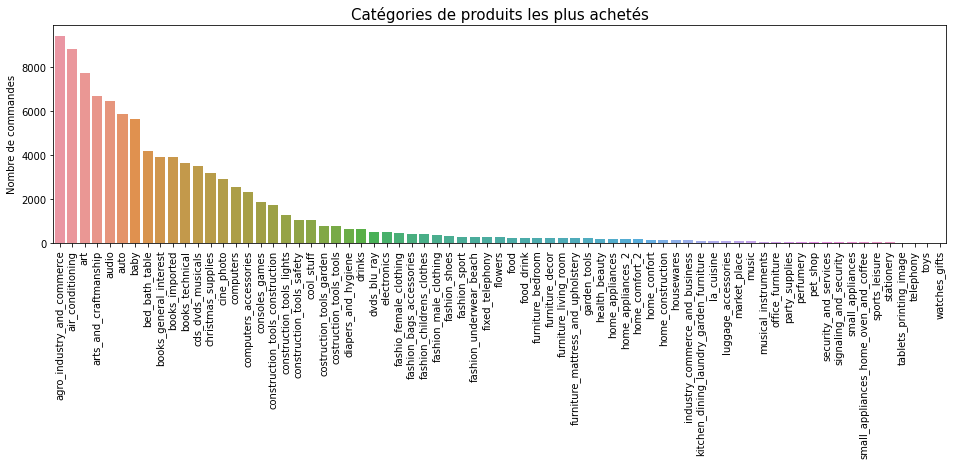

In [ ]:
# Most often purchased categories of product on the website
top_cat_purchase = df_tot.groupby('product_category_name_english')['order_id'].nunique()
plt.figure(figsize=(16, 4))
sns.barplot(x=top_cat_purchase.index,
            y=top_cat_purchase.sort_values(ascending=False))
plt.xticks(rotation=90)
plt.title('Catégories de produits les plus achetés', size=15)
plt.xlabel('')
plt.ylabel('Nombre de commandes')
plt.show()

### Villes et états avec le plus d'acheteurs

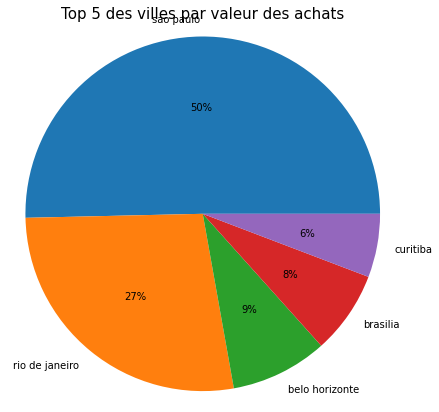

In [ ]:
# Cities

# Top 5 of cities per payment value
top_5_city = df_tot.groupby('customer_city')['payment_value'].sum().sort_values(ascending=False)[:5]
labels = top_5_city[:5].index
size = top_5_city[:5].values

plt.figure(figsize=(7, 7))
plt.pie(size, labels=labels,
        autopct='%1.0f%%')
plt.title('Top 5 des villes par valeur des achats', size=15)
plt.axis('equal')
plt.show()

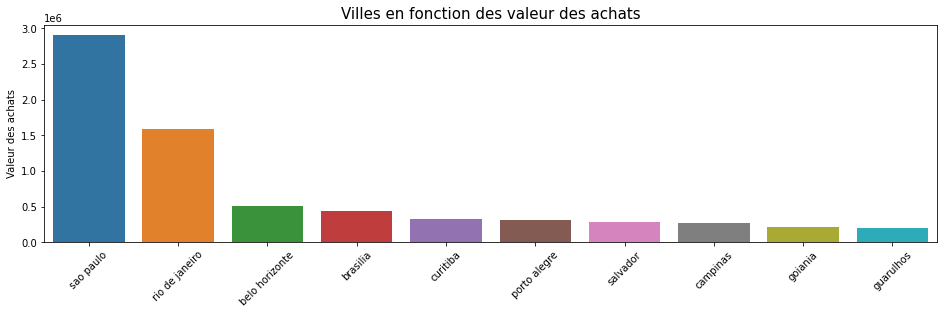

In [ ]:
# Top 10 of cities per payment value
top_10_city = df_tot.groupby('customer_city')['payment_value'].sum().sort_values(ascending=False)[:10]
labels = top_10_city.index
size = top_10_city.values

plt.figure(figsize=(16, 4))
sns.barplot(x=labels, y=size)
plt.xticks(rotation=45)
plt.title('Villes en fonction des valeur des achats', size=15)
plt.xlabel('')
plt.ylabel('Valeur des achats')
plt.show()

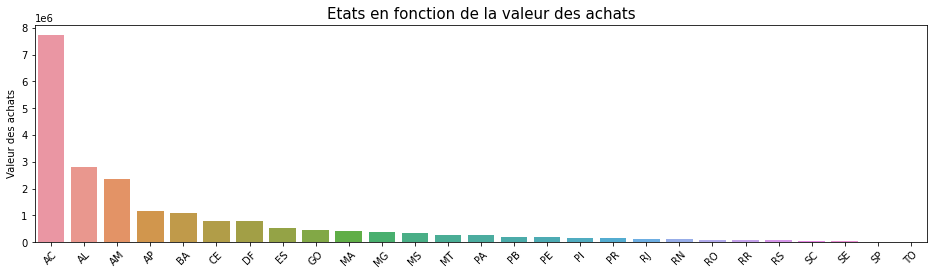

In [ ]:
# States

# States per payment value
all_state = df_tot.groupby('customer_state')['payment_value'].sum()
labels = all_state.index
size = all_state.sort_values(ascending=False)

plt.figure(figsize=(16, 4))
sns.barplot(x=labels, y=size)
plt.xticks(rotation=45)
plt.title('Etats en fonction de la valeur des achats', size=15)
plt.xlabel('')
plt.ylabel('Valeur des achats')
plt.show()

### Méthodes de paiement

In [ ]:
# Types of payment

# Types of payment per payment value
top_payment_type = df_tot.groupby('payment_type')['payment_value'].sum().sort_values(ascending=False)[:10]
labels = top_payment_type.index
size = top_payment_type.values

labels

CategoricalIndex(['credit_card', 'boleto', 'voucher', 'debit_card',
                  'not_defined'],
                 categories=['boleto', 'credit_card', 'debit_card', 'not_defined', 'voucher'], ordered=False, name='payment_type', dtype='category')

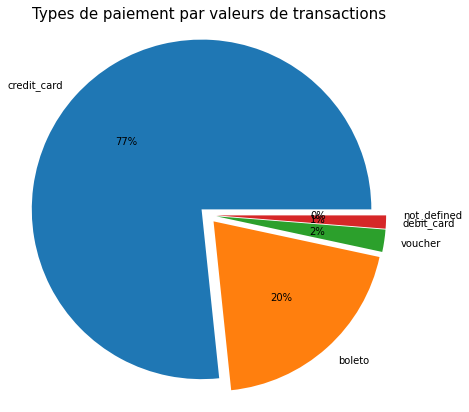

In [ ]:
# Type de payment per payment values
top_payment_type = df_tot.groupby('payment_type')['payment_value'].sum().sort_values(ascending=False)[:10]
labels = top_payment_type.index
size = top_payment_type.values

plt.figure(figsize=(7, 7))
plt.pie(size, labels=labels, explode=[0.05]*5, autopct='%1.0f%%')
plt.title('Types de paiement par valeurs de transactions', size=15)
plt.axis('equal')
plt.show()

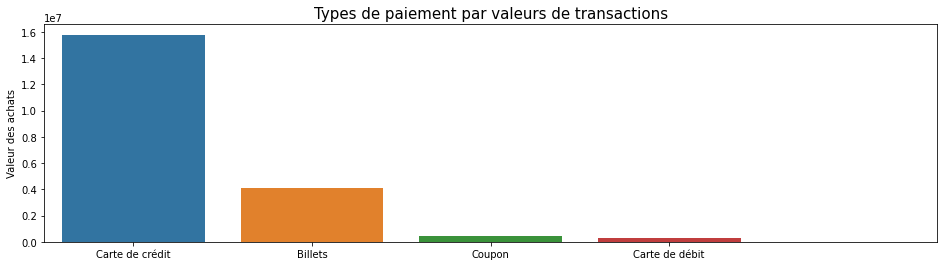

In [ ]:
# Type de payment per payment values
top_payment_type = df_tot.groupby('payment_type')['payment_value'].sum()
labels = top_payment_type.index
size = top_payment_type.sort_values(ascending=False)

plt.figure(figsize=(16, 4))
sns.barplot(x=labels, y=size)
plt.xticks([0, 1, 2, 3], ['Carte de crédit', 'Billets', 'Coupon', 'Carte de débit'])
plt.title('Types de paiement par valeurs de transactions', size=15)
plt.xlabel('')
plt.ylabel('Valeur des achats')
plt.show()

In [ ]:
# Sequences of payment

top_payment_sequential = df_tot.groupby('payment_sequential')['payment_value'].sum().sort_values(ascending=False)[:10]
labels = top_payment_sequential.index
size = top_payment_sequential.values
labels

Float64Index([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], dtype='float64', name='payment_sequential')

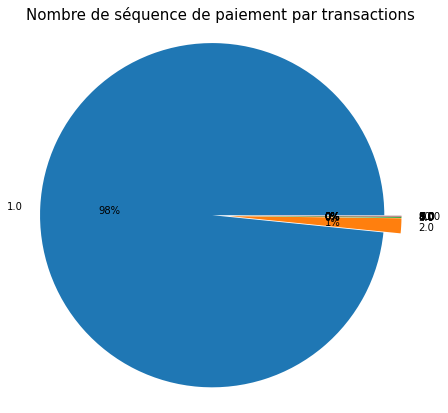

In [ ]:
# Number of sequences of payment per order
top_payment_sequential = df_tot.groupby('payment_sequential')['payment_value'].sum().sort_values(ascending=False)[:10]
labels = top_payment_sequential.index
size = top_payment_sequential.values

plt.figure(figsize=(7, 7))
plt.pie(size, labels=labels, explode=[0.05]*10, autopct='%1.0f%%')
plt.title('Nombre de séquence de paiement par transactions', size=15)
plt.axis('equal')
plt.show()

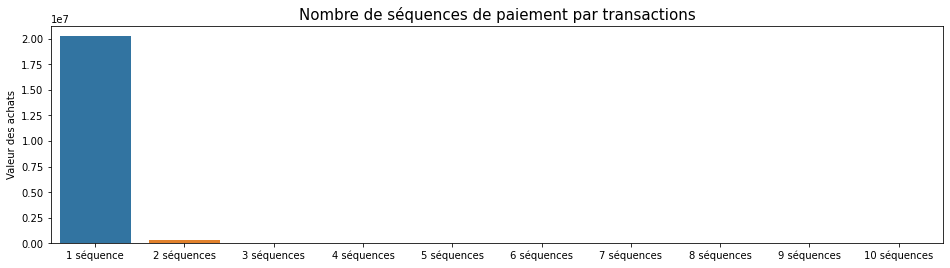

In [ ]:
# Number of sequences of payment per order
top_payment_sequential = df_tot.groupby('payment_sequential')['payment_value'].sum().sort_values(ascending=False)[:10]
labels = top_payment_sequential.index
size = top_payment_sequential.values

plt.figure(figsize=(16, 4))
sns.barplot(x=labels, y=size)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], ['1 séquence', '2 séquences',
                                            '3 séquences', '4 séquences',
                                            '5 séquences', '6 séquences',
                                            '7 séquences', '8 séquences',
                                            '9 séquences', '10 séquences'])
plt.title('Nombre de séquences de paiement par transactions', size=15)
plt.xlabel('')
plt.ylabel('Valeur des achats')
plt.show()

In [ ]:
# Payment installments

top_payment_installments = df_tot.groupby('payment_installments')['payment_value'].sum().sort_values(ascending=False)[:10]
labels = top_payment_installments.index
size = top_payment_installments.values
labels

Float64Index([1.0, 10.0], dtype='float64', name='payment_installments')

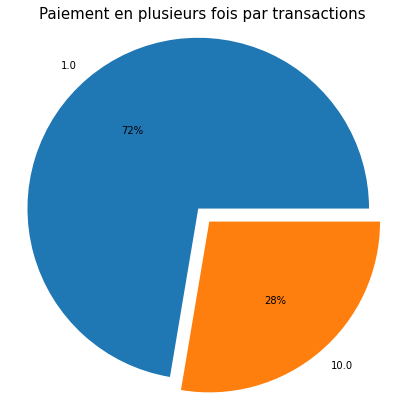

In [ ]:
# Number of payment installments per order
top_payment_installments = df_tot.groupby('payment_installments')['payment_value'].sum().sort_values(ascending=False)[:10]
labels = top_payment_installments.index
size = top_payment_installments.values

plt.figure(figsize=(7, 7))
plt.pie(size, labels=labels, explode=[0.05]*2, autopct='%1.0f%%')
plt.title('Paiement en plusieurs fois par transactions', size=15)
plt.axis('equal')
plt.show()

### Avis

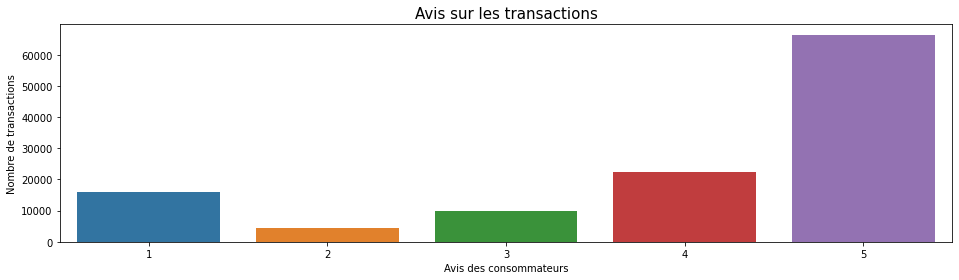

In [ ]:
# Reviews per order
top_review_score = df_tot.groupby('review_score')['payment_value'].count()

plt.figure(figsize=(16, 4))
sns.barplot(x=top_review_score.index,
            y=top_review_score.values)

plt.title('Avis sur les transactions', size=15)
plt.xlabel('Avis des consommateurs')
plt.ylabel('Nombre de transactions')
plt.show()

In [ ]:
df_tot['review_score'].value_counts()

5    66450
4    22386
1    16016
3    10019
2     4280
Name: review_score, dtype: int64

### Relation entre les catégories et les avis

In [ ]:
df_tot['product_category_name_english'].unique()

['home_construction', 'construction_tools_lights', 'signaling_and_security', 'auto', 'perfumery', ..., 'flowers', 'books_technical', 'diapers_and_hygiene', 'computers', 'la_cuisine']
Length: 72
Categories (71, object): ['home_construction', 'construction_tools_lights', 'signaling_and_security',
                          'auto', ..., 'books_technical', 'diapers_and_hygiene', 'computers',
                          'la_cuisine']

In [ ]:
# Create a list with all the categories of products
list_categories = df_tot['product_category_name_english'].unique()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_

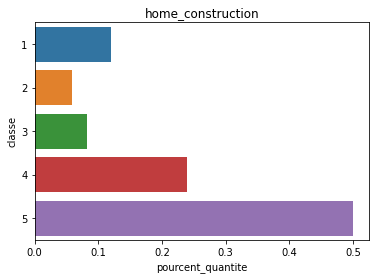

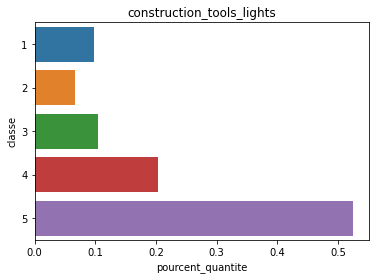

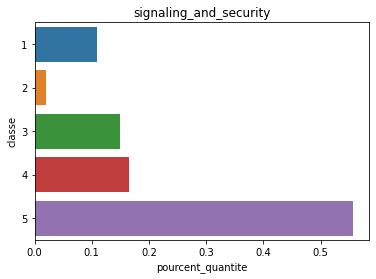

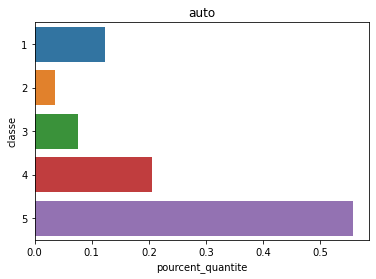

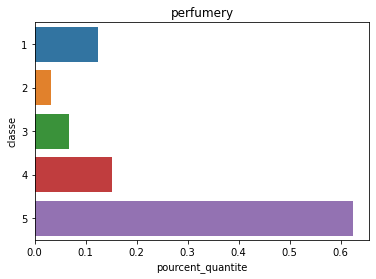

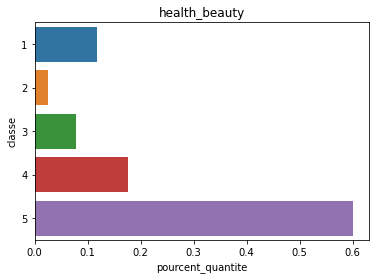

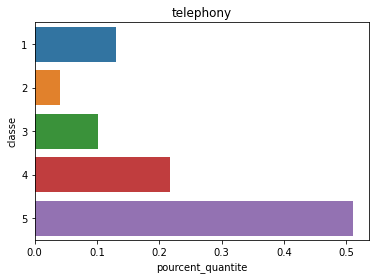

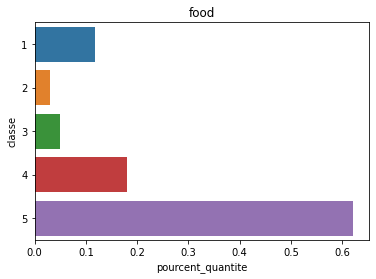

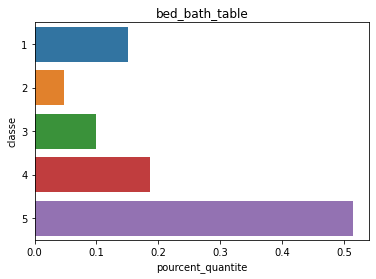

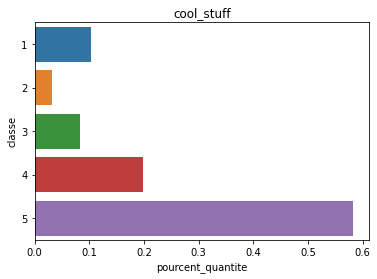

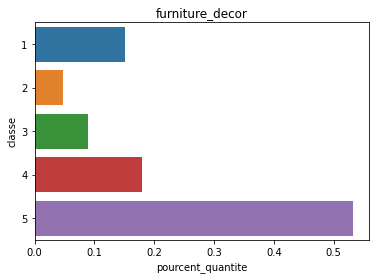

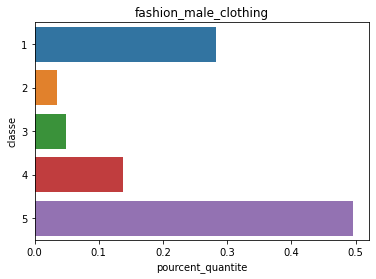

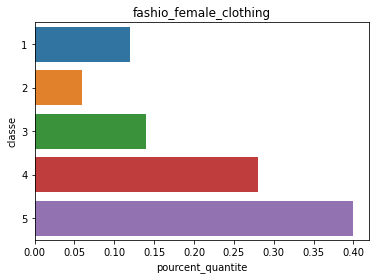

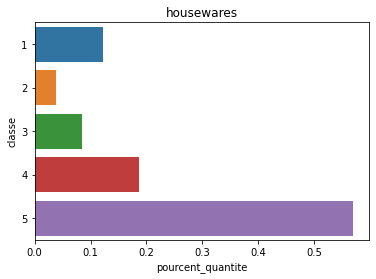

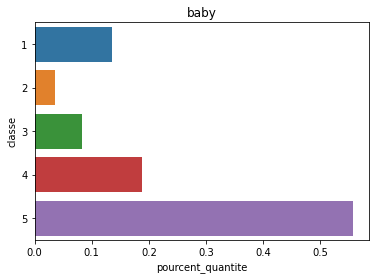

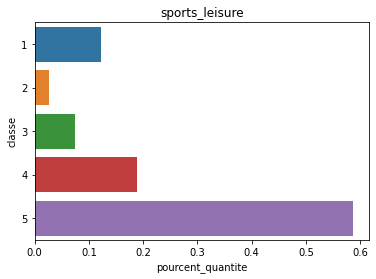

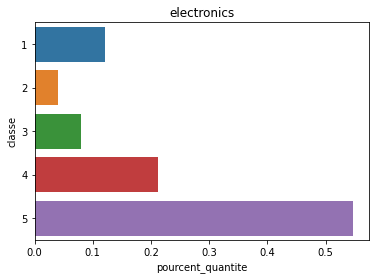

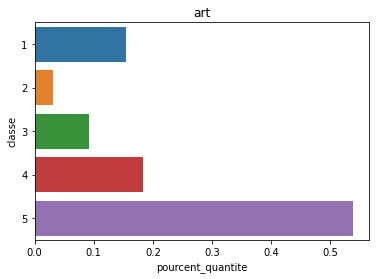

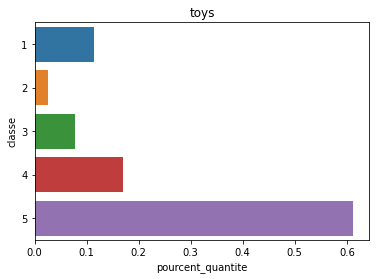

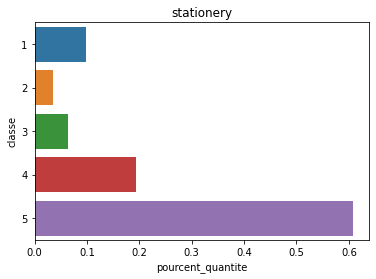

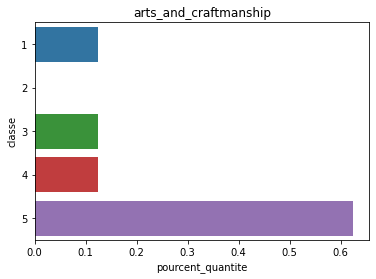

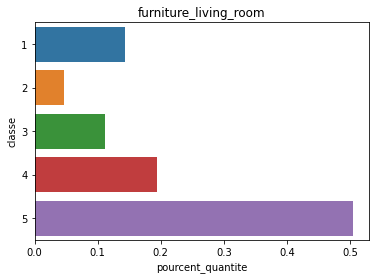

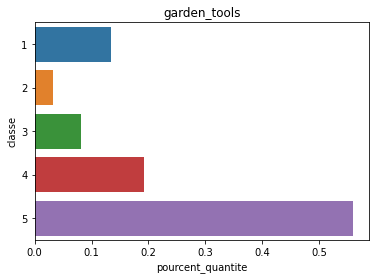

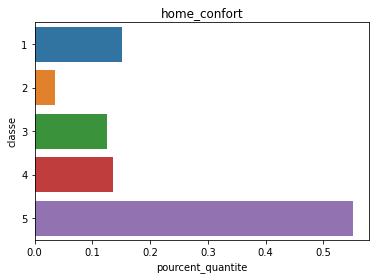

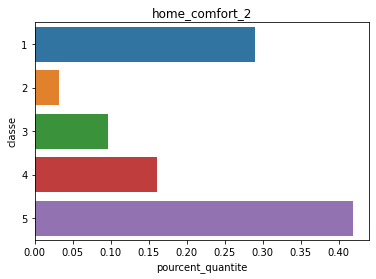

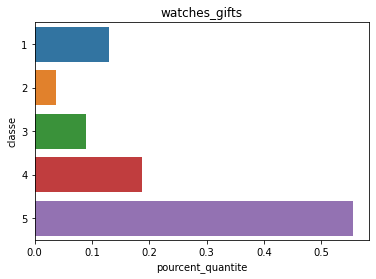

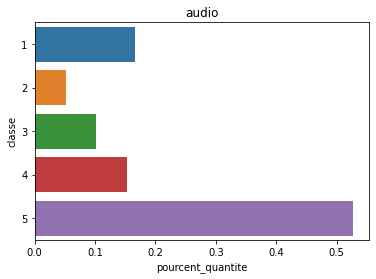

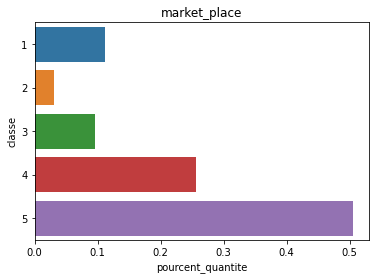

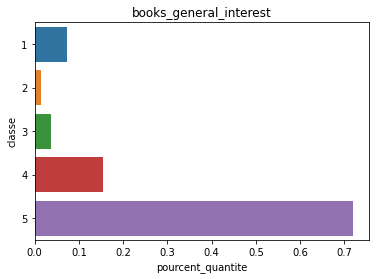

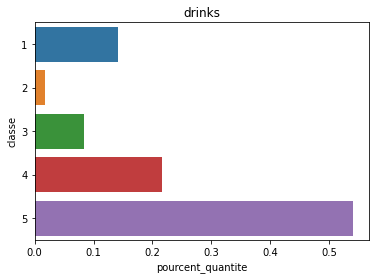

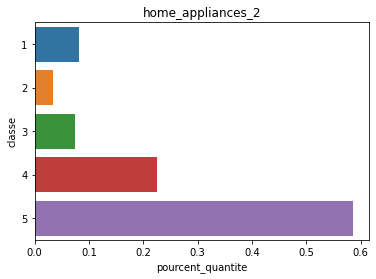

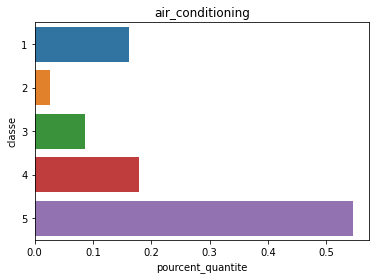

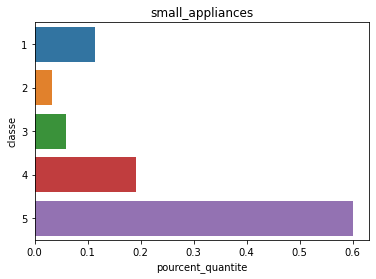

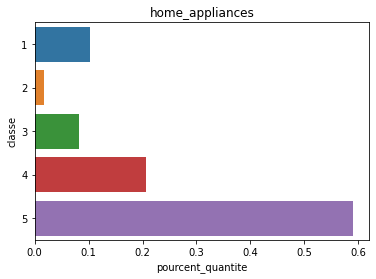

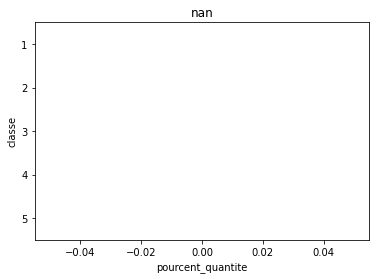

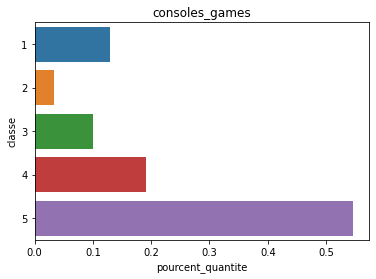

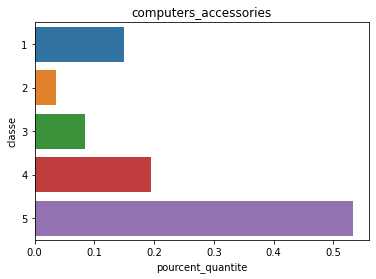

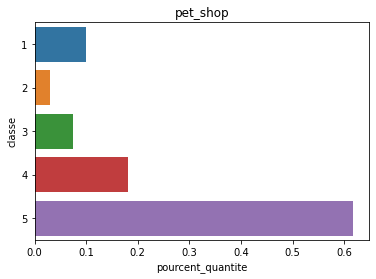

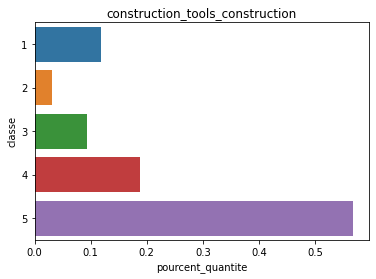

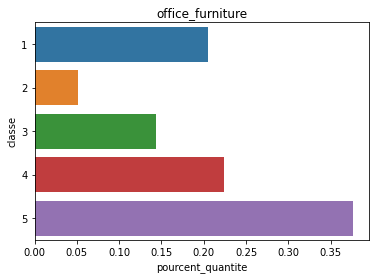

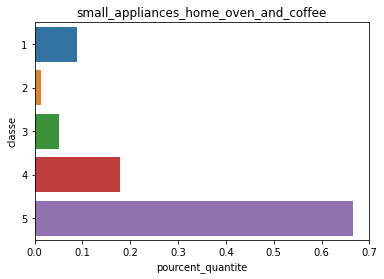

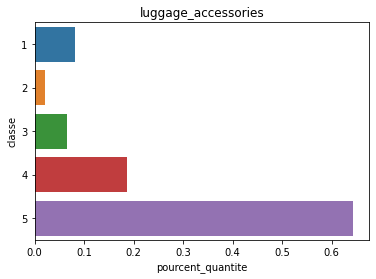

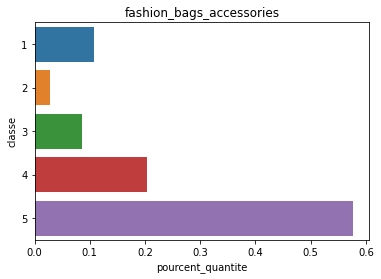

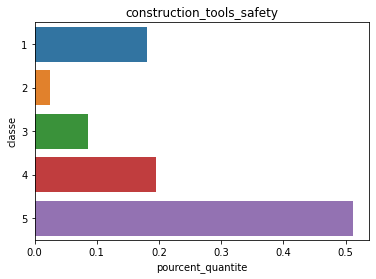

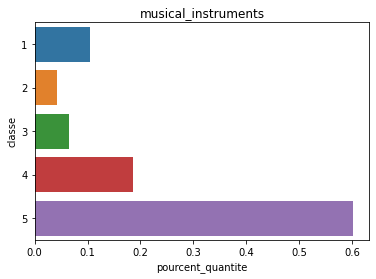

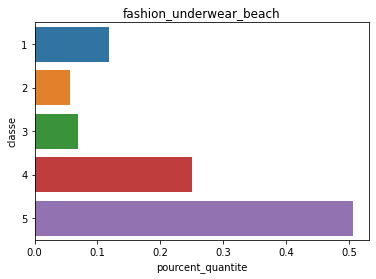

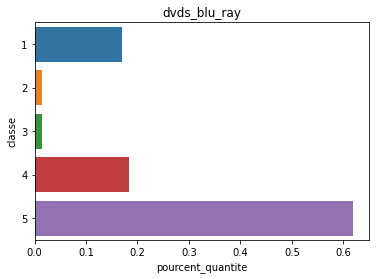

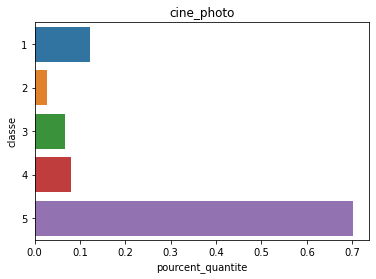

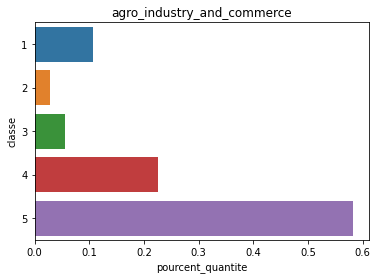

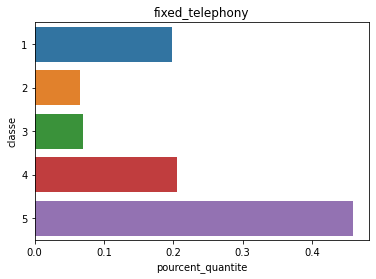

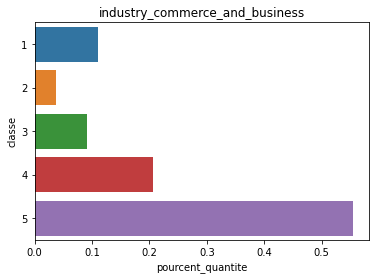

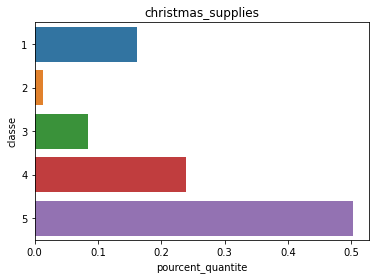

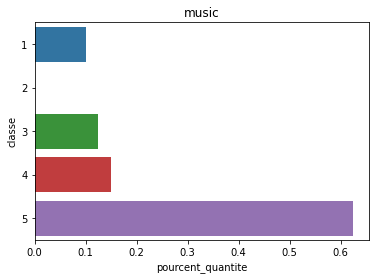

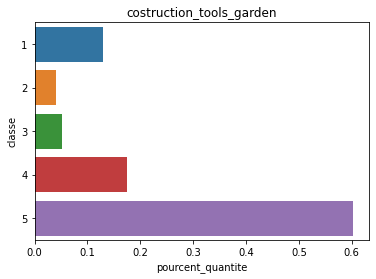

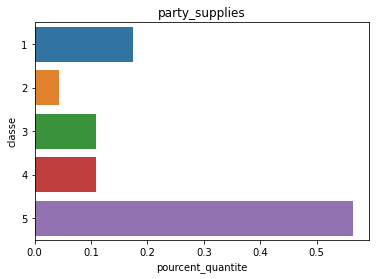

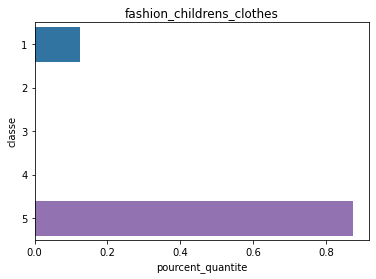

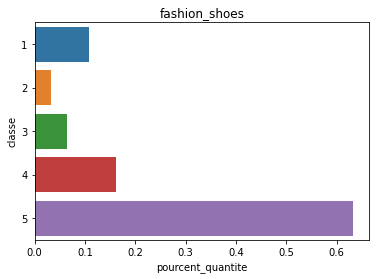

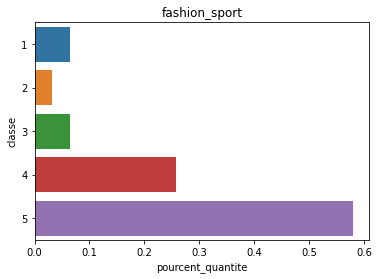

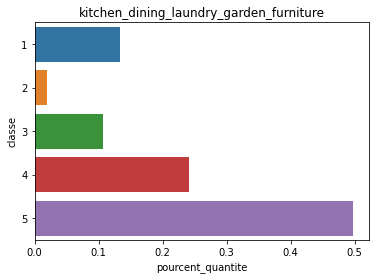

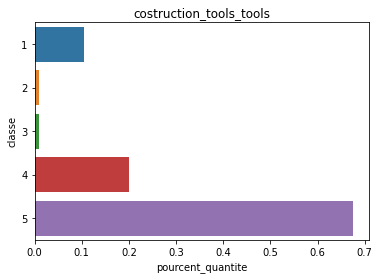

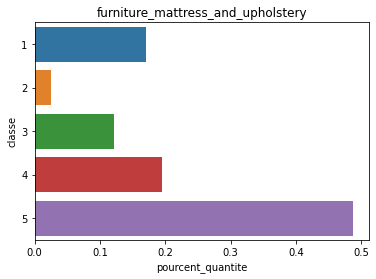

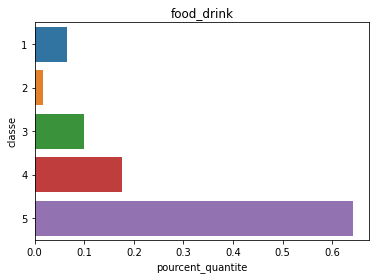

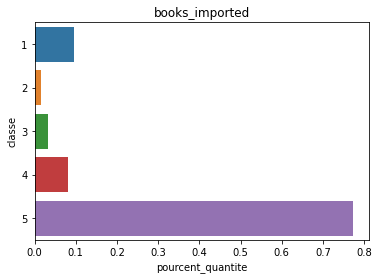

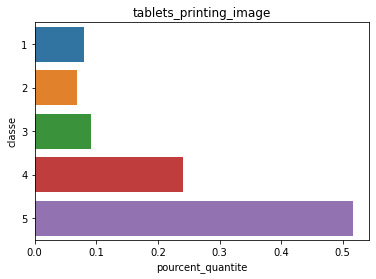

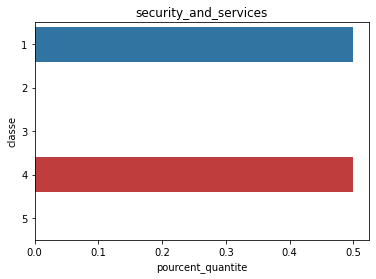

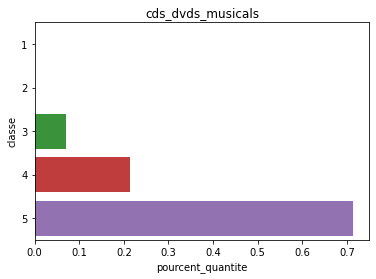

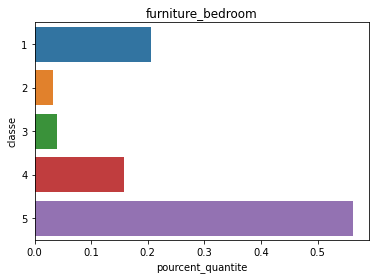

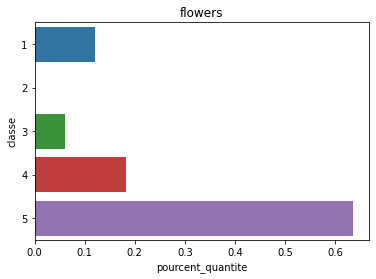

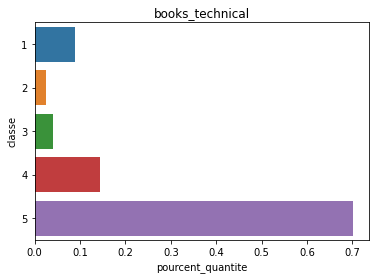

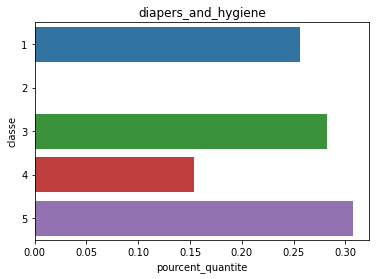

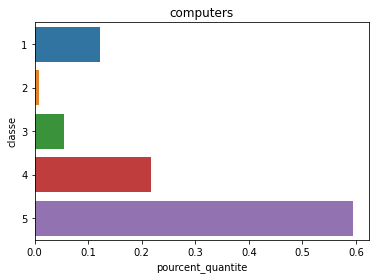

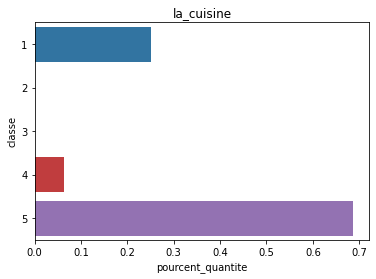

In [ ]:
for category in list_categories:
    df_temp = df_tot[df_tot.product_category_name_english == category]['review_score'].value_counts().reset_index()
    df_temp.columns = ['classe', 'quantite']
    df_temp['pourcent_quantite'] = df_temp['quantite']/df_temp['quantite'].sum()
    plt.figure()
    ax = sns.barplot(x='pourcent_quantite', y='classe', data=df_temp)
    ax.set_title(category)

### Meilleurs vendeurs

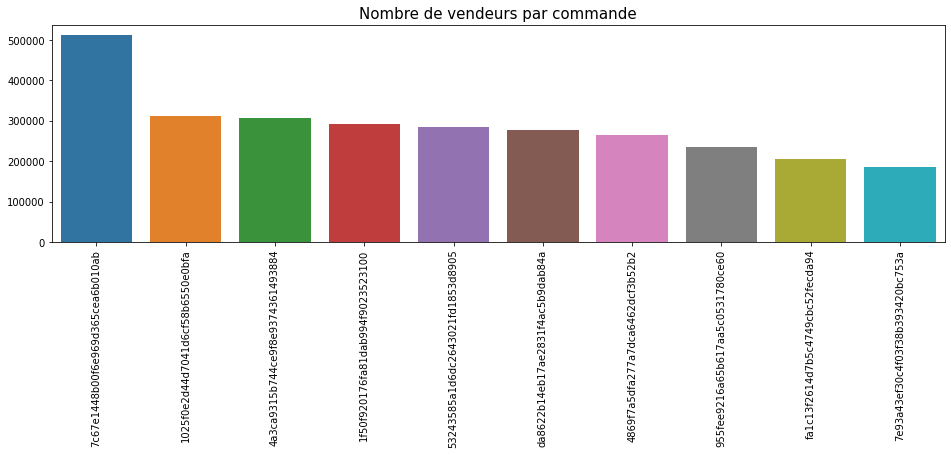

In [ ]:
# Number of sellers per order
top_nb_sellers = df_tot.groupby('seller_id')['payment_value'].sum().sort_values(ascending=False)[:10]

plt.figure(figsize=(16, 4))
sns.barplot(x=top_nb_sellers.index, y=top_nb_sellers.values)
plt.xticks(rotation=90)
plt.title('Nombre de vendeurs par commande', size=15)
plt.xlabel('')
plt.show()

### Nombre de vendeurs par catégories 

In [ ]:
# Total number of sellers
sellers_number = df_tot['seller_id'].nunique()
sellers_number

3095

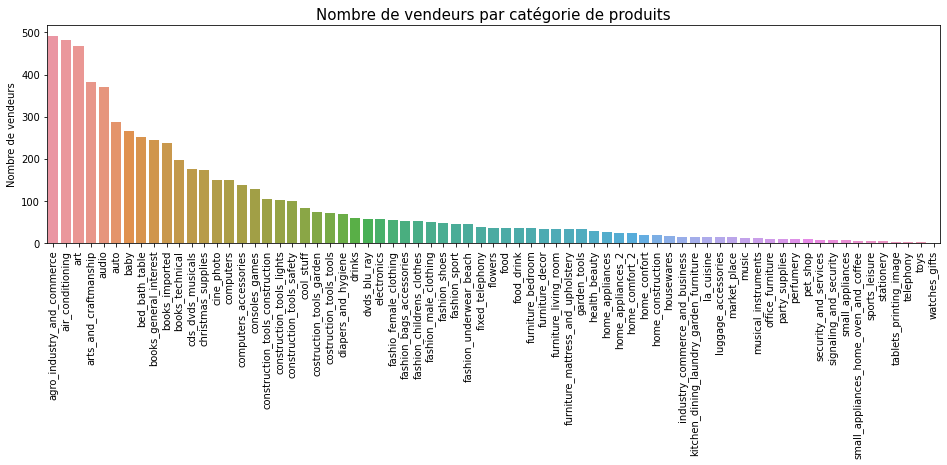

In [ ]:
pd.set_option('display.max_rows', None)

# Number of sellers by category of products
sellers_number_by_category = df_tot.groupby('product_category_name_english')['seller_id'].nunique()
sellers_number_by_category

plt.figure(figsize=(16, 4))
sns.barplot(x=sellers_number_by_category.index,
            y=sellers_number_by_category.sort_values(ascending=False))
plt.xticks(rotation=90)
plt.title('Nombre de vendeurs par catégorie de produits', size=15)
plt.xlabel('')
plt.ylabel('Nombre de vendeurs')
plt.show()

### Nombre d'acheteurs par catégories 

In [ ]:
# Total number of customers
customers_number = df_tot['customer_unique_id'].nunique()
customers_number

96096

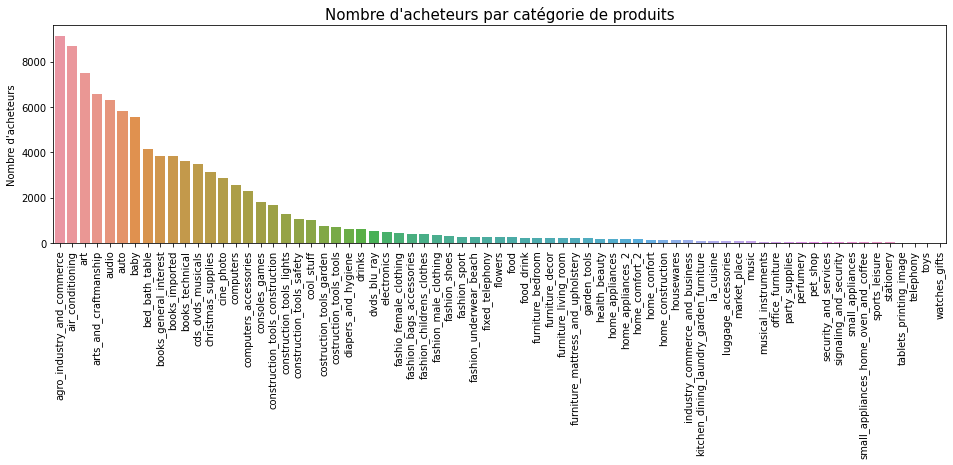

In [ ]:
# Number of customers by category
pd.set_option('display.max_rows', None)

customers_number_by_category = df_tot.groupby('product_category_name_english')['customer_unique_id'].nunique()
customers_number_by_category

plt.figure(figsize=(16, 4))
sns.barplot(x=customers_number_by_category.index,
            y=customers_number_by_category.sort_values(ascending=False))
plt.xticks(rotation=90)
plt.title('Nombre d\'acheteurs par catégorie de produits', size=15)
plt.xlabel('')
plt.ylabel('Nombre d\'acheteurs')
plt.show()

### Observation des périodes propices aux achats

- Heures, jours, mois de l'année

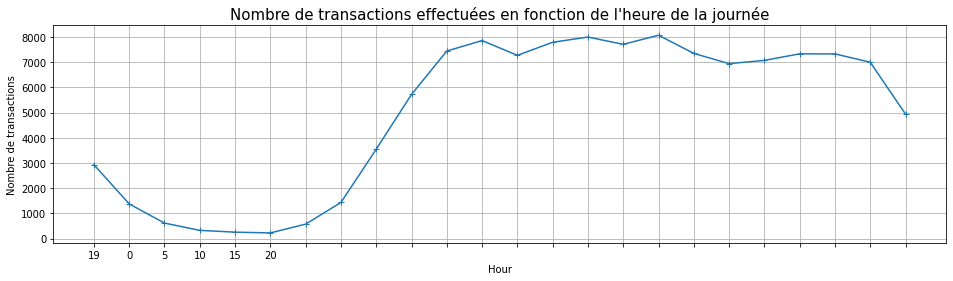

In [ ]:
# Payment values per hour of the day
hour = df_tot.groupby('Hour')['payment_value'].count()
plt.figure(figsize=(16, 4))
hour.plot(marker='+')
plt.xticks(np.arange(0, 24, step=1))
plt.ylabel('Nombre de transactions')
plt.title('Nombre de transactions effectuées en fonction'
          ' de l\'heure de la journée', size=15)
plt.grid()
plt.show()

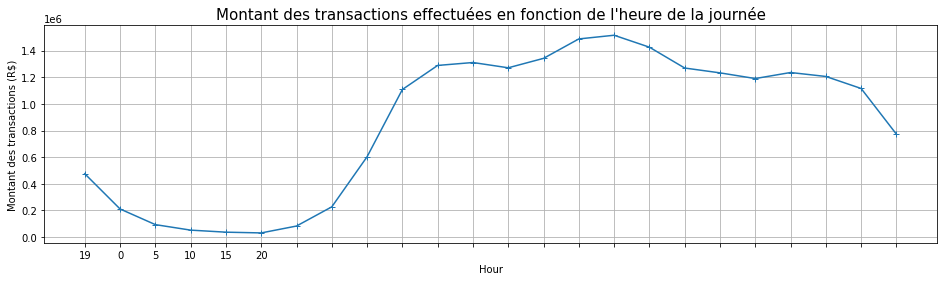

In [ ]:
# Payment values per hour of the day
hour_sum = df_tot.groupby('Hour')['payment_value'].sum()
plt.figure(figsize=(16, 4))
hour_sum.plot(marker='+')
plt.xticks(np.arange(0, 24, step=1))
plt.ylabel('Montant des transactions (R$)')
plt.title('Montant des transactions effectuées en fonction'
          ' de l\'heure de la journée', size=15)
plt.grid()
plt.show()

Observations : Les ventes sont meilleures en journée, entre 10h et 22h.

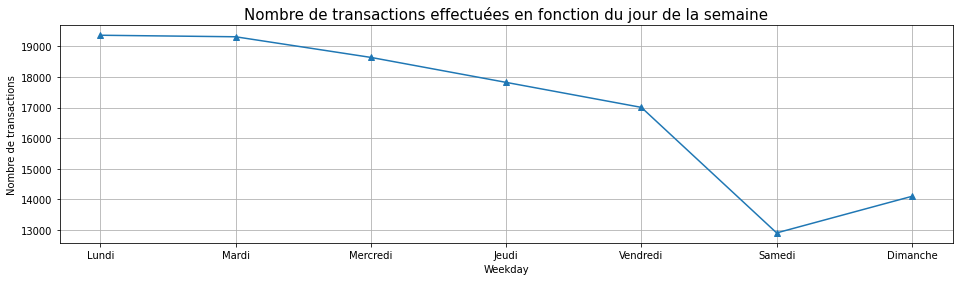

In [ ]:
# Payment values per day of the week
weekday = df_tot.groupby('Weekday')['payment_value'].count()
plt.figure(figsize=(16, 4))
weekday.plot(marker='^')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Lundi', 'Mardi',
                                   'Mercredi', 'Jeudi',
                                   'Vendredi', 'Samedi',
                                   'Dimanche'])
plt.ylabel('Nombre de transactions')
plt.title('Nombre de transactions effectuées en fonction'
          ' du jour de la semaine', size=15)
plt.grid()
plt.show()

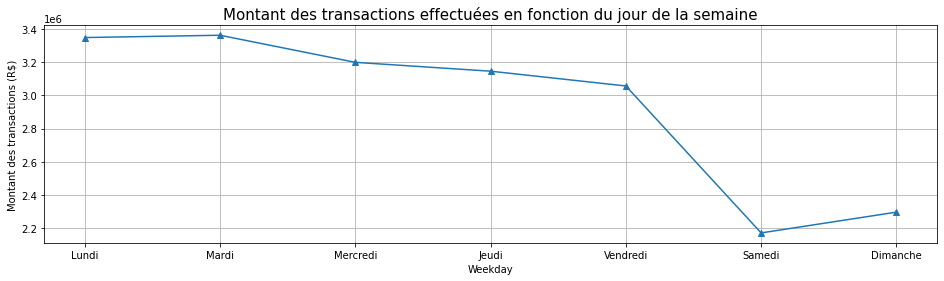

In [ ]:
# Payment values per day of the week
weekday_sum = df_tot.groupby('Weekday')['payment_value'].sum()
plt.figure(figsize=(16, 4))
weekday_sum.plot(marker='^')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Lundi', 'Mardi',
                                   'Mercredi', 'Jeudi',
                                   'Vendredi', 'Samedi',
                                   'Dimanche'])
plt.ylabel('Montant des transactions (R$)')
plt.title('Montant des transactions effectuées en fonction'
          ' du jour de la semaine', size=15)
plt.grid()
plt.show()

Observations : Les ventes sont meilleures en début de semaine et baissent significativement durant le weekend.

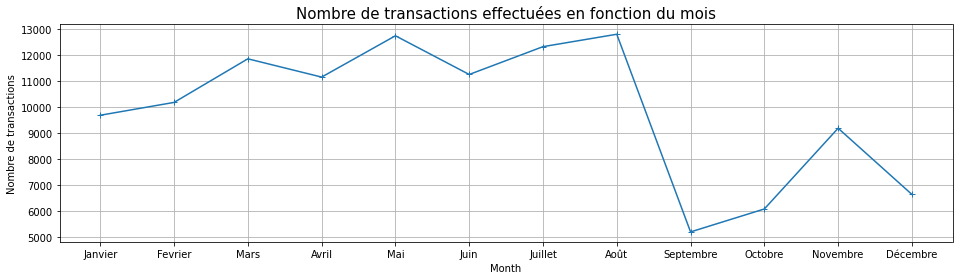

In [ ]:
# Payment values per month of the year
month = df_tot.groupby('Month')['payment_value'].count()
plt.figure(figsize=(16, 4))
month.plot(marker='+')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
           ['Janvier', 'Fevrier', 'Mars', 'Avril',
            'Mai', 'Juin', 'Juillet', 'Août',
            'Septembre', 'Octobre', 'Novembre', 'Décembre'])
plt.ylabel('Nombre de transactions')
plt.title('Nombre de transactions effectuées en fonction du mois', size=15)
plt.grid()
plt.show()

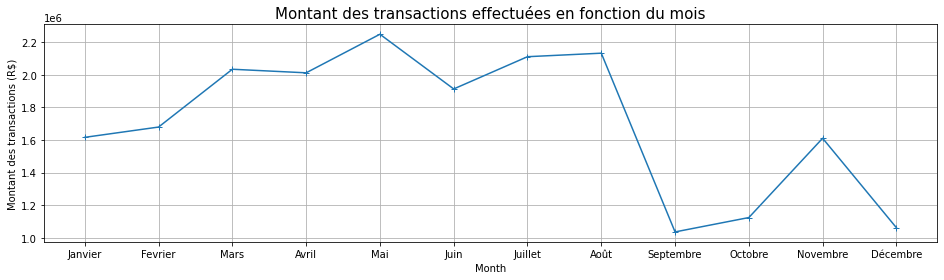

In [ ]:
# Payment values per month of the year
month_sum = df_tot.groupby('Month')['payment_value'].sum()
plt.figure(figsize=(16, 4))
month_sum .plot(marker='+')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
           ['Janvier', 'Fevrier', 'Mars', 'Avril',
            'Mai', 'Juin', 'Juillet', 'Août',
            'Septembre', 'Octobre', 'Novembre', 'Décembre'])
plt.ylabel('Montant des transactions (R$)')
plt.title('Montant des transactions effectuées en fonction du mois', size=15)
plt.grid()
plt.show()

Observations : La majorité des ventes a lieu entre mai et aout. Il serait intéressant d'étudier des périodes de 4 mois pour chaque année.

## Créer des périodes pour l'étude de la stabilité temporelle

### Création de 7 périodes de 4 mois :

- Periode1 = 2016-09-04 to 2016-12-31
- Periode2 = 2017-01-01 to 2017-04-30
- Periode3 = 2017-05-01 to 2017-08-31
- Periode4 = 2017-09-01 to 2017-12-31
- Periode5 = 2018-01-01 to 2018-04-30
- Periode6 = 2018-05-01 to 2018-08-31
- Periode7 = 2018-09-01 to 2018-10-17

In [ ]:
"""We create a loop generating periods of 4 months.

We attribute a period name to each period of 4 months
during the bigger period in which we observed transactions.
Once the periods are generated,
we create a column in the df mentionning the period of the transaction.
"""


result = []
for value in df_tot['order_purchase_timestamp']:
    if (value >= datetime.date(2016, 9, 1)) & (value <= datetime.date(2016, 12, 31)):
        result.append('Periode_1')
    elif (value >= datetime.date(2017, 1, 1)) & (value <= datetime.date(2017, 4, 30)):
        result.append('Periode_2')
    elif (value >= datetime.date(2017, 5, 1)) & (value <= datetime.date(2017, 8, 31)):
        result.append('Periode_3')
    elif (value >= datetime.date(2017, 9, 1)) & (value <= datetime.date(2017, 12, 31)):
        result.append('Periode_4')
    elif (value >= datetime.date(2018, 1, 1)) & (value <= datetime.date(2018, 4, 30)):
        result.append('Periode_5')
    elif (value >= datetime.date(2018, 5, 1)) & (value <= datetime.date(2018, 8, 31)):
        result.append('Periode_6')
    elif (value >= datetime.date(2018, 9, 1)) & (value <= datetime.date(2018, 10, 17)):
        result.append('Periode_7')
    else:
        result.append('Fail')

df_tot['Periode'] = result

In [ ]:
df_tot.sample(5)

order_id  payment_sequential  ... Minute    Periode
94468  1a8d422cb8cdae5221a5a8eb371c49cd                 1.0  ...     52  Periode_5
16375  26b9d973779b9fe3d4496521aa4d67e9                 1.0  ...      2  Periode_3
61119  cd94ef4b0f9a66ee1a1cedbeb590e534                 1.0  ...     38  Periode_6
83862  43124f0bf70404231018bff9b132a297                 1.0  ...     21  Periode_5
53319  e5bc812e034a9041261c8637e4dc4497                 1.0  ...     56  Periode_3

[5 rows x 50 columns]

In [ ]:
df_tot['Periode'].unique()

array(['Periode_5', 'Periode_6', 'Periode_4', 'Periode_2', 'Periode_3',
       'Periode_1', 'Periode_7'], dtype=object)

In [ ]:
df_tot['Periode'].value_counts()

Periode_5    33608
Periode_6    30561
Periode_4    26708
Periode_3    18565
Periode_2     9279
Periode_1      410
Periode_7       20
Name: Periode, dtype: int64

### Observation des achats en fonction des périodes

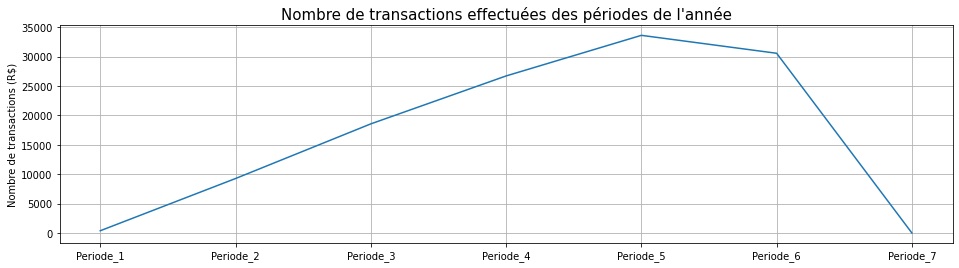

In [ ]:
# Payment values per periods of 4 months
period = df_tot.groupby('Periode')['payment_value'].count()
plt.figure(figsize=(16, 4))
labels = period.index
size = period.values

sns.lineplot(x=labels, y=size)
plt.xticks([0, 1, 2, 3, 4, 5, 6],
           ['Periode_1', 'Periode_2',
            'Periode_3', 'Periode_4',
            'Periode_5', 'Periode_6', 'Periode_7'])
plt.xlabel('')
plt.ylabel('Nombre de transactions (R$)')  # R$=réal brésilien
plt.title('Nombre de transactions effectuées des périodes de l\'année', size=15)
plt.grid()
plt.show()

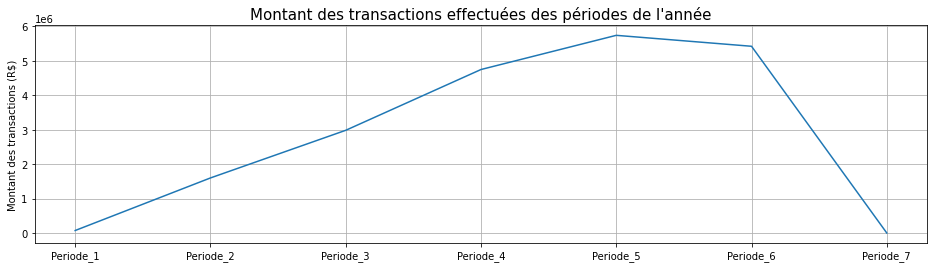

In [ ]:
# Payment values per periods of 4 months
period_sum = df_tot.groupby('Periode')['payment_value'].sum()
plt.figure(figsize=(16, 4))
labels = period_sum.index
size = period_sum.values

sns.lineplot(x=labels, y=size)
plt.xticks([0, 1, 2, 3, 4, 5, 6],
           ['Periode_1', 'Periode_2',
            'Periode_3', 'Periode_4',
            'Periode_5', 'Periode_6', 'Periode_7'])
plt.xlabel('')
plt.ylabel('Montant des transactions (R$)')  # R$=réal brésilien
plt.title('Montant des transactions effectuées des périodes de l\'année', size=15)
plt.grid()
plt.show()

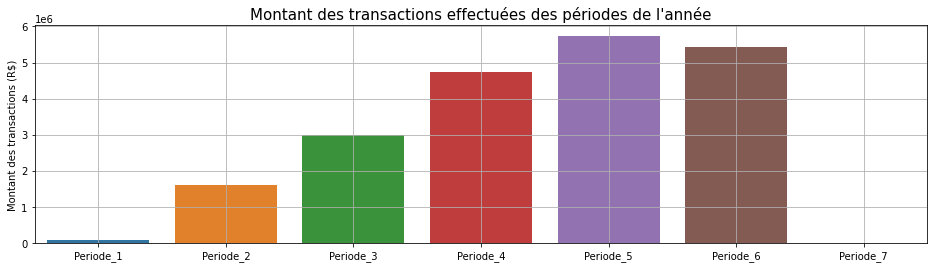

In [ ]:
# Payment values per periods of 4 months
period_sum = df_tot.groupby('Periode')['payment_value'].sum()
plt.figure(figsize=(16, 4))
labels = period_sum.index
size = period_sum.values

sns.barplot(x=labels, y=size)
plt.xticks([0, 1, 2, 3, 4, 5, 6],
           ['Periode_1', 'Periode_2',
            'Periode_3', 'Periode_4',
            'Periode_5', 'Periode_6', 'Periode_7'])
plt.xlabel('')
plt.ylabel('Montant des transactions (R$)')  # R$=réal brésilien
plt.title('Montant des transactions effectuées des périodes de l\'année', size=15)
plt.grid()
plt.show()

### Création de 13 périodes de 2 mois:

- Periode1a = 2016-09-04 to 2016-10-31
- Periode1b = 2016-11-04 to 2016-12-31
- Periode2a = 2017-01-01 to 2017-02-28
- Periode2b = 2017-03-01 to 2017-04-30
- Periode3a = 2017-05-01 to 2017-06-30
- Periode3b = 2017-07-01 to 2017-08-31
- Periode4a = 2017-09-01 to 2017-10-31
- Periode4b = 2017-11-01 to 2017-12-31
- Periode5a = 2018-01-01 to 2018-02-28
- Periode5b = 2018-03-01 to 2018-04-30
- Periode6a = 2018-05-01 to 2018-06-30
- Periode6b = 2018-07-01 to 2018-08-31
- Periode7 = 2018-09-01 to 2018-10-17


In [ ]:
"""We create a loop generating periods of 2 months.

We attribute a period name to each period of 2 months
during the bigger period in which we observed transactions.
Once the periods are generated,
we create a column in the df mentionning the period of the transaction.
"""


result = []
for value in df_tot['order_purchase_timestamp']:
    if (value >= datetime.date(2016, 9, 1)) & (value <= datetime.date(2016, 10, 31)):
        result.append('Periode_1a')
    elif (value >= datetime.date(2016, 11, 1)) & (value <= datetime.date(2016, 12, 31)):
        result.append('Periode_1b')
    elif (value >= datetime.date(2017, 1, 1)) & (value <= datetime.date(2017, 2, 28)):
        result.append('Periode_2a')
    elif (value >= datetime.date(2017, 3, 1)) & (value <= datetime.date(2017, 4, 30)):
        result.append('Periode_2b')
    elif (value >= datetime.date(2017, 5, 1)) & (value <= datetime.date(2017, 6, 30)):
        result.append('Periode_3a')
    elif (value >= datetime.date(2017, 7, 1)) & (value <= datetime.date(2017, 8, 31)):
        result.append('Periode_3b')
    elif (value >= datetime.date(2017, 9, 1)) & (value <= datetime.date(2017, 10, 31)):
        result.append('Periode_4a')
    elif (value >= datetime.date(2017, 11, 1)) & (value <= datetime.date(2017, 12, 31)):
        result.append('Periode_4b')
    elif (value >= datetime.date(2018, 1, 1)) & (value <= datetime.date(2018, 2, 28)):
        result.append('Periode_5a')
    elif (value >= datetime.date(2018, 3, 1)) & (value <= datetime.date(2018, 4, 30)):
        result.append('Periode_5b')
    elif (value >= datetime.date(2018, 5, 1)) & (value <= datetime.date(2018, 6, 30)):
        result.append('Periode_6a')
    elif (value >= datetime.date(2018, 7, 1)) & (value <= datetime.date(2018, 8, 31)):
        result.append('Periode_6b')
    elif (value >= datetime.date(2018, 9, 1)) & (value <= datetime.date(2018, 10, 17)):
        result.append('Periode_7')
    else:
        result.append('Fail')


df_tot['PeriodeBis'] = result

In [ ]:
df_tot['PeriodeBis'].unique()

array(['Periode_5b', 'Periode_6a', 'Periode_6b', 'Periode_5a',
       'Periode_4b', 'Periode_4a', 'Periode_2b', 'Periode_3a',
       'Periode_3b', 'Periode_2a', 'Periode_1a', 'Periode_7',
       'Periode_1b'], dtype=object)

In [ ]:
df_tot['PeriodeBis'].value_counts()

Periode_5b    16893
Periode_5a    16715
Periode_4b    15838
Periode_6a    15661
Periode_6b    14900
Periode_4a    10870
Periode_3b    10227
Periode_3a     8338
Periode_2b     6121
Periode_2a     3158
Periode_1a      409
Periode_7        20
Periode_1b        1
Name: PeriodeBis, dtype: int64

### Observation des achats en fonction des périodes

<Figure size 1152x288 with 0 Axes>

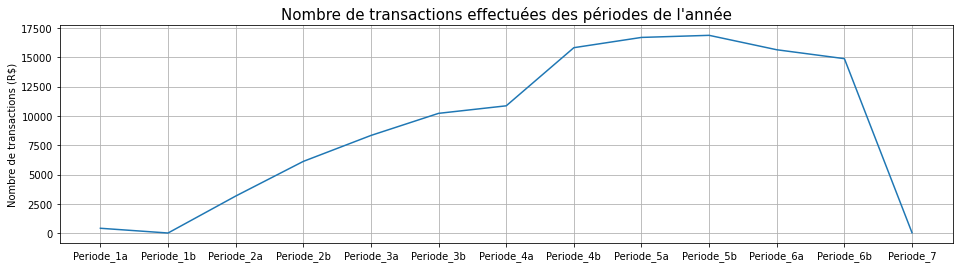

In [ ]:
# Payment values per periods of 2 months
periodbis = df_tot.groupby('PeriodeBis')['payment_value'].count()
plt.figure(figsize=(16, 4))
labels = periodbis.index
size = periodbis.values

plt.figure(figsize=(16, 4))
sns.lineplot(x=labels, y=size)

plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ,10, 11, 12],
           ['Periode_1a', 'Periode_1b', 'Periode_2a', 'Periode_2b',
            'Periode_3a', 'Periode_3b', 'Periode_4a', 'Periode_4b',
            'Periode_5a', 'Periode_5b', 'Periode_6a', 'Periode_6b',
            'Periode_7'])
plt.xlabel('')
plt.ylabel('Nombre de transactions (R$)')  # R$=réal brésilien
plt.title('Nombre de transactions effectuées des périodes de l\'année', size=15)
plt.grid()
plt.show()

<Figure size 1152x288 with 0 Axes>

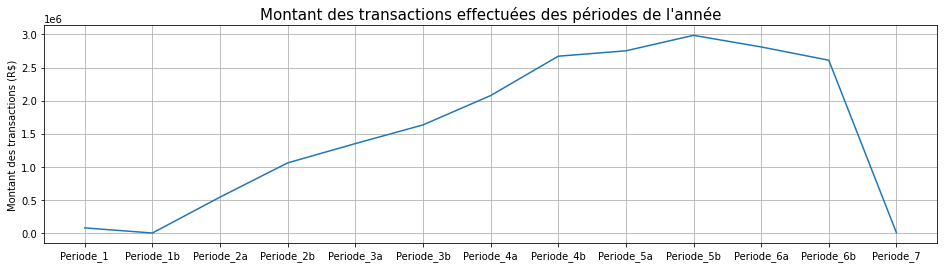

In [ ]:
# Payment values per periods of 2 months
periodbis_sum = df_tot.groupby('PeriodeBis')['payment_value'].sum()
plt.figure(figsize=(16, 4))
labels = periodbis_sum.index
size = periodbis_sum.values

plt.figure(figsize=(16, 4))
sns.lineplot(x=labels, y=size)

plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ,10, 11, 12],
           ['Periode_1', 'Periode_1b', 'Periode_2a', 'Periode_2b',
            'Periode_3a', 'Periode_3b', 'Periode_4a', 'Periode_4b',
            'Periode_5a', 'Periode_5b', 'Periode_6a', 'Periode_6b',
            'Periode_7'])
plt.xlabel('')
plt.ylabel('Montant des transactions (R$)')  # R$=réal brésilien
plt.title('Montant des transactions effectuées des périodes de l\'année', size=15)
plt.grid()
plt.show()

<Figure size 1152x288 with 0 Axes>

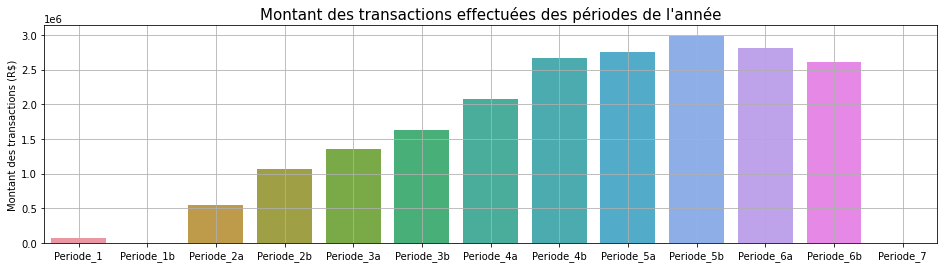

In [ ]:
# Payment values per periods of 2 months
periodbis_sum = df_tot.groupby('PeriodeBis')['payment_value'].sum()
plt.figure(figsize=(16, 4))
labels = periodbis_sum.index
size = periodbis_sum.values

plt.figure(figsize=(16, 4))
sns.barplot(x=labels, y=size)

plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ,10, 11, 12],
           ['Periode_1',  'Periode_1b', 'Periode_2a', 'Periode_2b',
            'Periode_3a', 'Periode_3b', 'Periode_4a', 'Periode_4b',
            'Periode_5a', 'Periode_5b', 'Periode_6a', 'Periode_6b',
            'Periode_7'])
plt.xlabel('')
plt.ylabel('Montant des transactions (R$)')  # R$=réal brésilien
plt.title('Montant des transactions effectuées des périodes de l\'année', size=15)
plt.grid()
plt.show()

## Conserver unique les colonnes d'intérêt 

In [ ]:
df_tot_final = df_tot[[
    'customer_unique_id',
    'order_purchase_timestamp',
    'order_id',
    'payment_value',
    'review_score',
    'payment_sequential',
    'product_category_name_english',
    'distance',
    'freight_value',
    'seller_id',
    'Periode',
    'PeriodeBis'
]]

In [ ]:
df_tot_final.sample(5)

customer_unique_id  ...  PeriodeBis
46143   bc9ca6cf4a0aedc4eade3ae32f498e52  ...  Periode_2b
116881  e7a1c791bc9982fe20ddccf0cadc0f14  ...  Periode_5a
8547    448f663622338f4cb25c75f16aa9ef95  ...  Periode_4a
34169   c223b7ac9fead9ac6517fae001822112  ...  Periode_5b
66985   6e97ac4071e114ad38ef3618e743532f  ...  Periode_4b

[5 rows x 12 columns]

## Supprimer les NaN

In [ ]:
df_tot_final.shape

(119151, 12)

In [ ]:
df_tot_final = df_tot_final.dropna(how='any')

In [ ]:
df_tot_final.shape

(116006, 12)

Observations : 

## Sauvegarder les données

In [ ]:
df_tot_final.to_csv('df_cleaned.csv', encoding='utf8')

# Analyse

In [ ]:
# Import librairies
import pandas as pd
import numpy as np
import seaborn as sns
import io
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm

import pingouin as pg

from datetime import timedelta

In [ ]:
# If working in google colab
# Import files
from google.colab import files
uploaded = files.upload()

Saving df_cleaned.csv to df_cleaned.csv


In [ ]:
# If working in google colab
# Read files
df_clean = pd.read_csv(io.BytesIO(uploaded['df_cleaned.csv']))

In [ ]:
# If working in Jupyter
# Read file
df_clean = pd.read_csv('df_cleaned.csv', low_memory=False)

In [ ]:
# Work on a copy of the df
df = df_clean.copy()

In [ ]:
df.columns

Index(['Unnamed: 0', 'customer_unique_id', 'order_purchase_timestamp',
       'order_id', 'payment_value', 'review_score', 'payment_sequential',
       'product_category_name_english', 'distance', 'freight_value',
       'seller_id', 'Periode', 'PeriodeBis'],
      dtype='object')

In [ ]:
df.dtypes

Unnamed: 0                         int64
customer_unique_id                object
order_purchase_timestamp          object
order_id                          object
payment_value                    float64
review_score                       int64
payment_sequential               float64
product_category_name_english     object
distance                         float64
freight_value                    float64
seller_id                         object
Periode                           object
PeriodeBis                        object
dtype: object

In [ ]:
df = df.drop(columns=['Unnamed: 0'])
df.sample(5)

customer_unique_id  ...  PeriodeBis
52966   d425130be1b15a4580645e4a3c9b4768  ...  Periode_3a
59301   49b66a580e2946bdc64db77cc4c1754c  ...  Periode_6a
99293   241ff21628fa8292d19e0a234a244840  ...  Periode_5a
108815  79b5958bf2a8f26e52d5df883768655d  ...  Periode_4b
5230    bd2914d2e0b52a1b1bce55b39c1b1edf  ...  Periode_5b

[5 rows x 12 columns]

## Analyse RFM

In [ ]:
df.dtypes

customer_unique_id                object
order_purchase_timestamp          object
order_id                          object
payment_value                    float64
review_score                       int64
payment_sequential               float64
product_category_name_english     object
distance                         float64
freight_value                    float64
seller_id                         object
Periode                           object
PeriodeBis                        object
dtype: object

In [ ]:
df.shape

(116006, 12)

In [ ]:
# Remove rows with at least one NaN value
df.dropna(how='any', inplace=True)

In [ ]:
df.shape

(116006, 12)

In [ ]:
df.sample(5)

customer_unique_id  ...  PeriodeBis
99740  5e9873081c002c291623b4f23d8f5ad3  ...  Periode_6a
70453  95c85e956d3aa612bb42a94c0872d1ed  ...  Periode_6a
99550  c2d4f876f7d081f5bfb6caabe991e64a  ...  Periode_4a
93379  24ec1a29ab4911b4b1bc819a74fc08af  ...  Periode_4b
41537  94183723d784d37f33a1f6dd09ac7567  ...  Periode_4b

[5 rows x 12 columns]

## Choix des variables de l'analyse

### Création d'une variable 'Panier_Moyen'

In [ ]:
"""We create a table with transaction values per customer.

1 row per transaction with:
- payement value;
- freight value.
We create a ratio for the value of freight and the payement value.
"""


def create_dfCommandes(df):

    global dfCommandes

    dfCommandes = df.groupby(['order_id', 'customer_unique_id']).agg({
        'payment_value': lambda x: np.mean(x),
        'freight_value': lambda x: np.mean(x)
    })

    # Rename column
    dfCommandes.rename(columns={'payment_value': 'Montant_Commande',
                                'freight_value': 'Montant_Frais'},
                       inplace=True)

    # Create a column with the value of
    # the ratio of paiement value on freight value
    dfCommandes['Ratio_Frais_Panier'] = dfCommandes['Montant_Frais']/dfCommandes['Montant_Commande']

    return dfCommandes.sample(5)


create_dfCommandes(df)

Montant_Commande  ...  Ratio_Frais_Panier
order_id                         customer_unique_id                                  ...                    
5c734ce57306bb7ff8cf9a8fc11b63d7 e732b096aef595c36483a20cb2c0464f             49.16  ...            0.188365
eb3f33b48e3328516737e05964ed19a0 0ecedf16eed5abcb38cde94d495e26f9             98.67  ...            0.239992
731d09efba8a2040506f3097b149c979 bcc613447f8ad78b10c2d4e3198b3151            125.87  ...            0.126162
75aed426d187c5f1099af12729834732 f28304729eda01a4b1307e4813684dca            520.75  ...            0.039846
0532db7075ba24a851a342f08d0e0b39 463116a6ae33fb497ae0708b50892c5c            213.41  ...            0.067523

[5 rows x 3 columns]

In [ ]:
dfCommandes.shape

(96772, 3)

In [ ]:
"""Create a table with the average basket by customer.

1 row per customer with:
- average basket;
- average  ratio value of freight on payement value.
"""


def create_dfPanierMoyen(df):

    global dfPanierMoyen

    dfPanierMoyen = dfCommandes.groupby(['customer_unique_id']).agg({
        'Montant_Commande': lambda x: np.mean(x),
        'Ratio_Frais_Panier': lambda x: np.mean(x)
    })

    # Rename column
    dfPanierMoyen.rename(columns={'Montant_Commande': 'Panier_Moyen',
                                  'Ratio_Frais_Panier': 'Ratio_Frais_Panier_Moyen'},
                         inplace=True)

    return dfPanierMoyen.sample(5)


create_dfPanierMoyen(df)

Panier_Moyen  Ratio_Frais_Panier_Moyen
customer_unique_id                                                      
db23d3524d9e1ded4ec9fb121a401b45         94.21                  0.151895
8fe346bf2e4af73b3752f0bb1e8ea203         31.05                  0.516908
d9574b13255a0f9185d0312e6c0d26fb         36.75                  0.322449
1991e2a2fbea2656da724df38591f6bc         47.22                  0.409149
a4168a1c5920fe8149605a248bc01c0e         50.09                  0.301457

In [ ]:
dfPanierMoyen.shape

(93627, 2)

In [ ]:
# Remove index
dfPanierMoyen.reset_index(level=0, inplace=True)
dfPanierMoyen.sample(5)

customer_unique_id  Panier_Moyen  Ratio_Frais_Panier_Moyen
6674   120f875c7db31f3a391a0feacbe05fa5         62.41                  0.214869
10234  1bc4853daf81bf04ff914f0ec3f4edf9         64.94                  0.307207
68090  b9d9c0cb3dde3ca53ac93976930402ef        104.82                  0.189181
64549  b00e0fd2ae759fd947aac853c836b93c        100.95                  0.208519
53297  91c2dc5bcfe39cc349dc8bc888352b88         90.18                  0.167443

In [ ]:
# Check the absence of duplicates when sorted by 'customer_unique_id'
dfPanierMoyen[dfPanierMoyen.duplicated(subset=['customer_unique_id'],
                                       keep=False)]

Empty DataFrame
Columns: [customer_unique_id, Panier_Moyen, Ratio_Frais_Panier_Moyen]
Index: []

In [ ]:
dfPanierMoyen.shape

(93627, 3)

### Création des autres variables

In [ ]:
"""Creating a table with variables of interest for the clustering."""


def RFM_Features(df, UniqueCustomerID, InvoiceDate,
                 TransactionsID, SalesValue, ReviewScore,
                 PayementSequences, NumberOfProductCategories,
                 DistanceSelCus, NumberSellerByOrder
                 ):
    # Convert to date format
    df[InvoiceDate] = pd.to_datetime(df[InvoiceDate], errors='coerce')
    # Create a finale date: last date in dataset + 1
    latest_date = df[InvoiceDate].max() + timedelta(1)

    # RFM feature creation
    RFMScores = df.groupby([UniqueCustomerID]).agg({
        InvoiceDate: lambda x: (latest_date - x.max()).days,
        TransactionsID: lambda x: len(x),
        SalesValue: lambda x: sum(x),
        ReviewScore: lambda x: np.mean(x),
        PayementSequences: lambda x: np.mean(x),
        NumberOfProductCategories: lambda x: len(x),
        DistanceSelCus: lambda x: np.mean(x),
        NumberSellerByOrder: lambda x: len(x),
    })

    # Convert invoiceDate in int since they contain numbers of days
    RFMScores[InvoiceDate] = RFMScores[InvoiceDate].astype(int)

    # Rename columns
    RFMScores.rename(columns={'customer_unique_id': 'ID_Client',
                              'order_purchase_timestamp': 'Jours_Depuis_Dernier_Achat',
                              'order_id': 'Nb_Transactions',
                              'payment_value': 'Achats_Totaux',
                              'review_score': 'Avis_Moyen',
                              'payment_sequential': 'Nb_Séquences_Paiement_Moyen',
                              'product_category_name_english': 'Nb_Categories_Produits',
                              'distance': 'Distance_Sel_Cus',
                              'seller_id': 'Nombre_Vendeurs_Par_Commande'
                              },
                     inplace=True)

    return RFMScores.reset_index()



In [ ]:
RFM = RFM_Features(df=df,
                   UniqueCustomerID='customer_unique_id',
                   InvoiceDate='order_purchase_timestamp',
                   TransactionsID='order_id',
                   SalesValue='payment_value',
                   ReviewScore='review_score',
                   PayementSequences='payment_sequential',
                   NumberOfProductCategories='product_category_name_english',
                   DistanceSelCus='distance',
                   NumberSellerByOrder='seller_id'
                   )
RFM.head()

customer_unique_id  ...  Nombre_Vendeurs_Par_Commande
0  0000366f3b9a7992bf8c76cfdf3221e2  ...                             1
1  0000b849f77a49e4a4ce2b2a4ca5be3f  ...                             1
2  0000f46a3911fa3c0805444483337064  ...                             1
3  0000f6ccb0745a6a4b88665a16c9f078  ...                             1
4  0004aac84e0df4da2b147fca70cf8255  ...                             1

[5 rows x 9 columns]

In [ ]:
RFM.rename(columns={'customer_unique_id': 'ID_Client'}, inplace=True)
RFM.sample(5)

ID_Client  ...  Nombre_Vendeurs_Par_Commande
63241  ac98d6799e0f48b584c7aff57799b704  ...                             1
6724   12373dc83d9c052f14c972f235f75064  ...                             2
49787  87f6dff99fd05d9877023e74d5802958  ...                             1
20601  381411bd0b3e1aff0b23bfed26d000af  ...                             1
91786  faed38109bbf7da6f035630d92a49a27  ...                             1

[5 rows x 9 columns]

In [ ]:
RFM.shape

(93627, 9)

### Créer un dataframe avec toutes les variables

In [ ]:
# Merge RFM with dfPanierMoyen on 'customer_unique_id'

df_final = RFM.merge(dfPanierMoyen, left_on=['ID_Client'],
                     right_on=['customer_unique_id'],
                     how='left')

df_final.sample(5)

ID_Client  ...  Ratio_Frais_Panier_Moyen
7326   13d8bec31b0042eec8129c4716d47254  ...                  0.084574
20255  3728b905b6f0cd9dfad3e26c3d273a5e  ...                  0.217096
86649  ecaf730f4948677ba004c826a5bb60c0  ...                  0.100072
35724  61439e840fe1e7216ada4f256239967c  ...                  0.131144
38199  68238c59076a730633bd2e71a08bdf95  ...                  0.081720

[5 rows x 12 columns]

In [ ]:
# Remove 'customer_unique_id' column
df_final.drop(columns=['customer_unique_id'], inplace=True)
df_final.sample(5)

ID_Client  ...  Ratio_Frais_Panier_Moyen
7329   13db1b0290d3d487664620f36c3e0df5  ...                  0.160984
82145  e04770f94f452d1cdd8d84c048af4860  ...                  0.085530
7441   14299050642e3b5889fc67b234591388  ...                  0.413963
59395  a2346489c23a35ba85d17038fa1cb7da  ...                  0.325997
35736  6148c0fb32e5c7352da8656b9b34ec60  ...                  0.000000

[5 rows x 11 columns]

In [ ]:
df_final.columns

Index(['ID_Client', 'Jours_Depuis_Dernier_Achat', 'Nb_Transactions',
       'Achats_Totaux', 'Avis_Moyen', 'Nb_Séquences_Paiement_Moyen',
       'Nb_Categories_Produits', 'Distance_Sel_Cus',
       'Nombre_Vendeurs_Par_Commande', 'Panier_Moyen',
       'Ratio_Frais_Panier_Moyen'],
      dtype='object')

In [ ]:
df_final['Ratio_Frais_Panier_Moyen'].max

<bound method Series.max of 0        0.084567
1        0.304892
2        0.199722
3        0.404172
4        0.085784
           ...   
93622    0.120300
93623    0.232797
93624    0.200605
93625    0.139801
93626    0.203605
Name: Ratio_Frais_Panier_Moyen, Length: 93627, dtype: float64>

## Analyses univariées

In [ ]:
df_final.shape

(93627, 11)

In [ ]:
df_final.dropna(how='any', inplace=True)

In [ ]:
df_final.shape

(93627, 11)

### Variables quantitatives

In [ ]:
# Create a list with the quantitative variables
var_quantitatives_analyse = [
    'Jours_Depuis_Dernier_Achat', 'Nb_Transactions',
    'Achats_Totaux', 'Avis_Moyen', 'Nb_Séquences_Paiement_Moyen',
    'Nb_Categories_Produits', 'Distance_Sel_Cus',
    'Nombre_Vendeurs_Par_Commande', 'Panier_Moyen',
    'Ratio_Frais_Panier_Moyen'
]

In [ ]:
"""We create a function that studies quantitative variables"""


def an_univariees_quant(df, col_name_quant):
    valeurs_col_quant = df[col_name_quant]

    # Measures of Central Tendancy
    print('moy:\n', df[col_name_quant].mean())
    print('med:\n', df[col_name_quant].median())
    print('mod:\n', df[col_name_quant].mode())

    # Measures of Dispersion
    print('var:\n', df[col_name_quant].var(ddof=0))
    print('ect:\n', df[col_name_quant].std(ddof=0))

    # Measures of Shape
    print('skw:\n', df[col_name_quant].skew())
    print('kur:\n', df[col_name_quant].kurtosis())

    # Plot figures
    plt.figure()
    sns.distplot(valeurs_col_quant)
    plt.figure()
    sns.boxplot(valeurs_col_quant)
    return valeurs_col_quant



Jours_Depuis_Dernier_Achat
moy:
 242.89441080030332
med:
 223.0
mod:
 0    283
dtype: int64
var:
 23472.991595855477
ect:
 153.2089801410331
skw:
 0.45307788407798366
kur:
 -0.6520999948918664


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

Nb_Transactions
moy:
 1.2390229314193555
med:
 1.0
mod:
 0    1
dtype: int64
var:
 0.7241490789816227
ect:
 0.8509694935669684
skw:
 15.772589485099974
kur:
 784.9511140587817


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Achats_Totaux
moy:
 214.2727165240763
med:
 113.09
mod:
 0    77.57
dtype: float64
var:
 420443.23411021935
ect:
 648.4159422085636
skw:
 68.41472826565114
kur:
 9390.018192795462


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Avis_Moyen
moy:
 4.089042627990528
med:
 5.0
mod:
 0    5.0
dtype: float64
var:
 1.7874455715919664
ect:
 1.3369538404866363
skw:
 -1.3671117011365745
kur:
 0.5388836601438847


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Nb_Séquences_Paiement_Moyen
moy:
 1.0229534834773704
med:
 1.0
mod:
 0    1.0
dtype: float64
var:
 0.036126917929761214
ect:
 0.19007082345736606
skw:
 23.838552305342088
kur:
 1023.7820263471457


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Nb_Categories_Produits
moy:
 1.2390229314193555
med:
 1.0
mod:
 0    1
dtype: int64
var:
 0.7241490789816227
ect:
 0.8509694935669684
skw:
 15.772589485099974
kur:
 784.9511140587817


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Distance_Sel_Cus
moy:
 601998.6474225348
med:
 434944.9248299447
mod:
 0    0.0
dtype: float64
var:
 350478136667.1175
ect:
 592011.939632232
skw:
 1.6457178424140477
kur:
 2.458242521898152


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Nombre_Vendeurs_Par_Commande
moy:
 1.2390229314193555
med:
 1.0
mod:
 0    1
dtype: int64
var:
 0.7241490789816227
ect:
 0.8509694935669684
skw:
 15.772589485099974
kur:
 784.9511140587817


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Panier_Moyen
moy:
 158.62002280173357
med:
 103.55
mod:
 0    77.57
dtype: float64
var:
 47778.94549983329
ect:
 218.58395526623926
skw:
 9.413041326592605
kur:
 254.2324210960075


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Ratio_Frais_Panier_Moyen
moy:
 0.20464783994286845
med:
 0.17082130674363682
mod:
 0    0.0
dtype: float64
var:
 0.023622546796049027
ect:
 0.15369628100916766
skw:
 5.205327349219119
kur:
 101.30583897199371


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


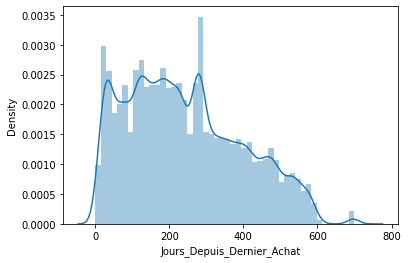

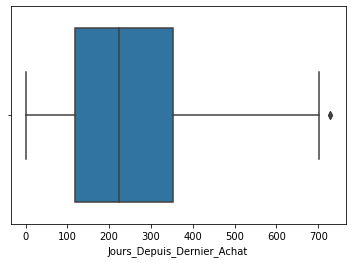

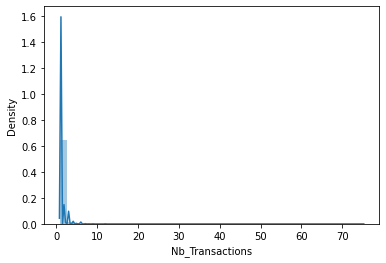

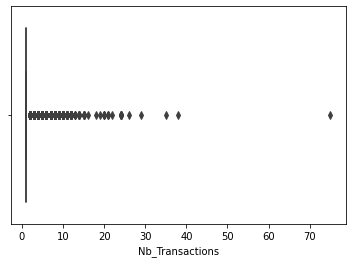

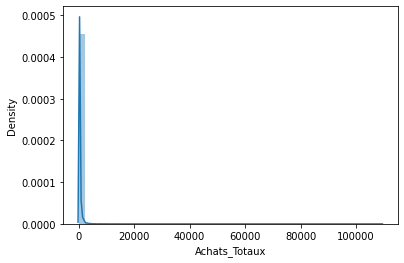

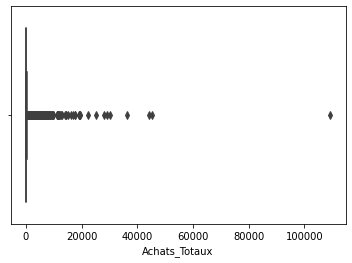

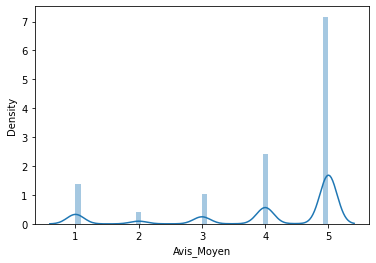

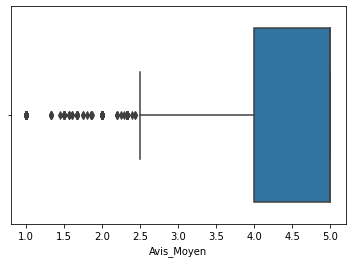

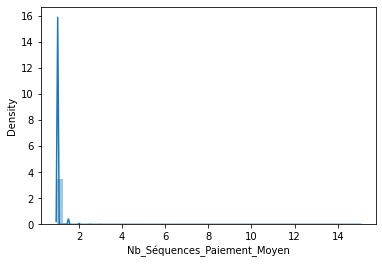

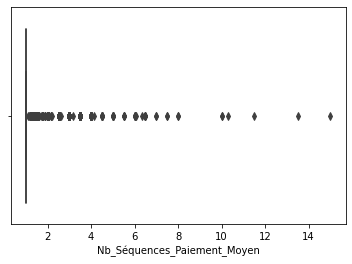

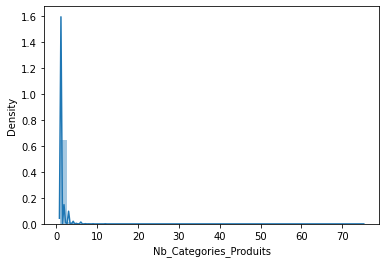

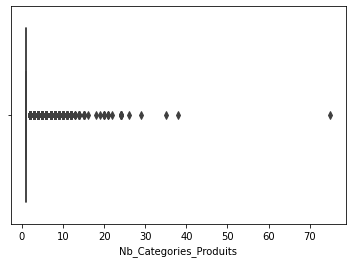

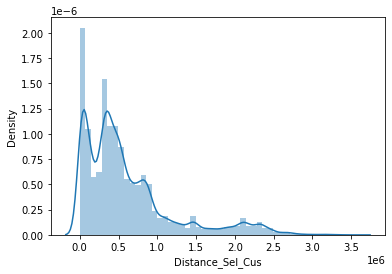

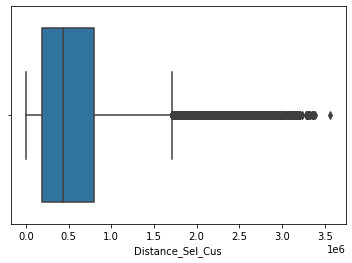

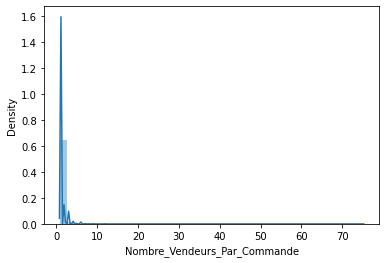

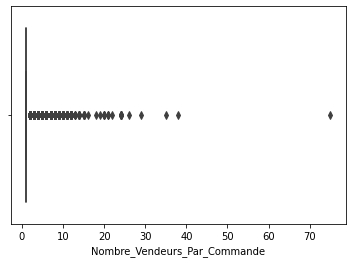

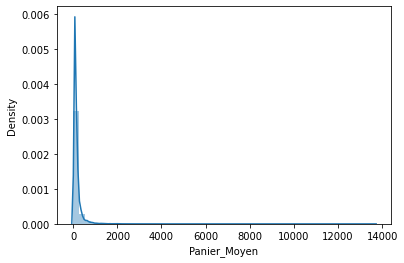

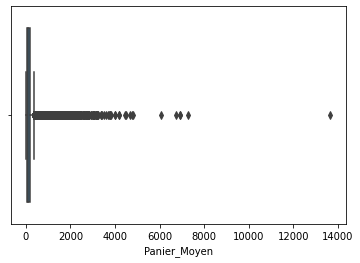

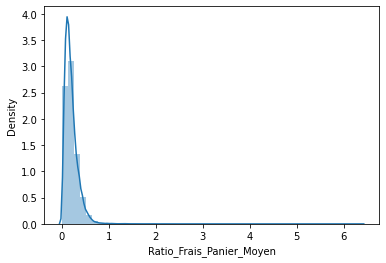

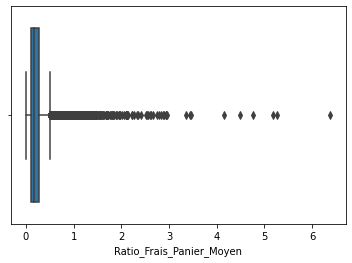

In [ ]:
# Apply function for each quantitative variable
for col_name_quant in var_quantitatives_analyse:
    print(col_name_quant)
    an_univariees_quant(df_final, col_name_quant) 
    

## Analyses bivariées

### Régression linéaire

In [ ]:
"""We create a function calculating the stats for a linear regression"""


def reg_lin_VF(df, var1, var2):
    print(var1, var2)
    # Calculate Pearson Coefficient and Empirical Covariance
    # Pearson Coefficient
    rpearson = st.pearsonr(df[var1], df[var2])[0]
    print('Le r de pearson est {} rpearson'.format(rpearson))
    # Empirical Covariance
    covar = np.cov(df[var1], df[var2], ddof=0)[1, 0]
    print('La covariance empirique est {} covar'.format(covar))
    # Print stats table
    x = df[var1].values
    y = df[var2].values
    print(pg.corr(x, y, tail='two-sided', method='pearson'))
    print('######################################################')

    

### Recherches de corrélation 

In [ ]:
list_var = [
    'Jours_Depuis_Dernier_Achat', 'Nb_Transactions',
    'Achats_Totaux', 'Avis_Moyen',
    'Nb_Séquences_Paiement_Moyen', 'Nb_Categories_Produits',
    'Distance_Sel_Cus', 'Nombre_Vendeurs_Par_Commande',
    'Panier_Moyen', 'Ratio_Frais_Panier_Moyen'
]

In [ ]:
for var1 in list_var:
    for var2 in list_var:
        reg_lin_VF(df_final, var1, var2) 

Jours_Depuis_Dernier_Achat Jours_Depuis_Dernier_Achat
Le r de pearson est 1.0 rpearson
La covariance empirique est 23472.991595855594 covar
             n    r       CI95%   r2  adj_r2  p-val BF10  power
pearson  93627  1.0  [1.0, 1.0]  1.0     1.0    0.0  nan    1.0
######################################################
Jours_Depuis_Dernier_Achat Nb_Transactions
Le r de pearson est 0.0069984331735258015 rpearson
La covariance empirique est 0.9124289008513767 covar


/usr/local/lib/python3.6/dist-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/usr/local/lib/python3.6/dist-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))


             n         r        CI95%  ...     p-val   BF10     power
pearson  93627  0.006998  [0.0, 0.01]  ...  0.032241  0.041  0.572019

[1 rows x 8 columns]
######################################################
Jours_Depuis_Dernier_Achat Achats_Totaux
Le r de pearson est -0.0021658279288489434 rpearson
La covariance empirique est -215.16015844193404 covar
             n         r         CI95%  ...     p-val   BF10     power
pearson  93627 -0.002166  [-0.01, 0.0]  ...  0.507521  0.005  0.101633

[1 rows x 8 columns]
######################################################
Jours_Depuis_Dernier_Achat Avis_Moyen
Le r de pearson est -0.02001636785087884 rpearson
La covariance empirique est -4.100019369403049 covar
             n         r           CI95%  ...         p-val       BF10     power
pearson  93627 -0.020016  [-0.03, -0.01]  ...  9.054359e-10  5.745e+05  0.999984

[1 rows x 8 columns]
######################################################
Jours_Depuis_Dernier_Achat Nb_Séquenc

/usr/local/lib/python3.6/dist-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/usr/local/lib/python3.6/dist-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))
/usr/local/lib/python3.6/dist-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/usr/local/lib/python3.6/dist-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))
/usr/local/lib/python3.6/dist-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/usr/local/lib/python3.6/dist-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))


Le r de pearson est 1.0 rpearson
La covariance empirique est 0.7241490789811287 covar
             n    r       CI95%   r2  adj_r2  p-val BF10  power
pearson  93627  1.0  [1.0, 1.0]  1.0     1.0    0.0  nan    1.0
######################################################
Nb_Transactions Distance_Sel_Cus
Le r de pearson est -0.014099252758564718 rpearson
La covariance empirique est -7102.979368050845 covar
             n         r           CI95%  ...     p-val    BF10     power
pearson  93627 -0.014099  [-0.02, -0.01]  ...  0.000016  45.096  0.990725

[1 rows x 8 columns]
######################################################
Nb_Transactions Nombre_Vendeurs_Par_Commande
Le r de pearson est 1.0 rpearson
La covariance empirique est 0.7241490789811287 covar
             n    r       CI95%   r2  adj_r2  p-val BF10  power
pearson  93627  1.0  [1.0, 1.0]  1.0     1.0    0.0  nan    1.0
######################################################
Nb_Transactions Panier_Moyen
Le r de pearson est 0.0912

/usr/local/lib/python3.6/dist-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/usr/local/lib/python3.6/dist-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))
/usr/local/lib/python3.6/dist-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/usr/local/lib/python3.6/dist-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))
/usr/local/lib/python3.6/dist-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/usr/local/lib/python3.6/dist-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))


             n         r           CI95%  ...     p-val    BF10     power
pearson  93627 -0.014099  [-0.02, -0.01]  ...  0.000016  45.096  0.990725

[1 rows x 8 columns]
######################################################
Nb_Categories_Produits Nombre_Vendeurs_Par_Commande
Le r de pearson est 1.0 rpearson
La covariance empirique est 0.7241490789811287 covar
             n    r       CI95%   r2  adj_r2  p-val BF10  power
pearson  93627  1.0  [1.0, 1.0]  1.0     1.0    0.0  nan    1.0
######################################################
Nb_Categories_Produits Panier_Moyen
Le r de pearson est 0.09127996909200738 rpearson
La covariance empirique est 16.97882984065658 covar
             n        r        CI95%  ...          p-val        BF10  power
pearson  93627  0.09128  [0.08, 0.1]  ...  2.249211e-172  5.152e+167    1.0

[1 rows x 8 columns]
######################################################
Nb_Categories_Produits Ratio_Frais_Panier_Moyen
Le r de pearson est 0.12291762891347943 

/usr/local/lib/python3.6/dist-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/usr/local/lib/python3.6/dist-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))
/usr/local/lib/python3.6/dist-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/usr/local/lib/python3.6/dist-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))


             n         r        CI95%  ...          p-val        BF10  power
pearson  93627  0.103919  [0.1, 0.11]  ...  4.522697e-223  2.246e+218    1.0

[1 rows x 8 columns]
######################################################
Distance_Sel_Cus Ratio_Frais_Panier_Moyen
Le r de pearson est 0.1885546118172497 rpearson
La covariance empirique est 17156.59043348031 covar
             n         r         CI95%        r2    adj_r2  p-val BF10  power
pearson  93627  0.188555  [0.18, 0.19]  0.035553  0.035532    0.0  inf    1.0
######################################################
Nombre_Vendeurs_Par_Commande Jours_Depuis_Dernier_Achat
Le r de pearson est 0.0069984331735258015 rpearson
La covariance empirique est 0.9124289008513767 covar
             n         r        CI95%  ...     p-val   BF10     power
pearson  93627  0.006998  [0.0, 0.01]  ...  0.032241  0.041  0.572019

[1 rows x 8 columns]
######################################################
Nombre_Vendeurs_Par_Commande Nb_Transac

/usr/local/lib/python3.6/dist-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/usr/local/lib/python3.6/dist-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))
/usr/local/lib/python3.6/dist-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/usr/local/lib/python3.6/dist-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))



La covariance empirique est 16.97882984065658 covar
             n        r        CI95%  ...          p-val        BF10  power
pearson  93627  0.09128  [0.08, 0.1]  ...  2.249211e-172  5.152e+167    1.0

[1 rows x 8 columns]
######################################################
Panier_Moyen Achats_Totaux
Le r de pearson est 0.6364258810901431 rpearson
La covariance empirique est 90202.75389177228 covar
             n         r         CI95%        r2    adj_r2  p-val BF10  power
pearson  93627  0.636426  [0.63, 0.64]  0.405038  0.405025    0.0  inf    1.0
######################################################
Panier_Moyen Avis_Moyen
Le r de pearson est -0.047720220273591414 rpearson
La covariance empirique est -13.945597713818614 covar
             n        r           CI95%  ...         p-val      BF10  power
pearson  93627 -0.04772  [-0.05, -0.04]  ...  2.431822e-48  9.14e+43    1.0

[1 rows x 8 columns]
######################################################
Panier_Moyen Nb_Séquen

/usr/local/lib/python3.6/dist-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/usr/local/lib/python3.6/dist-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))


             n         r         CI95%  ...     p-val     BF10     power
pearson  93627  0.014872  [0.01, 0.02]  ...  0.000005  128.548  0.995212

[1 rows x 8 columns]
######################################################
Ratio_Frais_Panier_Moyen Nb_Séquences_Paiement_Moyen
Le r de pearson est 0.4660295128515818 rpearson
La covariance empirique est 0.01361420343550099 covar
             n        r         CI95%        r2    adj_r2  p-val BF10  power
pearson  93627  0.46603  [0.46, 0.47]  0.217184  0.217167    0.0  inf    1.0
######################################################
Ratio_Frais_Panier_Moyen Nb_Categories_Produits
Le r de pearson est 0.12291762891347943 rpearson
La covariance empirique est 0.0160765007247288 covar
             n         r         CI95%  ...          p-val  BF10  power
pearson  93627  0.122918  [0.12, 0.13]  ...  6.535462e-312   inf    1.0

[1 rows x 8 columns]
######################################################
Ratio_Frais_Panier_Moyen Distance_Sel_Cus


/usr/local/lib/python3.6/dist-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/usr/local/lib/python3.6/dist-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))


In [ ]:
df_final.sample(5)

ID_Client  ...  Ratio_Frais_Panier_Moyen
50732  8aa367da75f0cc2bb2f9fc84ee54b457  ...                  0.680475
2574   0707757dcd8c22ace18aec1fe28f97dd  ...                  0.090288
46935  7ffbd36383421f26e00e047afb3bdb21  ...                  0.542569
33228  5a76612e828aadc27295600c272976c9  ...                  0.118799
73635  c8f4625cc170e6e1e33a9d8f537e375b  ...                  0.292324

[5 rows x 11 columns]

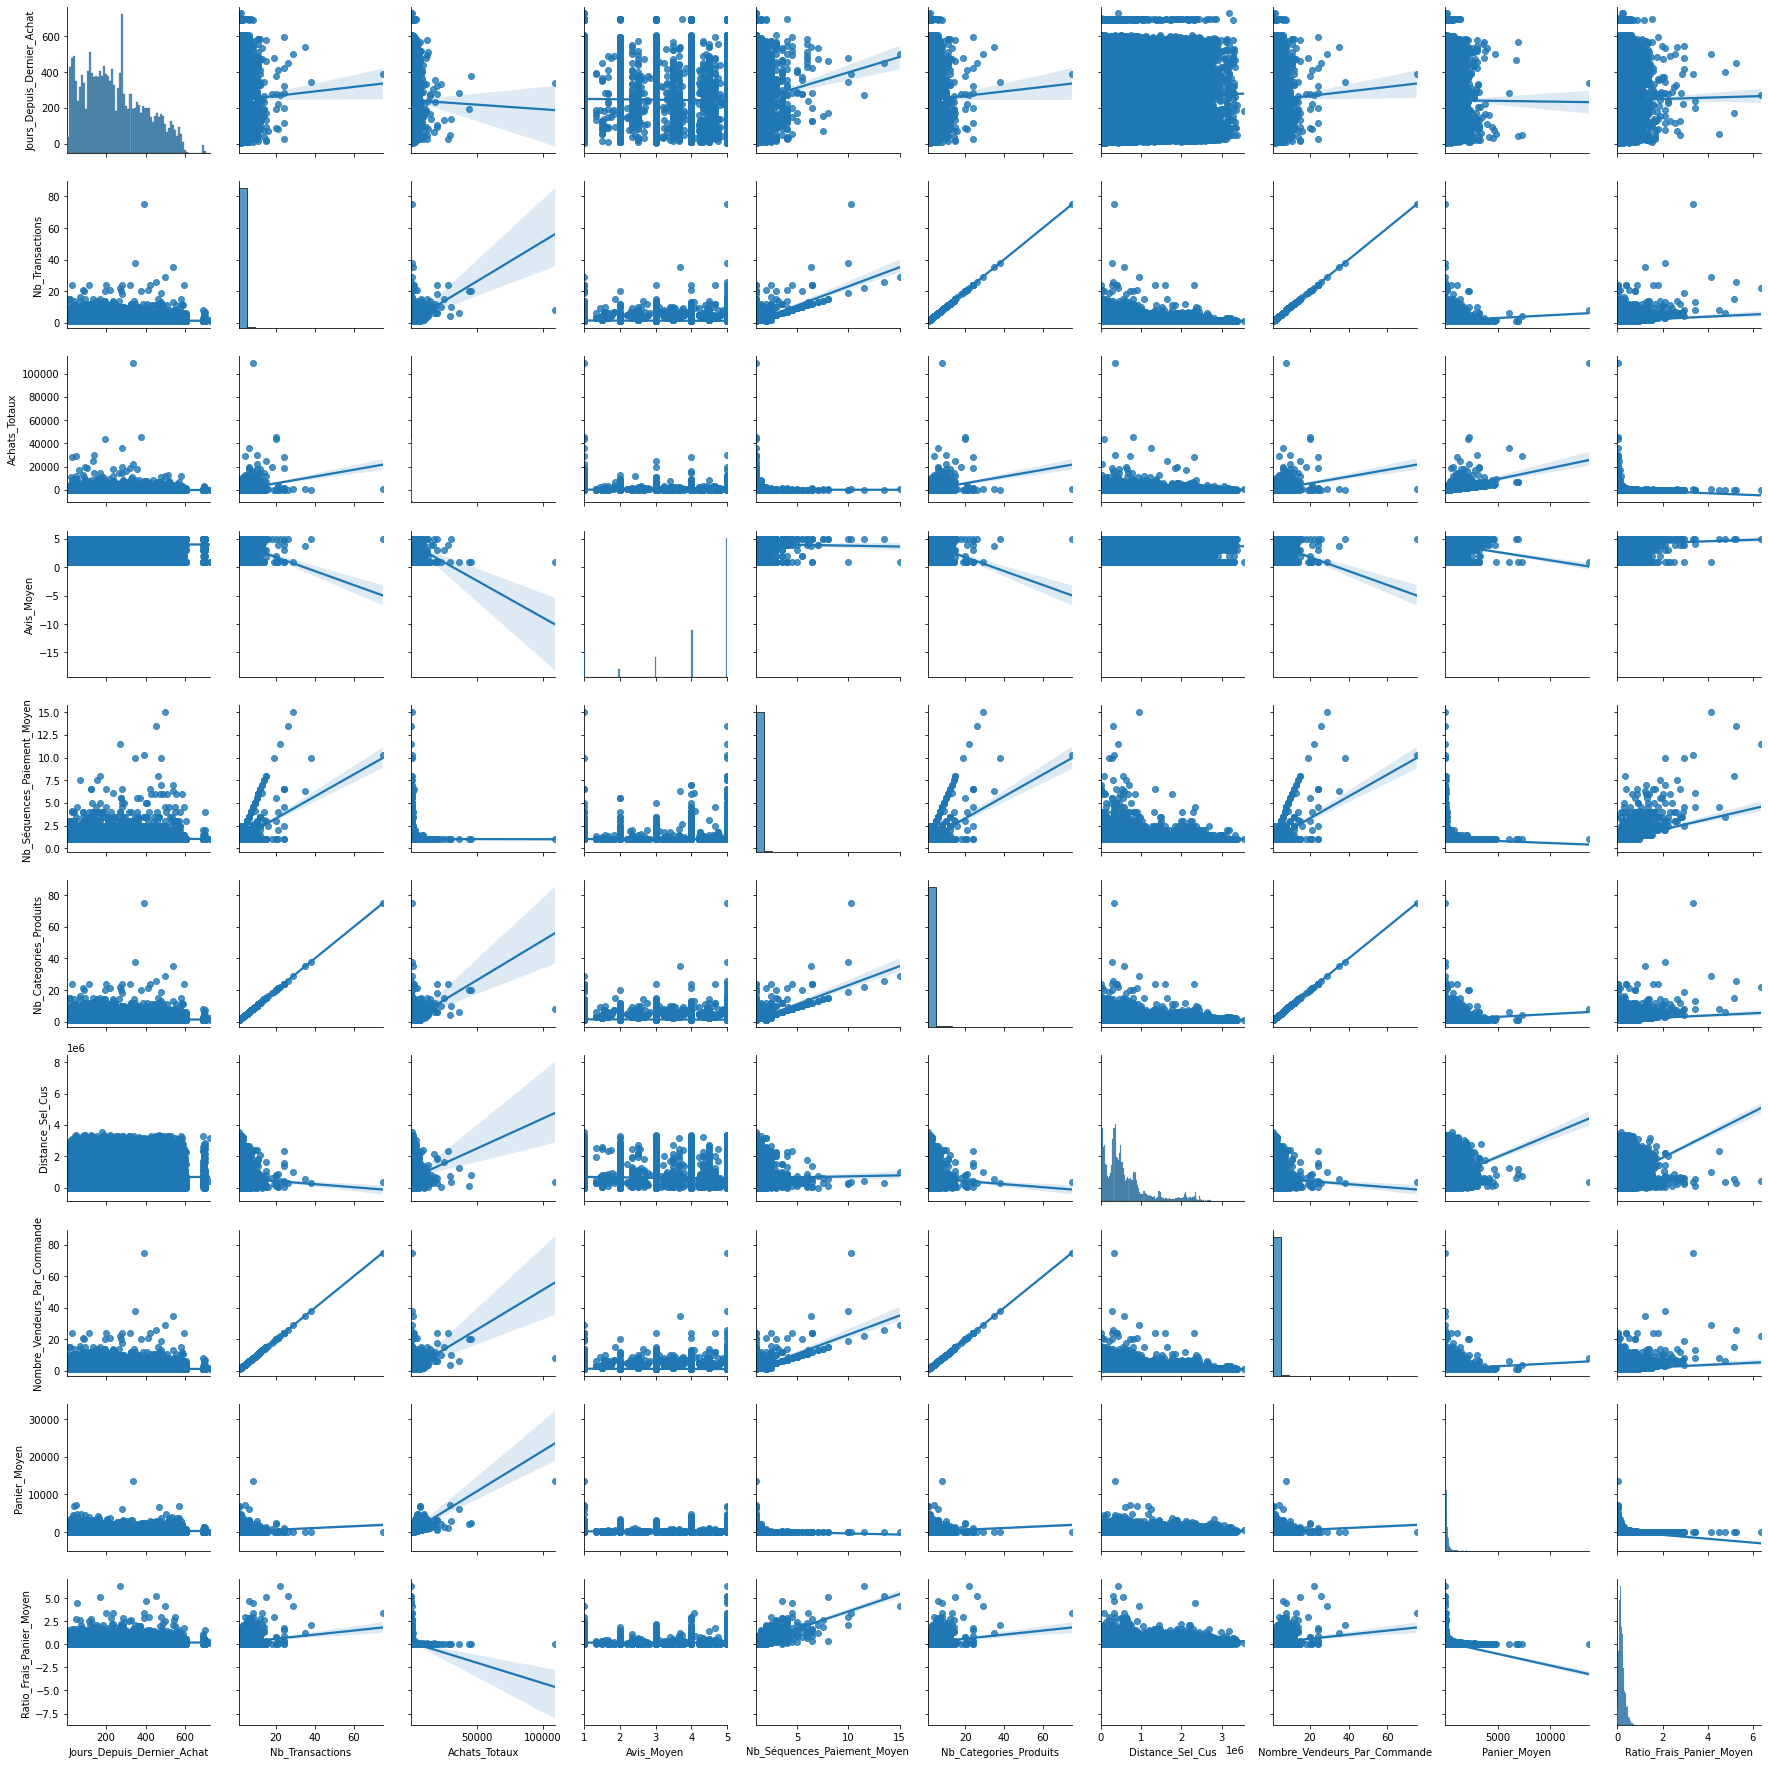

In [ ]:
sns.pairplot(df_final, kind='reg')

## Supprimer certaines variables corrélées 

In [ ]:
df_final.drop(columns=['Nb_Transactions',
                       'Nombre_Vendeurs_Par_Commande',
                       'Avis_Moyen',
                       'Distance_Sel_Cus'
                       ], inplace=True)

In [ ]:
df_final.sample(5)

ID_Client  ...  Ratio_Frais_Panier_Moyen
73110  c79a463e85fd8b530feba7db28c26de6  ...                  0.108331
91745  fad4aff30051ab61b252891f5bdf8056  ...                  0.282000
44499  795f6995217bc847277fefbf3598db94  ...                  0.540055
7242   139d91cb0779687389d93bbce424734e  ...                  0.168453
30693  53aefda7ff8c61644d09043810bbf79f  ...                  0.184015

[5 rows x 7 columns]

In [ ]:
df_final['Nb_Categories_Produits'].value_counts()

1     79526
2     10272
3      1996
4       948
5       334
6       299
7        74
8        44
10       25
12       25
9        24
11       18
14        8
24        7
15        7
13        4
20        4
21        3
75        1
35        1
16        1
18        1
19        1
22        1
26        1
29        1
38        1
Name: Nb_Categories_Produits, dtype: int64

In [ ]:
df_final.dtypes

ID_Client                       object
Jours_Depuis_Dernier_Achat       int64
Achats_Totaux                  float64
Nb_Séquences_Paiement_Moyen    float64
Nb_Categories_Produits           int64
Panier_Moyen                   float64
Ratio_Frais_Panier_Moyen       float64
dtype: object

## Sauvegarder

In [ ]:
df_final.to_csv('data_final.csv', encoding='utf8')

# Analyse Temporelle

### Etude des Périodes 

In [ ]:
df.sample(5)

customer_unique_id  ...  PeriodeBis
76265   028b8434bd4a6277e77f5b327cc1e1b0  ...  Periode_4b
74253   78c19d2cc2ba0be195c19ecc17182628  ...  Periode_5b
101659  bf8a01cfddcebe0a35344552a5b76057  ...  Periode_4b
32419   43dbac65589b2d10b93c98893c5c5831  ...  Periode_5b
107860  31c15d3e04d2edbb4b7d73578d305d32  ...  Periode_2b

[5 rows x 12 columns]

In [ ]:
# Filtrate df['Periode'] == 'Periode_1'
df1 = df[(df['Periode'] == 'Periode_1')]

df1.sample(5)

customer_unique_id  ...  PeriodeBis
47560  df2988ba3ed226b10521a0e4da849b61  ...  Periode_1a
59741  2e92a624a8a3f8ab5eb51d42fca60e5b  ...  Periode_1a
49241  94e5ea5a8c1bf546db2739673060c43f  ...  Periode_1a
73491  257c88e7a3ace7aa1a5eb5677f86b5b0  ...  Periode_1a
17549  a9530b74fe56ca4be9e5f2c7e7c4175a  ...  Periode_1a

[5 rows x 12 columns]

In [ ]:
df1.shape

(388, 12)

In [ ]:
# Filtrate df['Periode'] == 'Periode_2'
df2 = df[(df['Periode'] == 'Periode_2')]

df2.sample(5)

customer_unique_id  ...  PeriodeBis
269    e32483365c524c4beb41dfc34b8c4d3e  ...  Periode_2b
52671  fd5a35e4c44d8ea5646ada47ab50a2d1  ...  Periode_2b
64382  f4d5dbff0ff56deb045c6ee80b7d5fcc  ...  Periode_2b
40885  88d5a81aa8baf9e0ff6c8d888aa97a11  ...  Periode_2a
49730  5e0bab9d40f07a7b5f8555b15eb5703b  ...  Periode_2b

[5 rows x 12 columns]

In [ ]:
df2.shape

(8912, 12)

In [ ]:
# Filtrate df['Periode'] == 'Periode_3'
df3 = df[(df['Periode'] == 'Periode_3')]

df3.sample(5)

customer_unique_id  ...  PeriodeBis
31257  6871b052a835417d6d2e11153e0d3c2c  ...  Periode_3a
81830  e78ccc556d0b10e17e4e8337505dbce4  ...  Periode_3a
26564  318dd674b6e789249337a1edca1b0cc1  ...  Periode_3b
28177  1a71d6e458cb1c86e15b04c9599923ae  ...  Periode_3b
52377  d03bf8fad9e85c91fd611ab4e312b5d1  ...  Periode_3a

[5 rows x 12 columns]

In [ ]:
df3.shape

(17941, 12)

In [ ]:
# Filtrate df['Periode'] == 'Periode_4'
df4 = df[(df['Periode'] == 'Periode_4')]

df4.sample(5)

customer_unique_id  ...  PeriodeBis
19719   9d338ea2bd24cb22533c1f2bd36dd62d  ...  Periode_4b
60575   48f66f674fd74202b598a7f3b883bc8e  ...  Periode_4a
73000   a29d252fbbf518391f4d87a3d3a4c8f1  ...  Periode_4b
106189  d79b496988df8912c5e52b80440a0853  ...  Periode_4b
112593  56b579a2b53c22ca99dde61e69082f01  ...  Periode_4b

[5 rows x 12 columns]

In [ ]:
df4.shape

(25852, 12)

In [ ]:
# Filtrate df['Periode'] == 'Periode_5'
df5 = df[(df['Periode'] == 'Periode_5')]

df5.sample(5)

customer_unique_id  ...  PeriodeBis
102393  683714a0aa428eb05fd1dad1b3cb994f  ...  Periode_5b
533     948453924e3276630dc5eadbe84e1fa3  ...  Periode_5b
105975  c384543308c9d1e2f67117fc5b483573  ...  Periode_5a
6094    12a1f3d9e37e23f67cef3a828a0ba029  ...  Periode_5b
55246   0e1aa2e5d9087f8f34d2e6913d6891dd  ...  Periode_5b

[5 rows x 12 columns]

In [ ]:
df5.shape

(32769, 12)

In [ ]:
# Filtrate df['Periode'] == 'Periode_6'
df6 = df[(df['Periode'] == 'Periode_6')]

df6.sample(5)

customer_unique_id  ...  PeriodeBis
75582  5061b8a4932117dd2749e176c8bb2194  ...  Periode_6a
38730  301326c434ea9a25acc73068353f2606  ...  Periode_6a
72694  93e765999b1ac5d5498d5cbdd316c7ca  ...  Periode_6a
16914  313a1411e58266af71ecec9da279ad12  ...  Periode_6a
95309  ccab3a81489119980484135893a540fd  ...  Periode_6a

[5 rows x 12 columns]

In [ ]:
df6.shape

(30143, 12)

In [ ]:
# Filtrate df['Periode'] == 'Periode_7'
df7 = df[(df['Periode'] == 'Periode_7')]

df7

customer_unique_id  ... PeriodeBis
114491  ff22e30958c13ffe219db7d711e8f564  ...  Periode_7

[1 rows x 12 columns]

In [ ]:
df7.shape

(1, 12)

### Choix des variables de l’analyse

In [ ]:
RFM1 = RFM_Features(df=df1,
                    UniqueCustomerID='customer_unique_id',
                    InvoiceDate='order_purchase_timestamp',
                    TransactionsID='order_id',
                    SalesValue='payment_value',
                    ReviewScore='review_score',
                    PayementSequences='payment_sequential',
                    NumberOfProductCategories='product_category_name_english',
                    DistanceSelCus='distance',
                    NumberSellerByOrder='seller_id'
                    )
RFM1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


customer_unique_id  ...  Nombre_Vendeurs_Par_Commande
0  0032c76b20340da25249092a268ce66c  ...                             1
1  01f156677184504063bd19739f924af1  ...                             1
2  0313291a6f4f16df04dcf819d88c38ef  ...                             1
3  0636d30c77f0f9cfad81f1c9b58c791f  ...                             1
4  0659f2d6cabae94afd4d009c6d0e07dc  ...                             2

[5 rows x 9 columns]

In [ ]:
RFM1['Periode'] = '1'

In [ ]:
RFM1.rename(columns={'customer_unique_id': 'ID_Client'}, inplace=True)
RFM1.sample(2)

ID_Client  ...  Periode
287  f1efc19f85b4823a0bfde8f77f913207  ...        1
10   0a02ba4243b1b0e048a3841d5758d113  ...        1

[2 rows x 10 columns]

In [ ]:
RFM2 = RFM_Features(df=df2,
                    UniqueCustomerID='customer_unique_id',
                    InvoiceDate='order_purchase_timestamp',
                    TransactionsID='order_id',
                    SalesValue='payment_value',
                    ReviewScore='review_score',
                    PayementSequences='payment_sequential',
                    NumberOfProductCategories='product_category_name_english',
                    DistanceSelCus='distance',
                    NumberSellerByOrder='seller_id'
                    )
RFM2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


customer_unique_id  ...  Nombre_Vendeurs_Par_Commande
0  0000f46a3911fa3c0805444483337064  ...                             1
1  0005e1862207bf6ccc02e4228effd9a0  ...                             1
2  00115fc7123b5310cf6d3a3aa932699e  ...                             1
3  0011805441c0d1b68b48002f1d005526  ...                             1
4  00191a9719ef48ebb5860b130347bf33  ...                             1

[5 rows x 9 columns]

In [ ]:
RFM2['Periode'] = '2'

In [ ]:
RFM2.rename(columns={'customer_unique_id': 'ID_Client'}, inplace=True)
RFM2.sample(2)

ID_Client  ...  Periode
1565  355431b9ed50c0b65965e96a19718ca0  ...        2
1535  34350f8d9be701a6645ca0bf954161fe  ...        2

[2 rows x 10 columns]

In [ ]:
RFM3 = RFM_Features(df=df3,
                    UniqueCustomerID='customer_unique_id',
                    InvoiceDate='order_purchase_timestamp',
                    TransactionsID='order_id',
                    SalesValue='payment_value',
                    ReviewScore='review_score',
                    PayementSequences='payment_sequential',
                    NumberOfProductCategories='product_category_name_english',
                    DistanceSelCus='distance',
                    NumberSellerByOrder='seller_id'
                    )
RFM3.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


customer_unique_id  ...  Nombre_Vendeurs_Par_Commande
0  0006fdc98a402fceb4eb0ee528f6a8d4  ...                             1
1  000a5ad9c4601d2bbdd9ed765d5213b3  ...                             1
2  000de6019bb59f34c099a907c151d855  ...                             2
3  0010a452c6d13139e50b57f19f52e04e  ...                             1
4  001147e649a7b1afd577e873841632dd  ...                             2

[5 rows x 9 columns]

In [ ]:
RFM3['Periode'] = '3'

In [ ]:
RFM3.rename(columns={'customer_unique_id': 'ID_Client'}, inplace=True)
RFM3.sample(2)

ID_Client  ...  Periode
11815  d2047396438601ff3ff44b3ffce736ca  ...        3
13844  f5e85423b048d6130aaf8ff80e0783f0  ...        3

[2 rows x 10 columns]

In [ ]:
RFM4 = RFM_Features(df=df4,
                    UniqueCustomerID='customer_unique_id',
                    InvoiceDate='order_purchase_timestamp',
                    TransactionsID='order_id',
                    SalesValue='payment_value',
                    ReviewScore='review_score',
                    PayementSequences='payment_sequential',
                    NumberOfProductCategories='product_category_name_english',
                    DistanceSelCus='distance',
                    NumberSellerByOrder='seller_id'
                    )
RFM4.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


customer_unique_id  ...  Nombre_Vendeurs_Par_Commande
0  0000f6ccb0745a6a4b88665a16c9f078  ...                             1
1  0004aac84e0df4da2b147fca70cf8255  ...                             1
2  00082cbe03e478190aadbea78542e933  ...                             1
3  000bfa1d2f1a41876493be685390d6d3  ...                             2
4  000c8bdb58a29e7115cfc257230fb21b  ...                             1

[5 rows x 9 columns]

In [ ]:
RFM4['Periode'] = '4'

In [ ]:
RFM4.rename(columns={'customer_unique_id': 'ID_Client'}, inplace=True)
RFM4.sample(5)

ID_Client  ...  Periode
15064  b7d3b4f8da39c2b27404f53ef5f74be6  ...        4
20861  fedd4c0ac17d47475d8178c97f1724fb  ...        4
20144  f626e04100d0d00724d0bea895ccd9b8  ...        4
10857  851d675534217e1f642da9786feba029  ...        4
14521  b13032313910a07a23d55061dc18d9d7  ...        4

[5 rows x 10 columns]

In [ ]:
RFM5 = RFM_Features(df=df5,
                    UniqueCustomerID='customer_unique_id',
                    InvoiceDate='order_purchase_timestamp',
                    TransactionsID='order_id',
                    SalesValue='payment_value',
                    ReviewScore='review_score',
                    PayementSequences='payment_sequential',
                    NumberOfProductCategories='product_category_name_english',
                    DistanceSelCus='distance',
                    NumberSellerByOrder='seller_id'
                    )
RFM5.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


customer_unique_id  ...  Nombre_Vendeurs_Par_Commande
0  0004bd2a26a76fe21f786e4fbd80607f  ...                             1
1  00050ab1314c0e55a6ca13cf7181fecf  ...                             1
2  00053a61a98854899e70ed204dd4bafe  ...                             2
3  0005ef4cd20d2893f0d9fbd94d3c0d97  ...                             1
4  00090324bbad0e9342388303bb71ba0a  ...                             1

[5 rows x 9 columns]

In [ ]:
RFM5['Periode'] = '5'

In [ ]:
RFM5.rename(columns={'customer_unique_id': 'ID_Client'}, inplace=True)
RFM5.sample(5)

ID_Client  ...  Periode
10076  5fe52c2b0468fc25bba30f41035c4540  ...        5
14465  896dcfd0ea1b14793b85d956423b2680  ...        5
256    027835b35f861ba108518b2c529e308f  ...        5
26763  fef4049e57292e6a12d1aa76fd65637e  ...        5
703    06f52edb5666757a552cc099a5bce4a5  ...        5

[5 rows x 10 columns]

In [ ]:
RFM6 = RFM_Features(df=df6,
                    UniqueCustomerID='customer_unique_id',
                    InvoiceDate='order_purchase_timestamp',
                    TransactionsID='order_id',
                    SalesValue='payment_value',
                    ReviewScore='review_score',
                    PayementSequences='payment_sequential',
                    NumberOfProductCategories='product_category_name_english',
                    DistanceSelCus='distance',
                    NumberSellerByOrder='seller_id'
                    )
RFM6.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


customer_unique_id  ...  Nombre_Vendeurs_Par_Commande
0  0000366f3b9a7992bf8c76cfdf3221e2  ...                             1
1  0000b849f77a49e4a4ce2b2a4ca5be3f  ...                             1
2  000e309254ab1fc5ba99dd469d36bdb4  ...                             2
3  000ec5bff359e1c0ad76a81a45cb598f  ...                             1
4  000ed48ceeb6f4bf8ad021a10a3c7b43  ...                             1

[5 rows x 9 columns]

In [ ]:
RFM6['Periode'] = '6'

In [ ]:
RFM6.rename(columns={'customer_unique_id': 'ID_Client'}, inplace=True)
RFM6.sample(5)

ID_Client  ...  Periode
12540  7f9f0dc276be3cf7e9063e43f605c3c5  ...        6
12962  83f25b5de03e8c151cf79275249643e4  ...        6
7112   48804d0ed0bd01583e1caed259cd5173  ...        6
10200  67db6977c4098584c8ea7a773edb6bd7  ...        6
25098  ffa323b33234124b58b25511035c2855  ...        6

[5 rows x 10 columns]

In [ ]:
RFM7 = RFM_Features(df=df7,
                    UniqueCustomerID='customer_unique_id',
                    InvoiceDate='order_purchase_timestamp',
                    TransactionsID='order_id',
                    SalesValue='payment_value',
                    ReviewScore='review_score',
                    PayementSequences='payment_sequential',
                    NumberOfProductCategories='product_category_name_english',
                    DistanceSelCus='distance',
                    NumberSellerByOrder='seller_id'
                    )
RFM7.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


customer_unique_id  ...  Nombre_Vendeurs_Par_Commande
0  ff22e30958c13ffe219db7d711e8f564  ...                             1

[1 rows x 9 columns]

In [ ]:
RFM7['Periode'] = '7'

In [ ]:
RFM7.rename(columns={'customer_unique_id': 'ID_Client'}, inplace=True)
RFM7

ID_Client  ...  Periode
0  ff22e30958c13ffe219db7d711e8f564  ...        7

[1 rows x 10 columns]

In [ ]:
print('Taille de RFM1 :{}'.format(RFM1.shape))
print('Taille de RFM2 :{}'.format(RFM2.shape))
print('Taille de RFM3 :{}'.format(RFM3.shape))
print('Taille de RFM4 :{}'.format(RFM4.shape))
print('Taille de RFM5 :{}'.format(RFM5.shape))
print('Taille de RFM6 :{}'.format(RFM6.shape))
print('Taille de RFM7 :{}'.format(RFM7.shape))

Taille de RFM1 :(306, 10)
Taille de RFM2 :(7198, 10)
Taille de RFM3 :(14425, 10)
Taille de RFM4 :(20956, 10)
Taille de RFM5 :(26861, 10)
Taille de RFM6 :(25138, 10)
Taille de RFM7 :(1, 10)


Observations : De part sa petite taille, on choisit de ne pas étudier la période 7. 

### Créer un dataframe avec toutes les variables

In [ ]:
# Create dfCommandes
# create_dfCommandes(df1)

# Create dfPanierMoyen
# create_dfPanierMoyen(df1)

# Merge df1_final with dfPanierMoyen on 'customer_unique_id'
df1_final = RFM1.merge(dfPanierMoyen, left_on=['ID_Client'],
                       right_on=['customer_unique_id'],
                       how='left')

df1_final.sample(5)

ID_Client  ...  Ratio_Frais_Panier_Moyen
180  95e70fa5b9014a6a718b63350260356c  ...                  0.106563
249  d6a930873ee3f80aa823cb1d4baca58d  ...                  0.155795
259  db890d2b3c871e8e4298f21bc8a7736b  ...                  0.347798
284  ef3508c4c50a1f7c885ea2ee92218f08  ...                  0.286863
94   4854e9b3feff728c13ee5fc7d1547e92  ...                  0.207301

[5 rows x 13 columns]

In [ ]:
# Remove 'customer_unique_id' column
df1_final.drop(columns=['customer_unique_id'], inplace=True)

# Put column 'Periode' as the first column
first_col = df1_final.pop('Periode')
df1_final.insert(0, 'Periode', first_col)
df1_final.sample(5)

Periode  ... Ratio_Frais_Panier_Moyen
156       1  ...                 0.290529
245       1  ...                 0.113171
242       1  ...                 0.057112
117       1  ...                 0.329196
87        1  ...                 0.267643

[5 rows x 12 columns]

In [ ]:
# Create dfCommandes
# create_dfCommandes(df2)

# Create dfPanierMoyen
# create_dfPanierMoyen(df2)

# Merge df2_final with dfPanierMoyen on 'customer_unique_id'
df2_final = RFM2.merge(dfPanierMoyen, left_on=['ID_Client'],
                       right_on=['customer_unique_id'],
                       how='left')

df2_final.sample(5)

ID_Client  ...  Ratio_Frais_Panier_Moyen
5493  c1c1e07ab2c080ce6f5c3e8b621eff38  ...                  0.043122
4738  a7285f1f3a78d14aec4c0616e287f013  ...                  0.157189
5287  bb64830e1c89bffc295f3aaed115cdd6  ...                  0.235049
3186  70a2aece5345a514bf960b01975aaa60  ...                  0.394803
4387  9b8c8faaf334cf326177267323455cab  ...                  0.281940

[5 rows x 13 columns]

In [ ]:
# Remove 'customer_unique_id' column
df2_final.drop(columns=['customer_unique_id'], inplace=True)

# Put column 'Periode' as the first column
first_col = df2_final.pop('Periode')
df2_final.insert(0, 'Periode', first_col)
df2_final.sample(2)

Periode  ... Ratio_Frais_Panier_Moyen
2762       2  ...                 0.208563
2057       2  ...                 0.229636

[2 rows x 12 columns]

In [ ]:
# Create dfCommandes
# create_dfCommandes(df3)

# Create dfPanierMoyen
# create_dfPanierMoyen(df3)

# Merge df3_final with dfPanierMoyen on 'customer_unique_id'
df3_final = RFM3.merge(dfPanierMoyen, left_on=['ID_Client'],
                       right_on=['customer_unique_id'],
                       how='left')

df3_final.sample(5)

ID_Client  ...  Ratio_Frais_Panier_Moyen
567    0957a63bad23ff7aa7cafb23444dd42a  ...                  0.286079
1295   160adc55ae0fa7fd58951c99b0a78817  ...                  0.092389
341    05d1cd05687fd5153a9c244ee7052e99  ...                  0.056337
12507  de3fd2cb02aa89d030f943936ca17807  ...                  0.086190
3048   362f53537d0025a9258a595596f710da  ...                  0.147684

[5 rows x 13 columns]

In [ ]:
# Remove 'customer_unique_id' column
df3_final.drop(columns=['customer_unique_id'], inplace=True)

# Put column 'Periode' as the first column
first_col = df3_final.pop('Periode')
df3_final.insert(0, 'Periode', first_col)
df3_final.sample(5)

Periode  ... Ratio_Frais_Panier_Moyen
7778       3  ...                 0.487912
2647       3  ...                 0.137020
5172       3  ...                 0.243197
9716       3  ...                 0.233004
5891       3  ...                 0.278775

[5 rows x 12 columns]

In [ ]:
# Create dfCommandes
# create_dfCommandes(df4)

# Create dfPanierMoyen
# create_dfPanierMoyen(df4)


# Merge df4_final with dfPanierMoyen on 'customer_unique_id'
df4_final = RFM4.merge(dfPanierMoyen, left_on=['ID_Client'],
                       right_on=['customer_unique_id'],
                       how='left')

df4_final.sample(5)

ID_Client  ...  Ratio_Frais_Panier_Moyen
8824  6ccbb05bf38d868e2a997d0dcf1c32ad  ...                  0.197121
6721  52abf89b29f83d880575c6ebb425e846  ...                  0.280158
5130  3eebcfec6899f431eed8eed24d55fc01  ...                  0.078721
963   0c6622facae49819fe1591fcc9737bb2  ...                  0.050690
8907  6dc3035e9287f4e0cb29cea550b71a1a  ...                  0.084979

[5 rows x 13 columns]

In [ ]:
# Remove 'customer_unique_id' column
df4_final.drop(columns=['customer_unique_id'], inplace=True)

# Put column 'Periode' as the first column
first_col = df4_final.pop('Periode')
df4_final.insert(0, 'Periode', first_col)
df4_final.sample(2)

Periode  ... Ratio_Frais_Panier_Moyen
17007       4  ...                 0.403748
5809        4  ...                 0.306522

[2 rows x 12 columns]

In [ ]:
# Create dfCommandes
# create_dfCommandes(df5)

# Create dfPanierMoyen
# create_dfPanierMoyen(df5)

# Merge df5_final with dfPanierMoyen on 'customer_unique_id'
df5_final = RFM5.merge(dfPanierMoyen, left_on=['ID_Client'],
                       right_on=['customer_unique_id'],
                       how='left')

df5_final.sample(5)

ID_Client  ...  Ratio_Frais_Panier_Moyen
25105  eef3f55434294d0351d8b878d22192d3  ...                  0.157130
6073   3932704dadd5df21c9951ef56a0b72e0  ...                  0.293342
23884  e3170caa179176b49f1265ffde5c27fc  ...                  0.040856
2906   1b1a8a5d1b4b4a1cdf7ac7ad13795735  ...                  0.075923
6901   414490331521a9ef9449a48b71d8c4c4  ...                  0.031422

[5 rows x 13 columns]

In [ ]:
# Remove 'customer_unique_id' column
df5_final.drop(columns=['customer_unique_id'], inplace=True)

# Put column 'Periode' as the first column
first_col = df5_final.pop('Periode')
df5_final.insert(0, 'Periode', first_col)
df5_final.sample(2)

Periode  ... Ratio_Frais_Panier_Moyen
26847       5  ...                 0.243975
14848       5  ...                 0.458439

[2 rows x 12 columns]

In [ ]:
# Create dfCommandes
# create_dfCommandes(df6)

# Create dfPanierMoyen
# create_dfPanierMoyen(df6)

# Merge df6_final with dfPanierMoyen on 'customer_unique_id'
df6_final = RFM6.merge(dfPanierMoyen, left_on=['ID_Client'],
                       right_on=['customer_unique_id'],
                       how='left')

df6_final.sample(5)

ID_Client  ...  Ratio_Frais_Panier_Moyen
12861  82e63aead54e127900e93729dca4f2e1  ...                  0.099698
1303   0d17faf7d114c7cfc0c9fd4214eee20d  ...                  0.267624
10717  6cf4228e1512fc12c0d2b932cca21bdc  ...                  0.124495
23652  f0cd497bff8428c9467848afa71695fa  ...                  0.196100
20799  d395b5c9bd6e808680ac6dc64d6bfbad  ...                  0.338980

[5 rows x 13 columns]

In [ ]:
# Remove 'customer_unique_id' column
df6_final.drop(columns=['customer_unique_id'], inplace=True)

# Put column 'Periode' as the first column
first_col = df6_final.pop('Periode')
df6_final.insert(0, 'Periode', first_col)
df6_final.sample(2)

Periode  ... Ratio_Frais_Panier_Moyen
3527        6  ...                 0.115835
17713       6  ...                 0.097292

[2 rows x 12 columns]

In [ ]:
print('Taille de df1_final :{}'.format(df1_final.shape))
print('Taille de df2_final :{}'.format(df2_final.shape))
print('Taille de df3_final :{}'.format(df3_final.shape))
print('Taille de df4_final :{}'.format(df4_final.shape))
print('Taille de df5_final :{}'.format(df5_final.shape))
print('Taille de df6_final :{}'.format(df6_final.shape))
# print('Taille de df7_final :{}'.format(df7_final.shape))

Taille de df1_final :(306, 12)
Taille de df2_final :(7198, 12)
Taille de df3_final :(14425, 12)
Taille de df4_final :(20956, 12)
Taille de df5_final :(26861, 12)
Taille de df6_final :(25138, 12)


In [ ]:
df1_final.columns

Index(['Periode', 'ID_Client', 'Jours_Depuis_Dernier_Achat', 'Nb_Transactions',
       'Achats_Totaux', 'Avis_Moyen', 'Nb_Séquences_Paiement_Moyen',
       'Nb_Categories_Produits', 'Distance_Sel_Cus',
       'Nombre_Vendeurs_Par_Commande', 'Panier_Moyen',
       'Ratio_Frais_Panier_Moyen'],
      dtype='object')

In [ ]:
df2_final.columns

Index(['Periode', 'ID_Client', 'Jours_Depuis_Dernier_Achat', 'Nb_Transactions',
       'Achats_Totaux', 'Avis_Moyen', 'Nb_Séquences_Paiement_Moyen',
       'Nb_Categories_Produits', 'Distance_Sel_Cus',
       'Nombre_Vendeurs_Par_Commande', 'Panier_Moyen',
       'Ratio_Frais_Panier_Moyen'],
      dtype='object')

In [ ]:
df3_final.columns

Index(['Periode', 'ID_Client', 'Jours_Depuis_Dernier_Achat', 'Nb_Transactions',
       'Achats_Totaux', 'Avis_Moyen', 'Nb_Séquences_Paiement_Moyen',
       'Nb_Categories_Produits', 'Distance_Sel_Cus',
       'Nombre_Vendeurs_Par_Commande', 'Panier_Moyen',
       'Ratio_Frais_Panier_Moyen'],
      dtype='object')

In [ ]:
df4_final.columns

Index(['Periode', 'ID_Client', 'Jours_Depuis_Dernier_Achat', 'Nb_Transactions',
       'Achats_Totaux', 'Avis_Moyen', 'Nb_Séquences_Paiement_Moyen',
       'Nb_Categories_Produits', 'Distance_Sel_Cus',
       'Nombre_Vendeurs_Par_Commande', 'Panier_Moyen',
       'Ratio_Frais_Panier_Moyen'],
      dtype='object')

In [ ]:
df5_final.columns

Index(['Periode', 'ID_Client', 'Jours_Depuis_Dernier_Achat', 'Nb_Transactions',
       'Achats_Totaux', 'Avis_Moyen', 'Nb_Séquences_Paiement_Moyen',
       'Nb_Categories_Produits', 'Distance_Sel_Cus',
       'Nombre_Vendeurs_Par_Commande', 'Panier_Moyen',
       'Ratio_Frais_Panier_Moyen'],
      dtype='object')

In [ ]:
df6_final.columns

Index(['Periode', 'ID_Client', 'Jours_Depuis_Dernier_Achat', 'Nb_Transactions',
       'Achats_Totaux', 'Avis_Moyen', 'Nb_Séquences_Paiement_Moyen',
       'Nb_Categories_Produits', 'Distance_Sel_Cus',
       'Nombre_Vendeurs_Par_Commande', 'Panier_Moyen',
       'Ratio_Frais_Panier_Moyen'],
      dtype='object')

## Analyses univariées

Analyser la valeur du panier par client

In [ ]:
df1_final.dropna(how='any', inplace=True)
df1_final.shape

(306, 12)

In [ ]:
df2_final.dropna(how='any', inplace=True)
df2_final.shape

(7198, 12)

In [ ]:
df3_final.dropna(how='any', inplace=True)
df3_final.shape

(14425, 12)

In [ ]:
df4_final.dropna(how='any', inplace=True)
df4_final.shape

(20956, 12)

In [ ]:
df5_final.dropna(how='any', inplace=True)
df5_final.shape

(26861, 12)

In [ ]:
df6_final.dropna(how='any', inplace=True)
df6_final.shape

(25138, 12)

### Variables quantitatives

In [ ]:
# Create a list with the quantitative variables
var_quantitatives_analyse = [
    'Jours_Depuis_Dernier_Achat', 'Nb_Transactions',
    'Achats_Totaux', 'Avis_Moyen', 'Nb_Séquences_Paiement_Moyen',
    'Nb_Categories_Produits', 'Distance_Sel_Cus',
    'Nombre_Vendeurs_Par_Commande', 'Panier_Moyen',
    # 'Ratio_Frais_Envoi_Prix_Commande'
]

Jours_Depuis_Dernier_Achat
moy:
 78.40522875816994
med:
 79.0
mod:
 0    81
dtype: int64
var:
 30.587423640480143
ect:
 5.530589809457951
skw:
 -7.7263892230529825
kur:
 132.0213045252337
Nb_Transactions
moy:
 1.2679738562091503
med:
 1.0
mod:
 0    1
dtype: int64
var:
 0.7190396855910106
ect:
 0.8479620779203576
skw:
 4.724966426938235
kur:
 26.638062274052757


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

Achats_Totaux
moy:
 245.2443137254903
med:
 116.16
mod:
 0     34.42
1     61.64
2    111.22
3    144.94
4    267.49
dtype: float64
var:
 145315.96481080353
ect:
 381.2033116472148
skw:
 4.786353955254707
kur:
 32.1424742504586
Avis_Moyen
moy:
 3.6233660130718954
med:
 4.0
mod:
 0    5.0
dtype: float64
var:
 2.7635798464265786
ect:
 1.6624018306133383
skw:
 -0.7256743992767212
kur:
 -1.2021254059712414
Nb_Séquences_Paiement_Moyen
moy:
 1.0294117647058822
med:
 1.0
mod:
 0    1.0
dtype: float64
var:
 0.04161860822760473
ect:
 0.2040063926145569
skw:
 11.166284643635839
kur:
 150.47377391598013


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

Nb_Categories_Produits
moy:
 1.2679738562091503
med:
 1.0
mod:
 0    1
dtype: int64
var:
 0.7190396855910106
ect:
 0.8479620779203576
skw:
 4.724966426938235
kur:
 26.638062274052757
Distance_Sel_Cus
moy:
 664628.622342496
med:
 451061.690339395
mod:
 0      2.365733e+03
1      2.797806e+03
2      3.369796e+03
3      3.384124e+03
4      3.996239e+03
           ...     
301    2.715907e+06
302    2.811621e+06
303    2.862911e+06
304    3.187122e+06
305    3.290541e+06
Length: 306, dtype: float64
var:
 444802984506.48615
ect:
 666935.517502619
skw:
 1.6687171801552116
kur:
 2.4177514692299886
Nombre_Vendeurs_Par_Commande
moy:
 1.2679738562091503
med:
 1.0
mod:
 0    1
dtype: int64
var:
 0.7190396855910106
ect:
 0.8479620779203576
skw:
 4.724966426938235
kur:
 26.638062274052757


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Panier_Moyen
moy:
 183.9120634920635
med:
 112.015
mod:
 0     34.42
1     61.64
2    111.22
3    144.94
4    267.49
dtype: float64
var:
 43307.22236372254
ect:
 208.1038739757685
skw:
 2.9694737671860576
kur:
 11.114670726391314


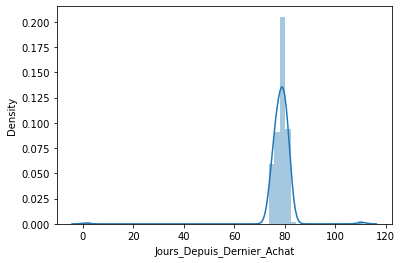

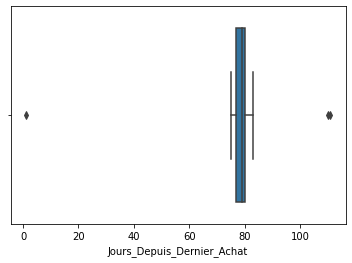

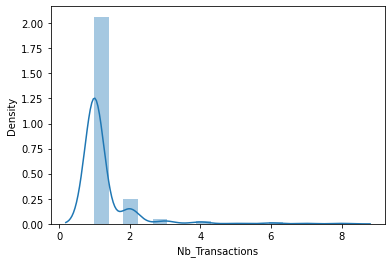

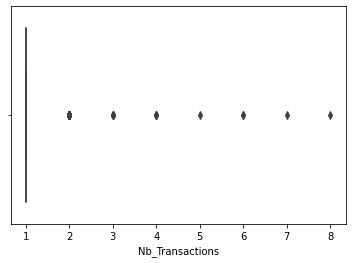

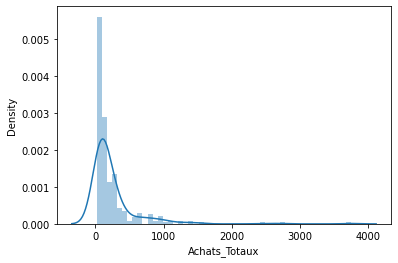

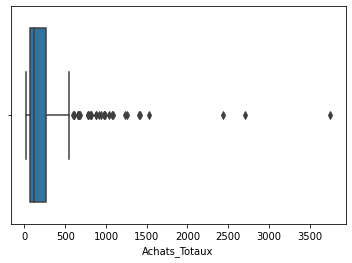

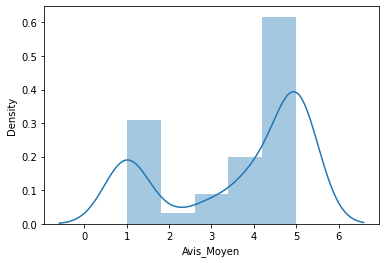

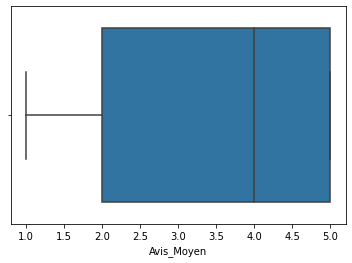

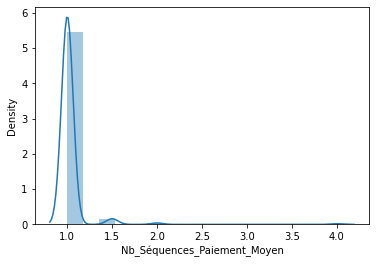

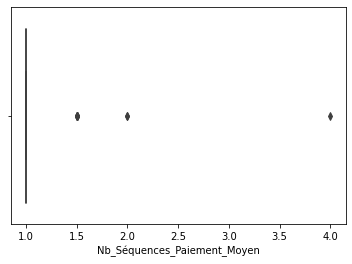

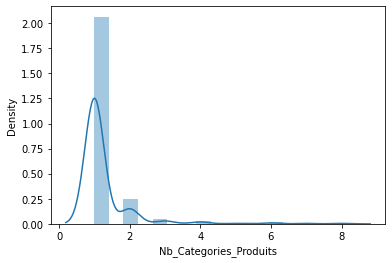

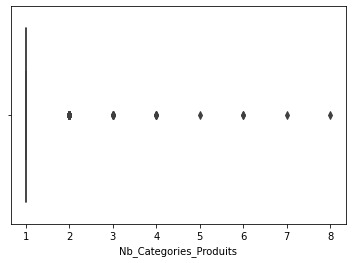

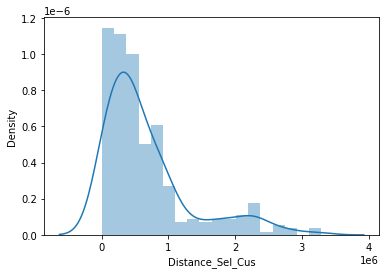

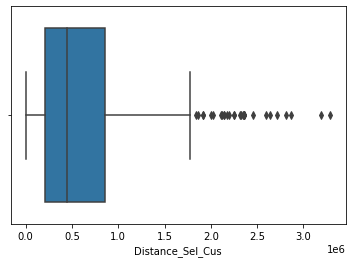

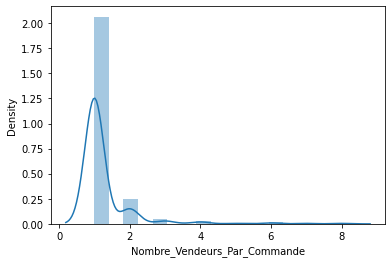

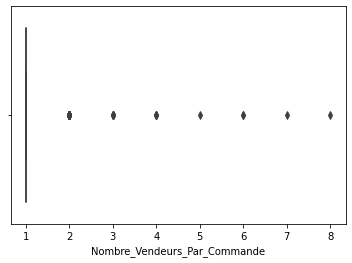

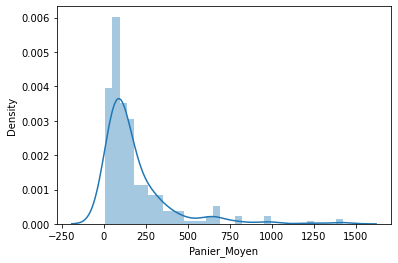

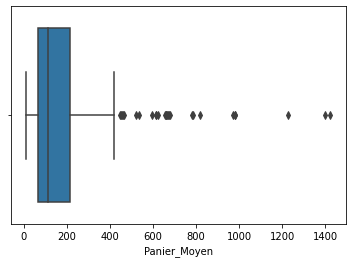

In [ ]:
# Apply fonction for each quantitative variable of df1_final
for col_name_quant in var_quantitatives_analyse:
    print(col_name_quant)
    an_univariees_quant(df1_final, col_name_quant)

Jours_Depuis_Dernier_Achat
moy:
 48.418727424284526
med:
 46.0
mod:
 0    5
dtype: int64
var:
 868.6585100782466
ect:
 29.473013250739168
skw:
 0.19833814730739097
kur:
 -1.0178786107936744
Nb_Transactions
moy:
 1.2381217004723535
med:
 1.0
mod:
 0    1
dtype: int64
var:
 0.8832813844666707
ect:
 0.9398305083719461
skw:
 15.088717740636598
kur:
 408.21892593054974


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

Achats_Totaux
moy:
 213.27237010280746
med:
 112.475
mod:
 0    45.86
dtype: float64
var:
 194491.00867935034
ect:
 441.01134756301946
skw:
 12.746526108249773
kur:
 268.64313134828285
Avis_Moyen
moy:
 4.069434300533217
med:
 5.0
mod:
 0    5.0
dtype: float64
var:
 1.7857145717183938
ect:
 1.336306316575056
skw:
 -1.32453775720615
kur:
 0.44261012034450653


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/li

Nb_Séquences_Paiement_Moyen
moy:
 1.030553791397081
med:
 1.0
mod:
 0    1.0
dtype: float64
var:
 0.07476037157730976
ect:
 0.27342342909361256
skw:
 26.200455096623315
kur:
 1067.5423988269142
Nb_Categories_Produits
moy:
 1.2381217004723535
med:
 1.0
mod:
 0    1
dtype: int64
var:
 0.8832813844666707
ect:
 0.9398305083719461
skw:
 15.088717740636598
kur:
 408.21892593054974


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/li

Distance_Sel_Cus
moy:
 656553.5138513857
med:
 469944.9077081599
mod:
 0    10505.629444
dtype: float64
var:
 389910809291.4014
ect:
 624428.3860391049
skw:
 1.5974575670964402
kur:
 2.1625538303158627
Nombre_Vendeurs_Par_Commande
moy:
 1.2381217004723535
med:
 1.0
mod:
 0    1
dtype: int64
var:
 0.8832813844666707
ect:
 0.9398305083719461
skw:
 15.088717740636598
kur:
 408.21892593054974


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Panier_Moyen
moy:
 165.3255769826397
med:
 102.37
mod:
 0    45.86
dtype: float64
var:
 64878.96137179187
ect:
 254.71348879042876
skw:
 8.641401824208936
kur:
 131.81108515424714


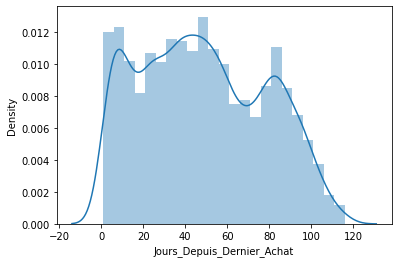

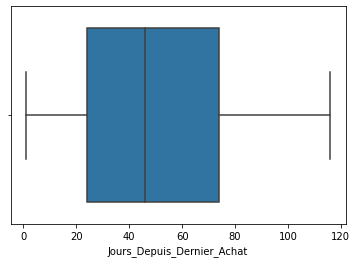

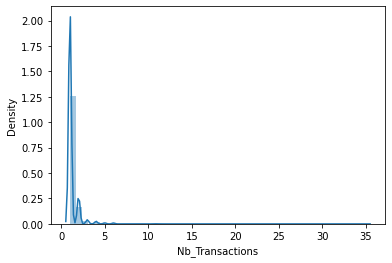

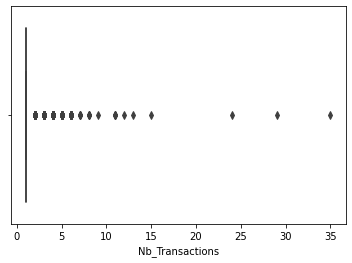

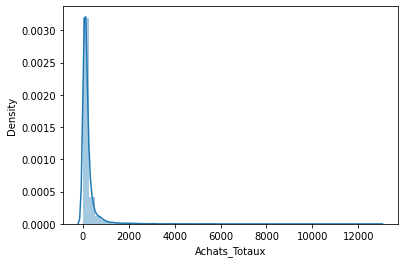

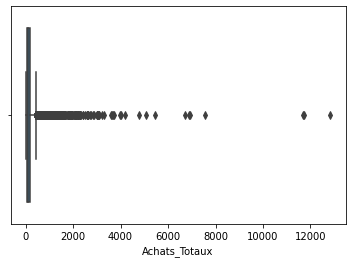

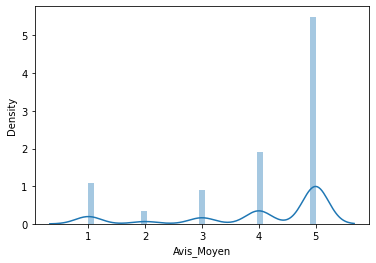

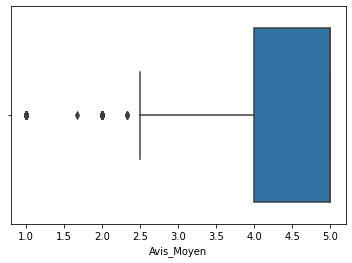

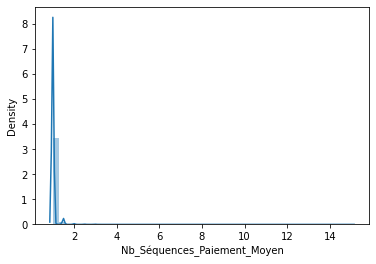

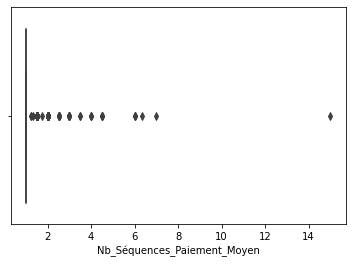

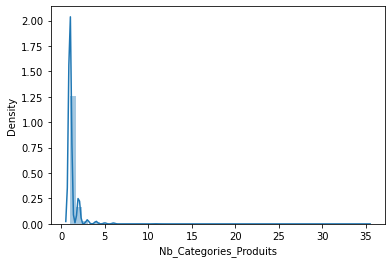

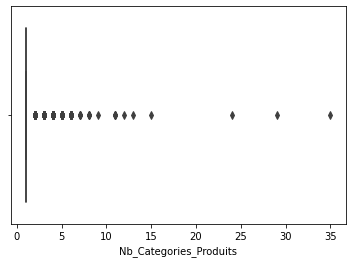

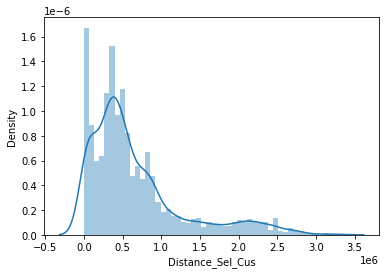

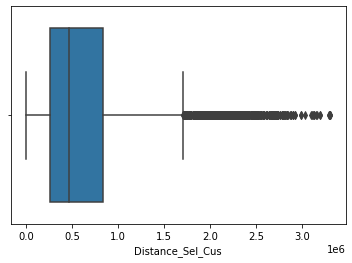

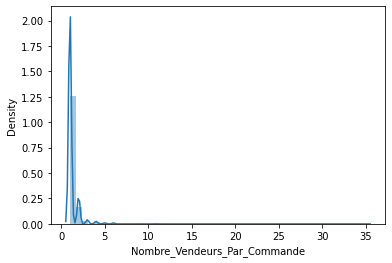

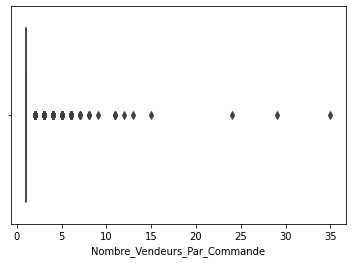

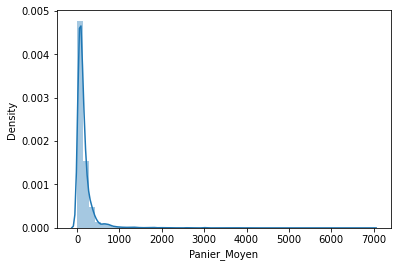

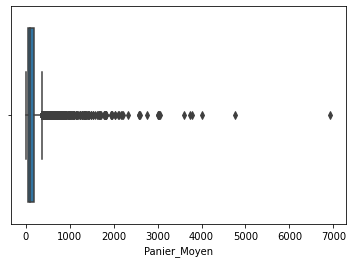

In [ ]:
# Apply fonction for each quantitative variable of df2_final
for col_name_quant in var_quantitatives_analyse:
    print(col_name_quant)
    an_univariees_quant(df2_final, col_name_quant)

Jours_Depuis_Dernier_Achat
moy:
 59.181143847487
med:
 56.0
mod:
 0    17
1    45
dtype: int64
var:
 1289.8947432323255
ect:
 35.915104666871365
skw:
 0.11869291933573828
kur:
 -1.2314027051942196


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Nb_Transactions
moy:
 1.2437435008665512
med:
 1.0
mod:
 0    1
dtype: int64
var:
 1.082079573723068
ect:
 1.0402305387379607
skw:
 29.839072728559977
kur:
 1826.3033933036763


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Achats_Totaux
moy:
 200.94593136914895
med:
 108.1
mod:
 0    77.57
dtype: float64
var:
 280642.41888978635
ect:
 529.7569432199887
skw:
 46.27917903664563
kur:
 3668.3314819845227


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Avis_Moyen
moy:
 4.191495584715689
med:
 5.0
mod:
 0    5.0
dtype: float64
var:
 1.5513006613193248
ect:
 1.245512208418418
skw:
 -1.5445649339927494
kur:
 1.229920958118354


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Nb_Séquences_Paiement_Moyen
moy:
 1.0297079475117605
med:
 1.0
mod:
 0    1.0
dtype: float64
var:
 0.06480118786346117
ect:
 0.254560774400655
skw:
 23.19794384250131
kur:
 787.1137885240079


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Nb_Categories_Produits
moy:
 1.2437435008665512
med:
 1.0
mod:
 0    1
dtype: int64
var:
 1.082079573723068
ect:
 1.0402305387379607
skw:
 29.839072728559977
kur:
 1826.3033933036763


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

Distance_Sel_Cus
moy:
 619933.5758611421
med:
 449586.5254807232
mod:
 0    292196.265681
dtype: float64
var:
 354836234953.346
ect:
 595681.3199634063
skw:
 1.6254871578697774
kur:
 2.395576200889304


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Nombre_Vendeurs_Par_Commande
moy:
 1.2437435008665512
med:
 1.0
mod:
 0    1
dtype: int64
var:
 1.082079573723068
ect:
 1.0402305387379607
skw:
 29.839072728559977
kur:
 1826.3033933036763


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Panier_Moyen
moy:
 152.8577706832209
med:
 100.95
mod:
 0    77.57
dtype: float64
var:
 41535.11379134033
ect:
 203.80165306331628
skw:
 7.489142017815839
kur:
 119.35761402730684


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


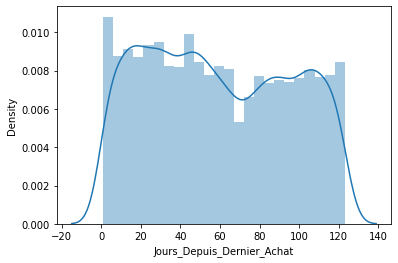

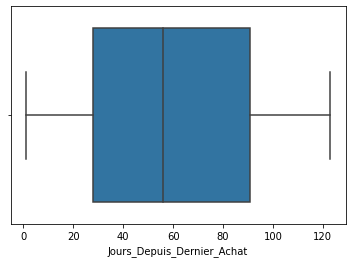

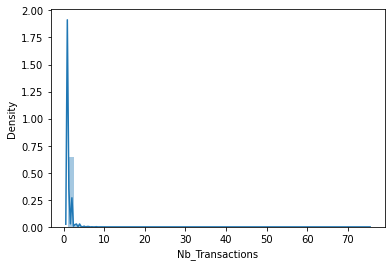

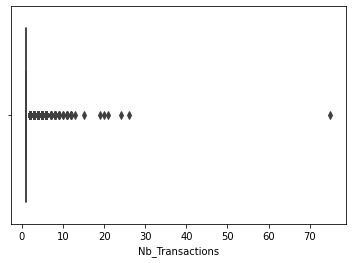

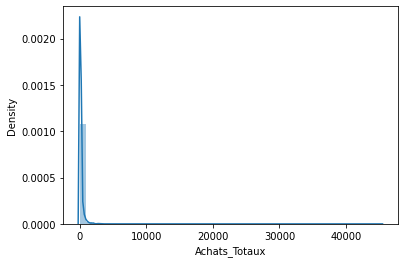

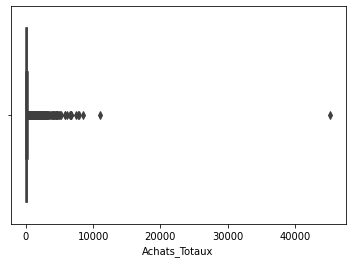

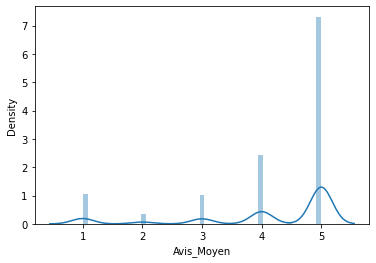

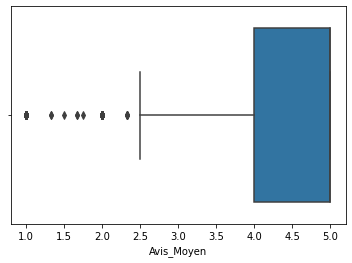

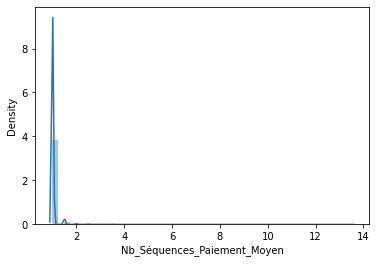

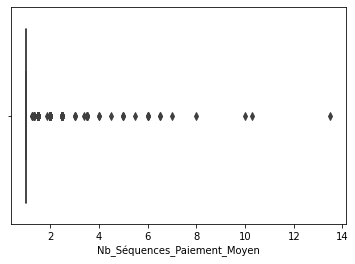

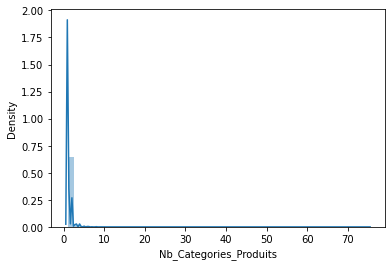

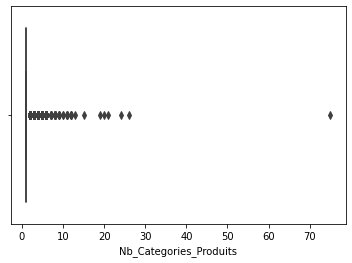

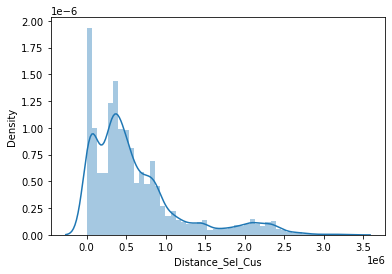

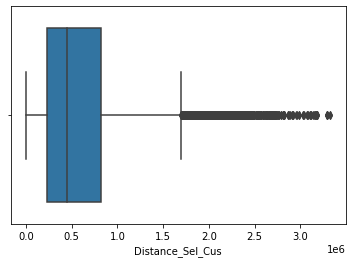

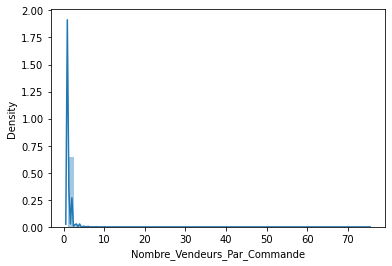

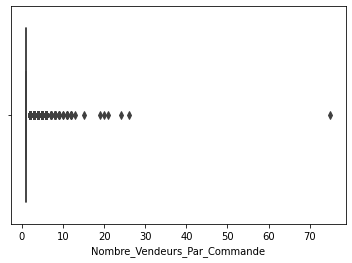

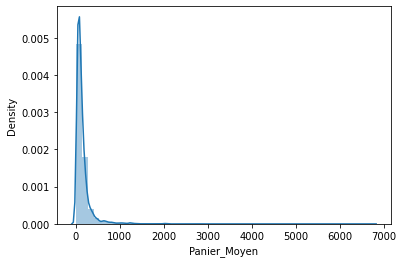

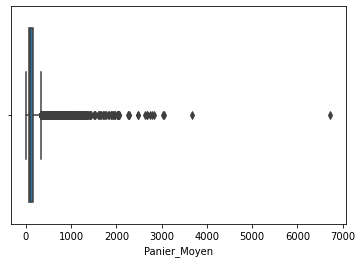

In [ ]:
# Apply fonction for each quantitative variable of df3_final
for col_name_quant in var_quantitatives_analyse:
    print(col_name_quant)
    an_univariees_quant(df3_final, col_name_quant)

Jours_Depuis_Dernier_Achat
moy:
 56.199036075586946
med:
 48.0
mod:
 0    38
dtype: int64
var:
 1092.5727629570874
ect:
 33.05408844541152
skw:
 0.37474300643498715
kur:
 -1.031158762593174


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

Nb_Transactions
moy:
 1.233632372590189
med:
 1.0
mod:
 0    1
dtype: int64
var:
 0.6675002817238479
ect:
 0.8170069043305863
skw:
 11.710830025354142
kur:
 318.90140100733265


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Achats_Totaux
moy:
 219.14803111280284
med:
 112.13499999999999
mod:
 0    77.57
dtype: float64
var:
 878223.2010691878
ect:
 937.1356364311347
skw:
 80.97701557874377
kur:
 8919.528894922625


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Avis_Moyen
moy:
 4.048205139566803
med:
 5.0
mod:
 0    5.0
dtype: float64
var:
 1.8529965902105991
ect:
 1.361248173629849
skw:
 -1.3013646979156517
kur:
 0.33246223485994797


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Nb_Séquences_Paiement_Moyen
moy:
 1.0230439174142647
med:
 1.0
mod:
 0    1.0
dtype: float64
var:
 0.03437763900678601
ect:
 0.18541207891285294
skw:
 22.7079321732376
kur:
 901.8451118768276


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Nb_Categories_Produits
moy:
 1.233632372590189
med:
 1.0
mod:
 0    1
dtype: int64
var:
 0.6675002817238479
ect:
 0.8170069043305863
skw:
 11.710830025354142
kur:
 318.90140100733265


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Distance_Sel_Cus
moy:
 618977.8835248192
med:
 457639.0839081042
mod:
 0    681728.828507
dtype: float64
var:
 346897408050.50903
ect:
 588979.9725376993
skw:
 1.5898016267411907
kur:
 2.26696258378485


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Nombre_Vendeurs_Par_Commande
moy:
 1.233632372590189
med:
 1.0
mod:
 0    1
dtype: int64
var:
 0.6675002817238479
ect:
 0.8170069043305863
skw:
 11.710830025354142
kur:
 318.90140100733265


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Panier_Moyen
moy:
 158.68466933765984
med:
 103.805
mod:
 0    77.57
dtype: float64
var:
 49280.66039005488
ect:
 221.9924782285537
skw:
 15.320233600801664
kur:
 703.2570371275804


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


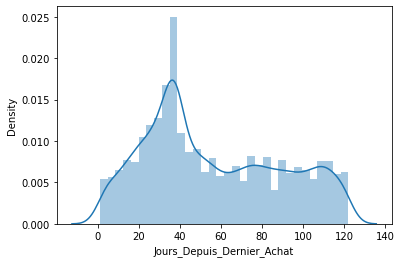

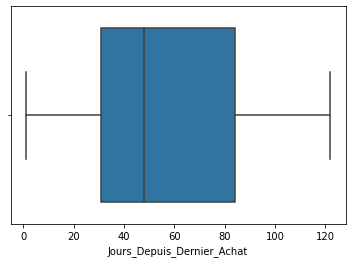

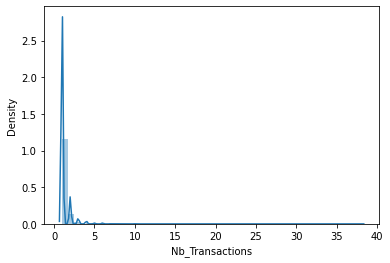

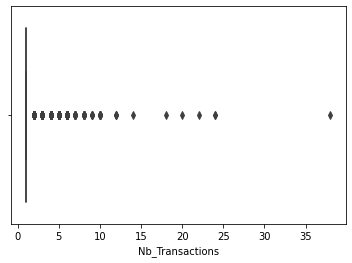

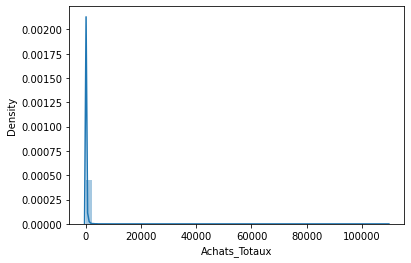

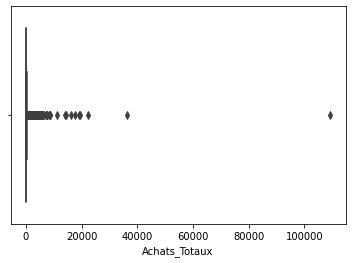

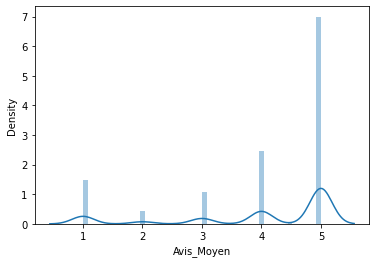

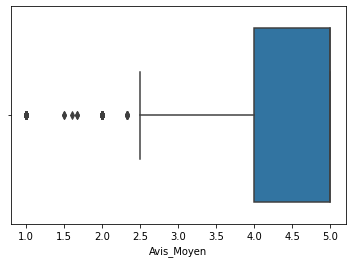

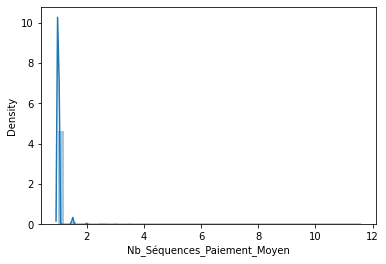

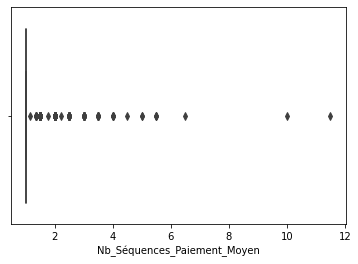

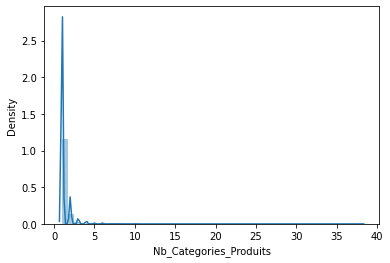

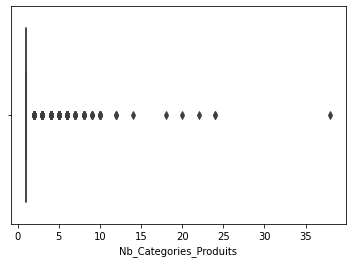

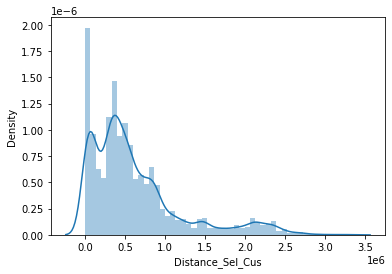

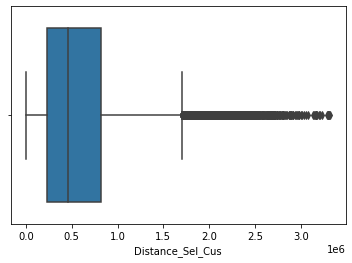

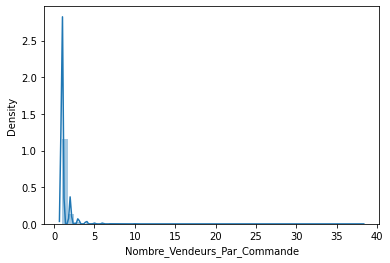

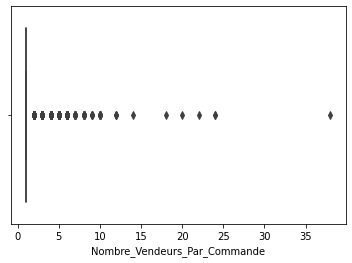

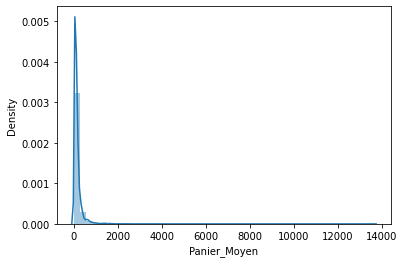

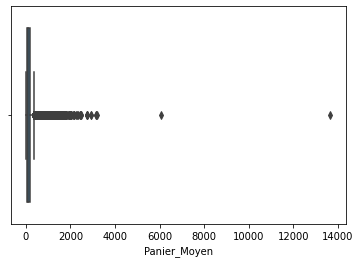

In [ ]:
# Apply fonction for each quantitative variable of df4_final
for col_name_quant in var_quantitatives_analyse:
    print(col_name_quant)
    an_univariees_quant(df4_final, col_name_quant)

Jours_Depuis_Dernier_Achat
moy:
 60.176091731506645
med:
 61.0
mod:
 0    62
dtype: int64
var:
 1183.1429613979567
ect:
 34.39684522449634
skw:
 -0.0019161914521378552
kur:
 -1.1909218226632496


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

Nb_Transactions
moy:
 1.219947135251852
med:
 1.0
mod:
 0    1
dtype: int64
var:
 0.5611314666217172
ect:
 0.7490870888099175
skw:
 8.021833919390495
kur:
 121.69183872267247


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Achats_Totaux
moy:
 208.938886861989
med:
 111.78
mod:
 0    67.5
dtype: float64
var:
 308757.4843676228
ect:
 555.6595039838901
skw:
 34.020068728315074
kur:
 2032.0159889150418


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Avis_Moyen
moy:
 3.9398935113837776
med:
 5.0
mod:
 0    5.0
dtype: float64
var:
 2.067880006596349
ect:
 1.438012519624342
skw:
 -1.1327283535375796
kur:
 -0.18554935173683873


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Nb_Séquences_Paiement_Moyen
moy:
 1.021021271767707
med:
 1.0
mod:
 0    1.0
dtype: float64
var:
 0.025282970790920036
ect:
 0.15900619733494678
skw:
 15.959487443961365
kur:
 425.32330043017555


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Nb_Categories_Produits
moy:
 1.219947135251852
med:
 1.0
mod:
 0    1
dtype: int64
var:
 0.5611314666217172
ect:
 0.7490870888099175
skw:
 8.021833919390495
kur:
 121.69183872267247


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Distance_Sel_Cus
moy:
 597708.8846661531
med:
 433582.10938283725
mod:
 0    0.0
dtype: float64
var:
 344621466437.00183
ect:
 587044.6886200418
skw:
 1.656476680315398
kur:
 2.475948532744702


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Nombre_Vendeurs_Par_Commande
moy:
 1.219947135251852
med:
 1.0
mod:
 0    1
dtype: int64
var:
 0.5611314666217172
ect:
 0.7490870888099175
skw:
 8.021833919390495
kur:
 121.69183872267247


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Panier_Moyen
moy:
 155.554056093744
med:
 103.51
mod:
 0    67.5
dtype: float64
var:
 38568.4433215475
ect:
 196.38850099114129
skw:
 5.920135179396594
kur:
 58.92338663677365


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


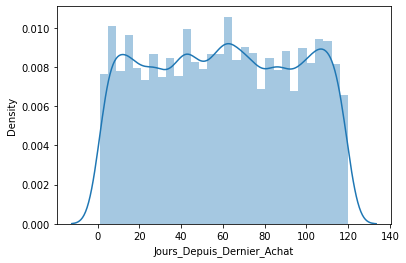

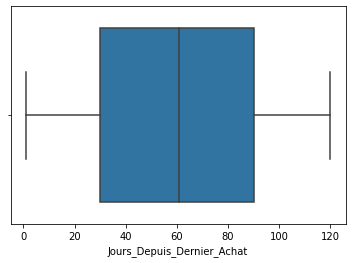

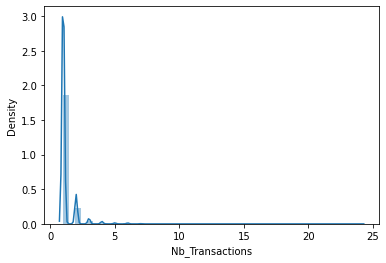

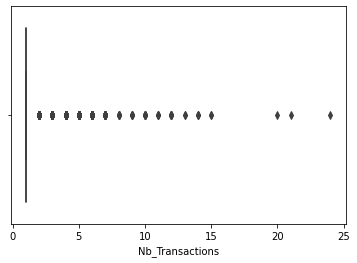

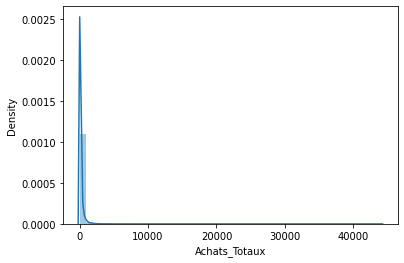

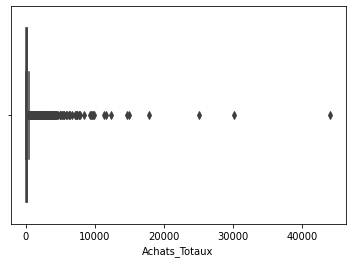

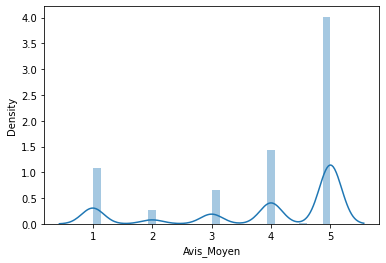

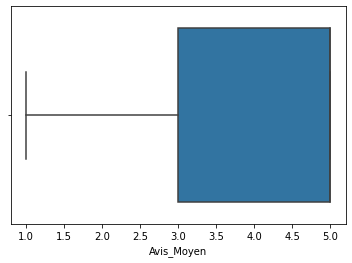

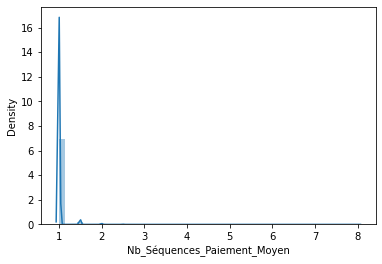

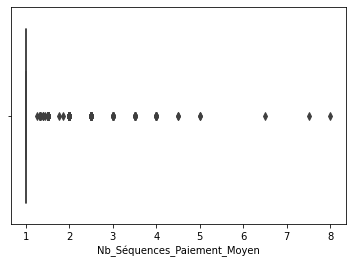

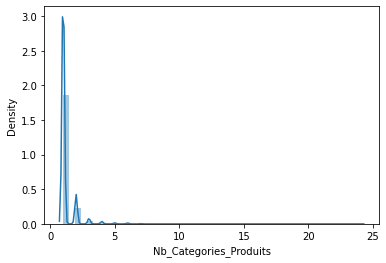

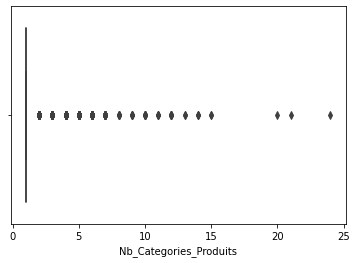

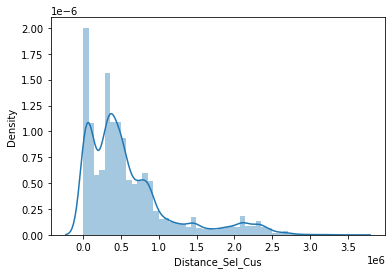

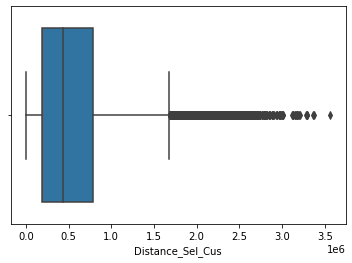

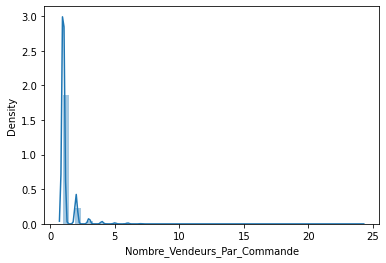

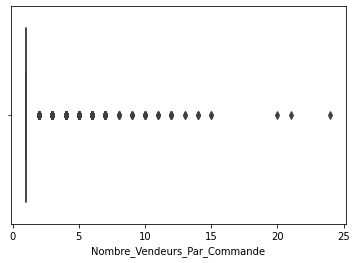

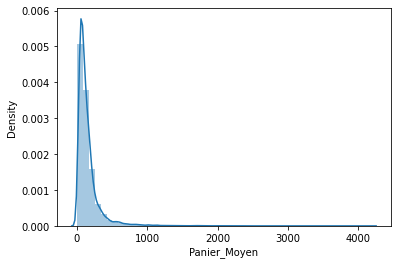

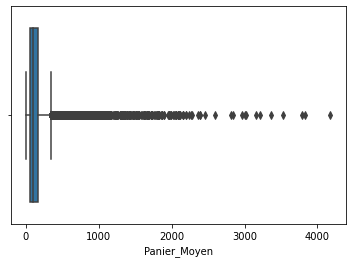

In [ ]:
# Apply fonction for each quantitative variable of df5_final
for col_name_quant in var_quantitatives_analyse:
    print(col_name_quant)
    an_univariees_quant(df5_final, col_name_quant)

Jours_Depuis_Dernier_Achat
moy:
 61.408027687166836
med:
 61.0
mod:
 0    106
dtype: int64
var:
 1250.8399976136902
ect:
 35.367216424447236
skw:
 0.10656748404576377
kur:
 -1.3119273210040407


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

Nb_Transactions
moy:
 1.1991009626859734
med:
 1.0
mod:
 0    1
dtype: int64
var:
 0.5056289156555998
ect:
 0.7110758860034558
skw:
 9.411200654678797
kur:
 180.1323573230646


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Achats_Totaux
moy:
 212.7435456281353
med:
 113.56
mod:
 0    99.9
dtype: float64
var:
 277702.1696522345
ect:
 526.9745436472567
skw:
 22.97220580730993
kur:
 920.8788418827147


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Avis_Moyen
moy:
 4.2442305457998835
med:
 5.0
mod:
 0    5.0
dtype: float64
var:
 1.5142664508311159
ect:
 1.2305553424495446
skw:
 -1.6580811562274291
kur:
 1.5868393008084762


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Nb_Séquences_Paiement_Moyen
moy:
 1.0186457421698887
med:
 1.0
mod:
 0    1.0
dtype: float64
var:
 0.02096611755970545
ect:
 0.1447968147429544
skw:
 16.003271497637858
kur:
 436.36378790704686


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Nb_Categories_Produits
moy:
 1.1991009626859734
med:
 1.0
mod:
 0    1
dtype: int64
var:
 0.5056289156555998
ect:
 0.7110758860034558
skw:
 9.411200654678797
kur:
 180.1323573230646


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Distance_Sel_Cus
moy:
 563916.2769753131
med:
 394368.96785195684
mod:
 0    0.0
dtype: float64
var:
 342059908300.43964
ect:
 584858.8789617883
skw:
 1.718329323076076
kur:
 2.777012761699088


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Nombre_Vendeurs_Par_Commande
moy:
 1.1991009626859734
med:
 1.0
mod:
 0    1
dtype: int64
var:
 0.5056289156555998
ect:
 0.7110758860034558
skw:
 9.411200654678797
kur:
 180.1323573230646


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Panier_Moyen
moy:
 162.21539210494456
med:
 106.53
mod:
 0    99.9
dtype: float64
var:
 53355.80310851775
ect:
 230.98875104324398
skw:
 8.198031299928333
kur:
 128.54512736933256


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


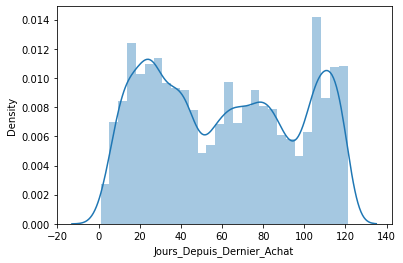

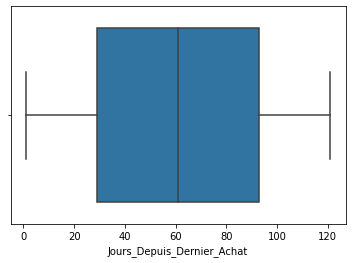

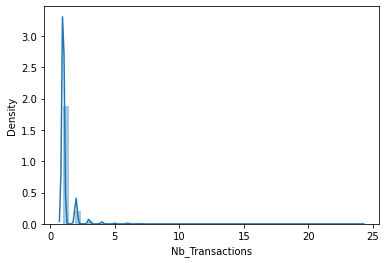

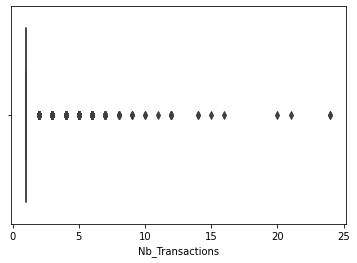

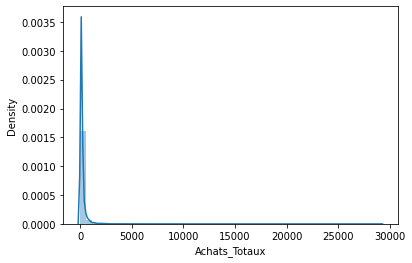

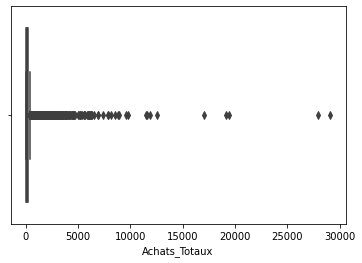

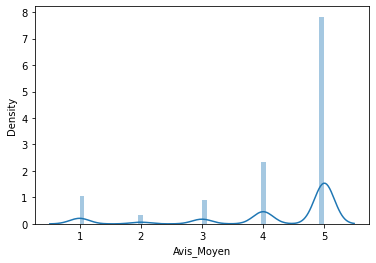

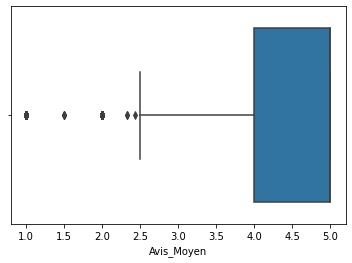

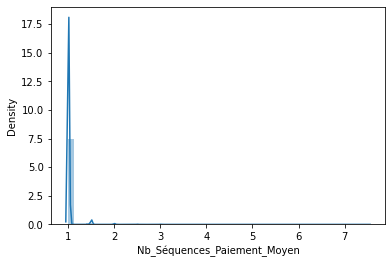

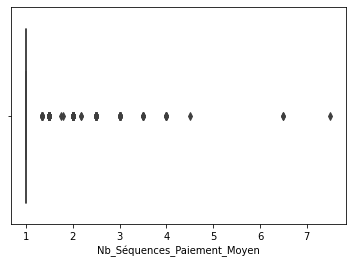

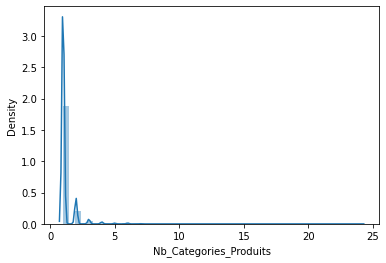

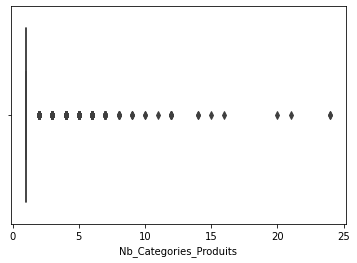

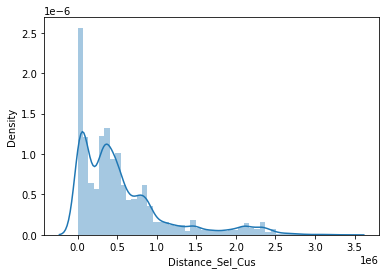

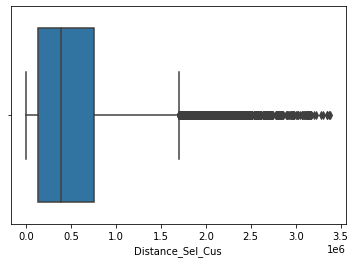

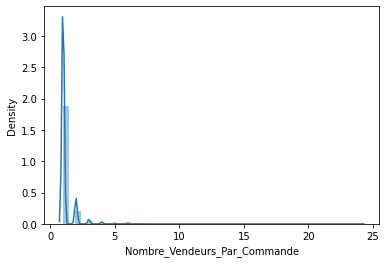

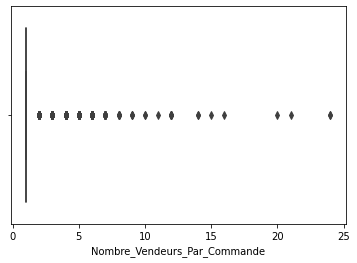

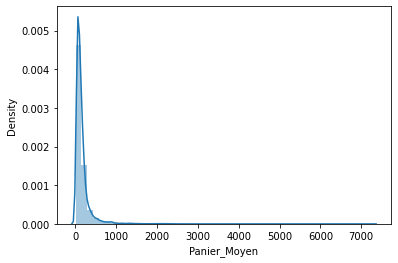

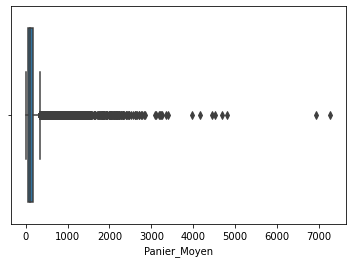

In [ ]:
# Apply fonction for each quantitative variable of df6_final
for col_name_quant in var_quantitatives_analyse:
    print(col_name_quant)
    an_univariees_quant(df6_final, col_name_quant)

## Analyses bivariées

### Recherches de corrélation par régression linéaire 

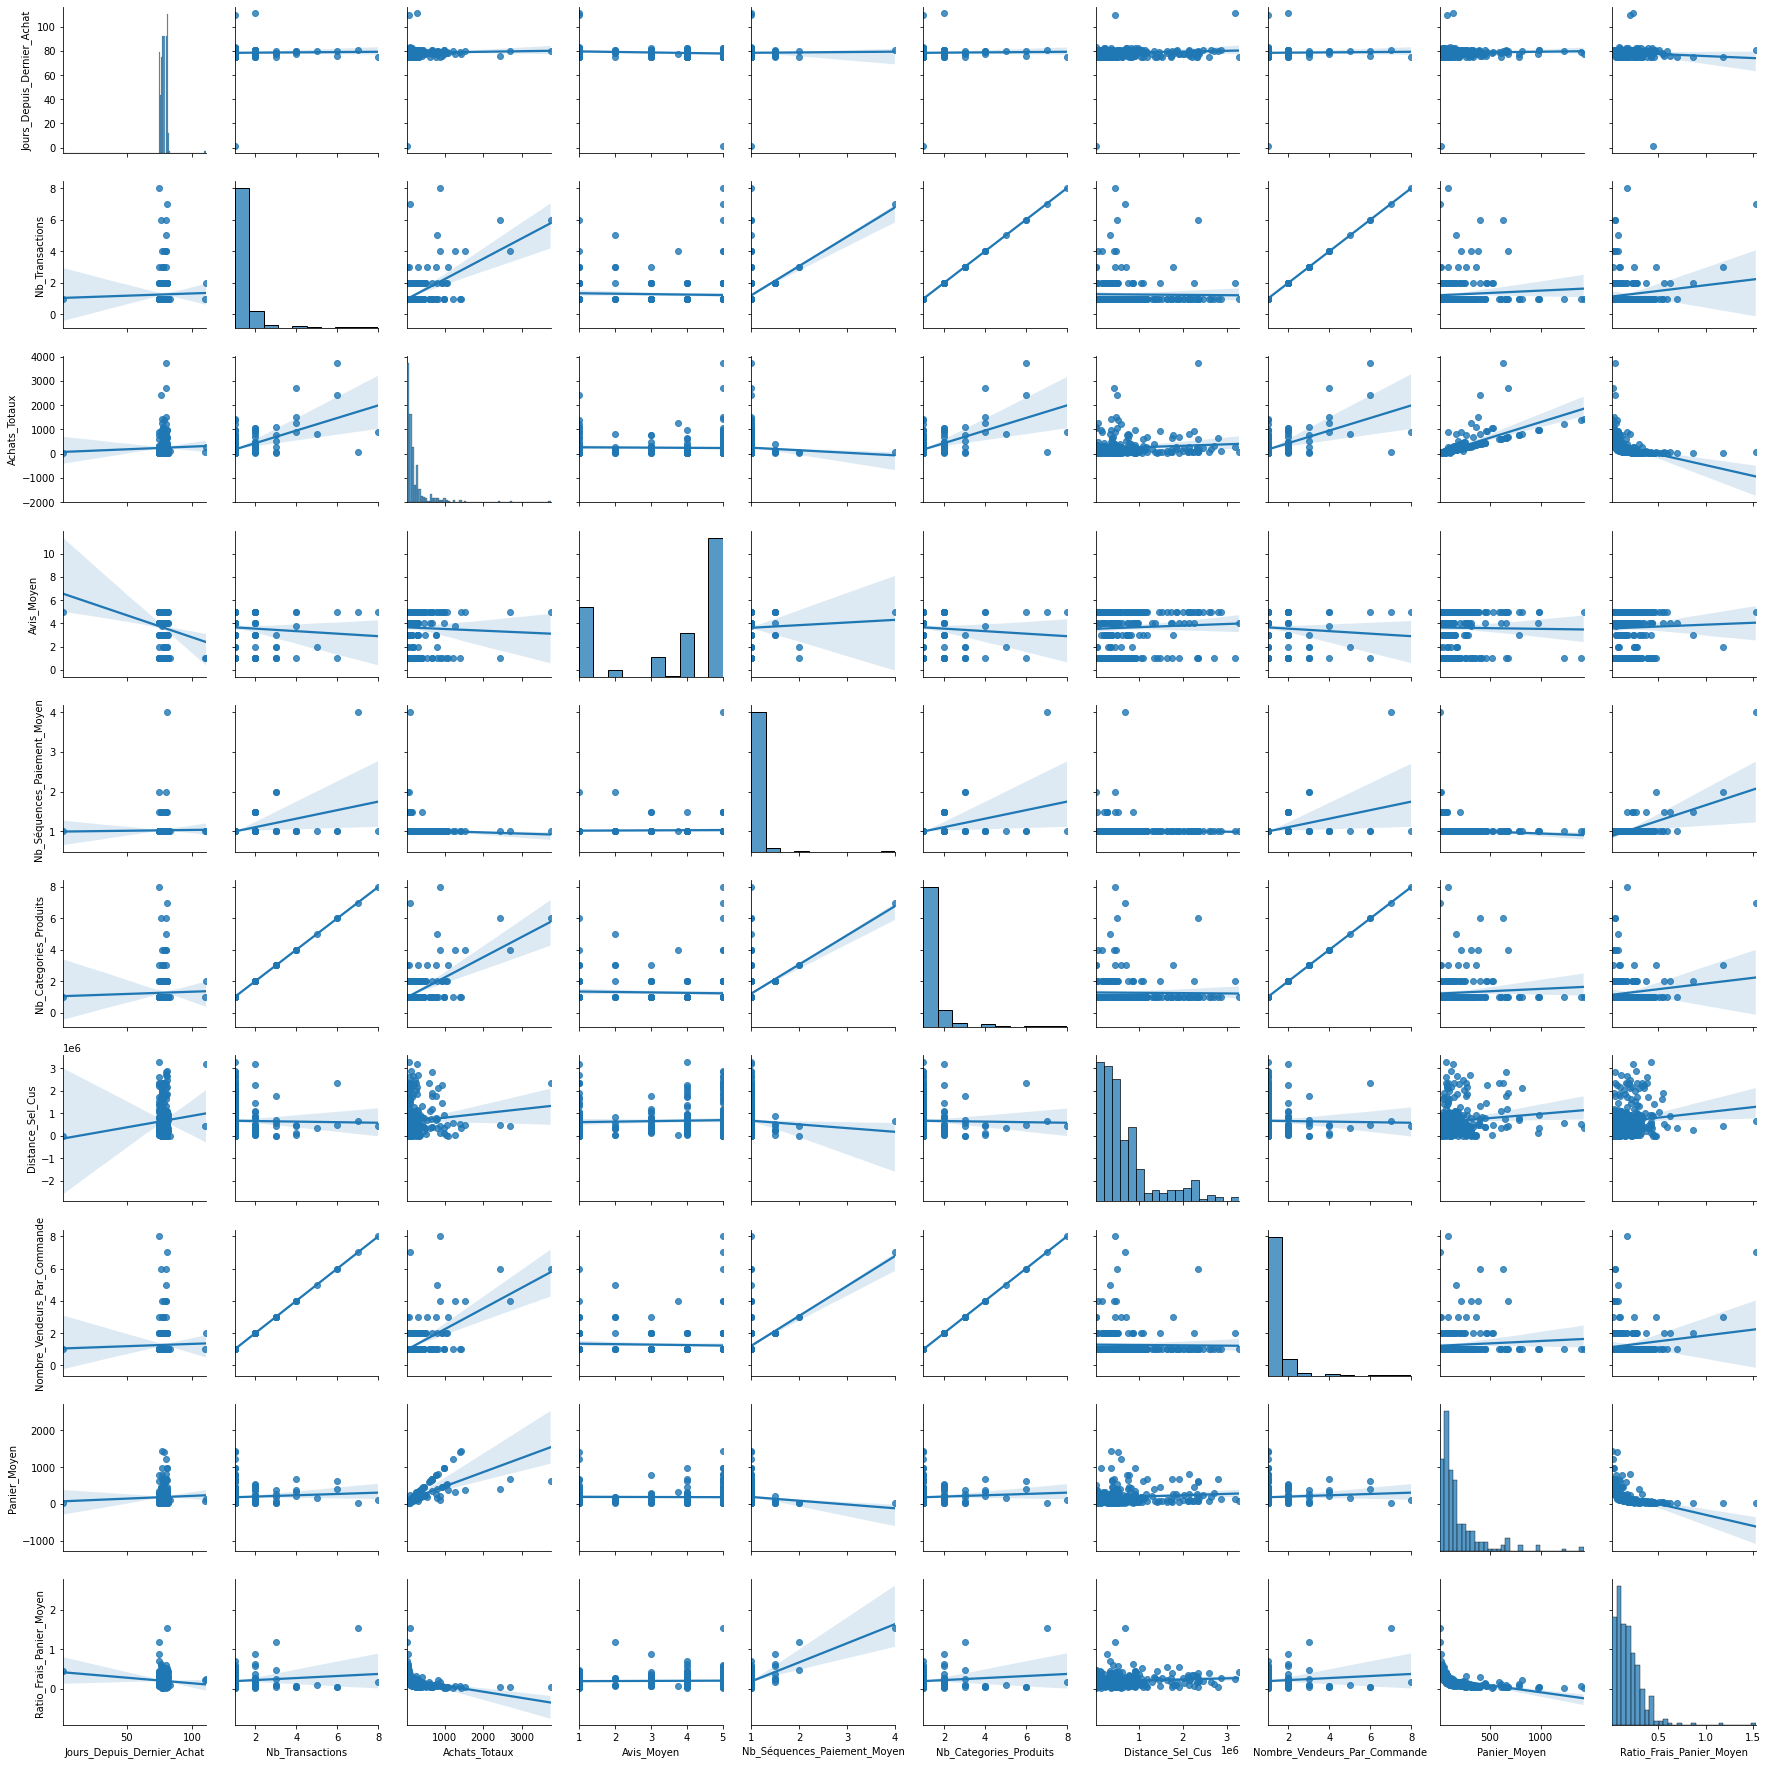

In [ ]:
sns.pairplot(df1_final, kind='reg')

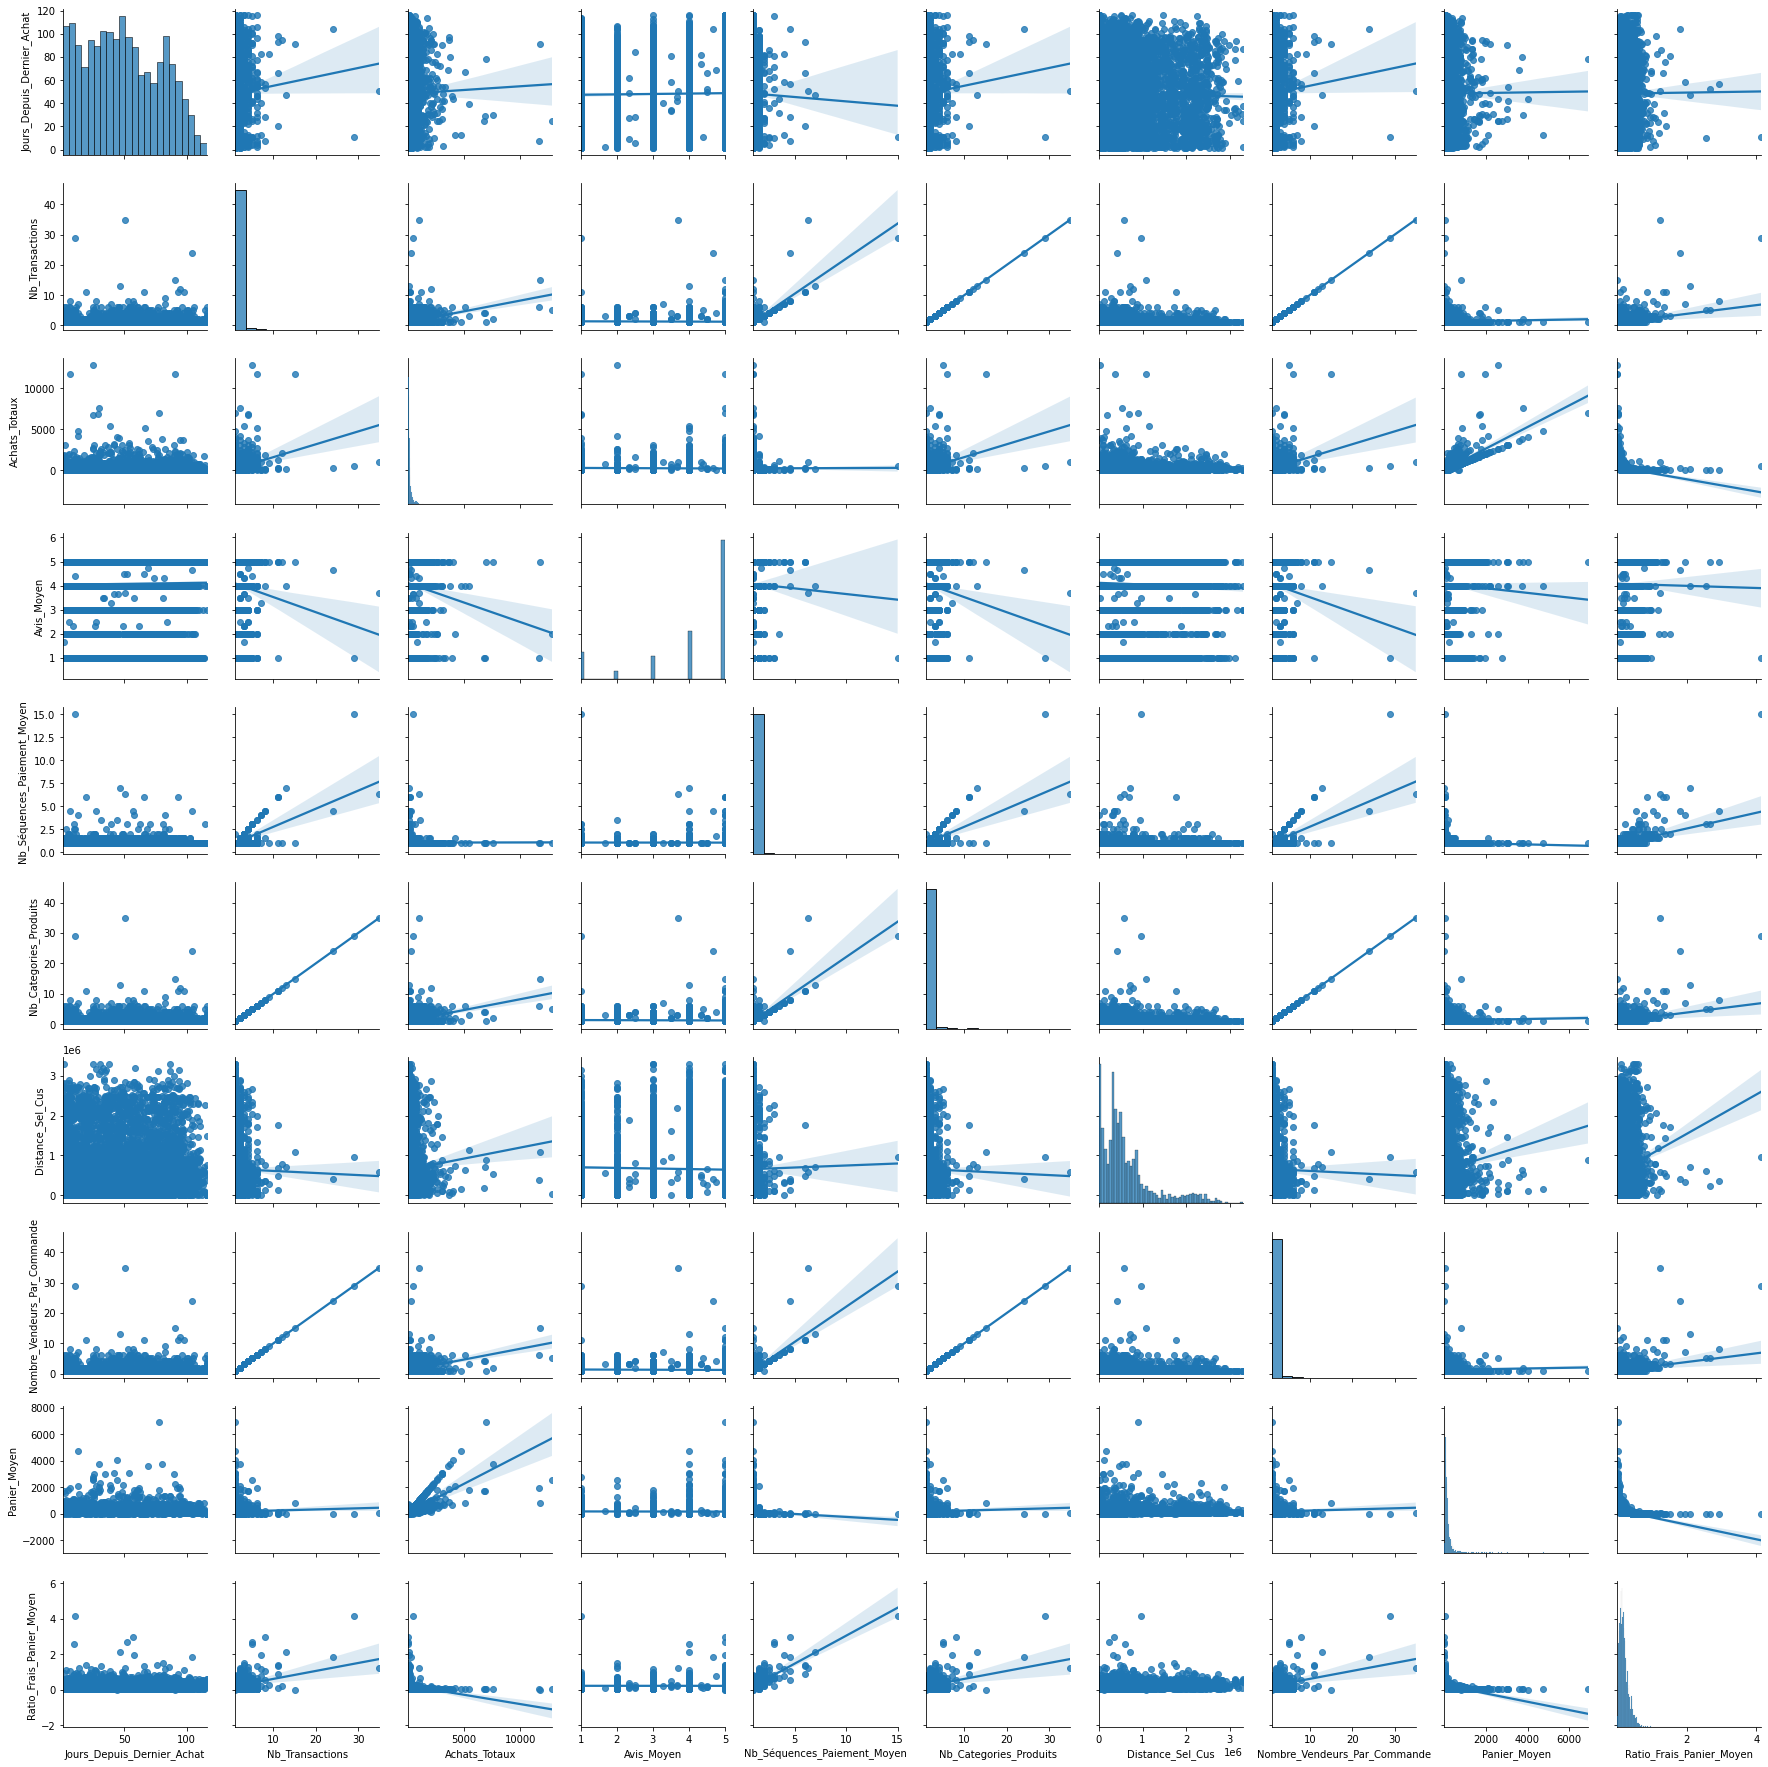

In [ ]:
sns.pairplot(df2_final, kind='reg')

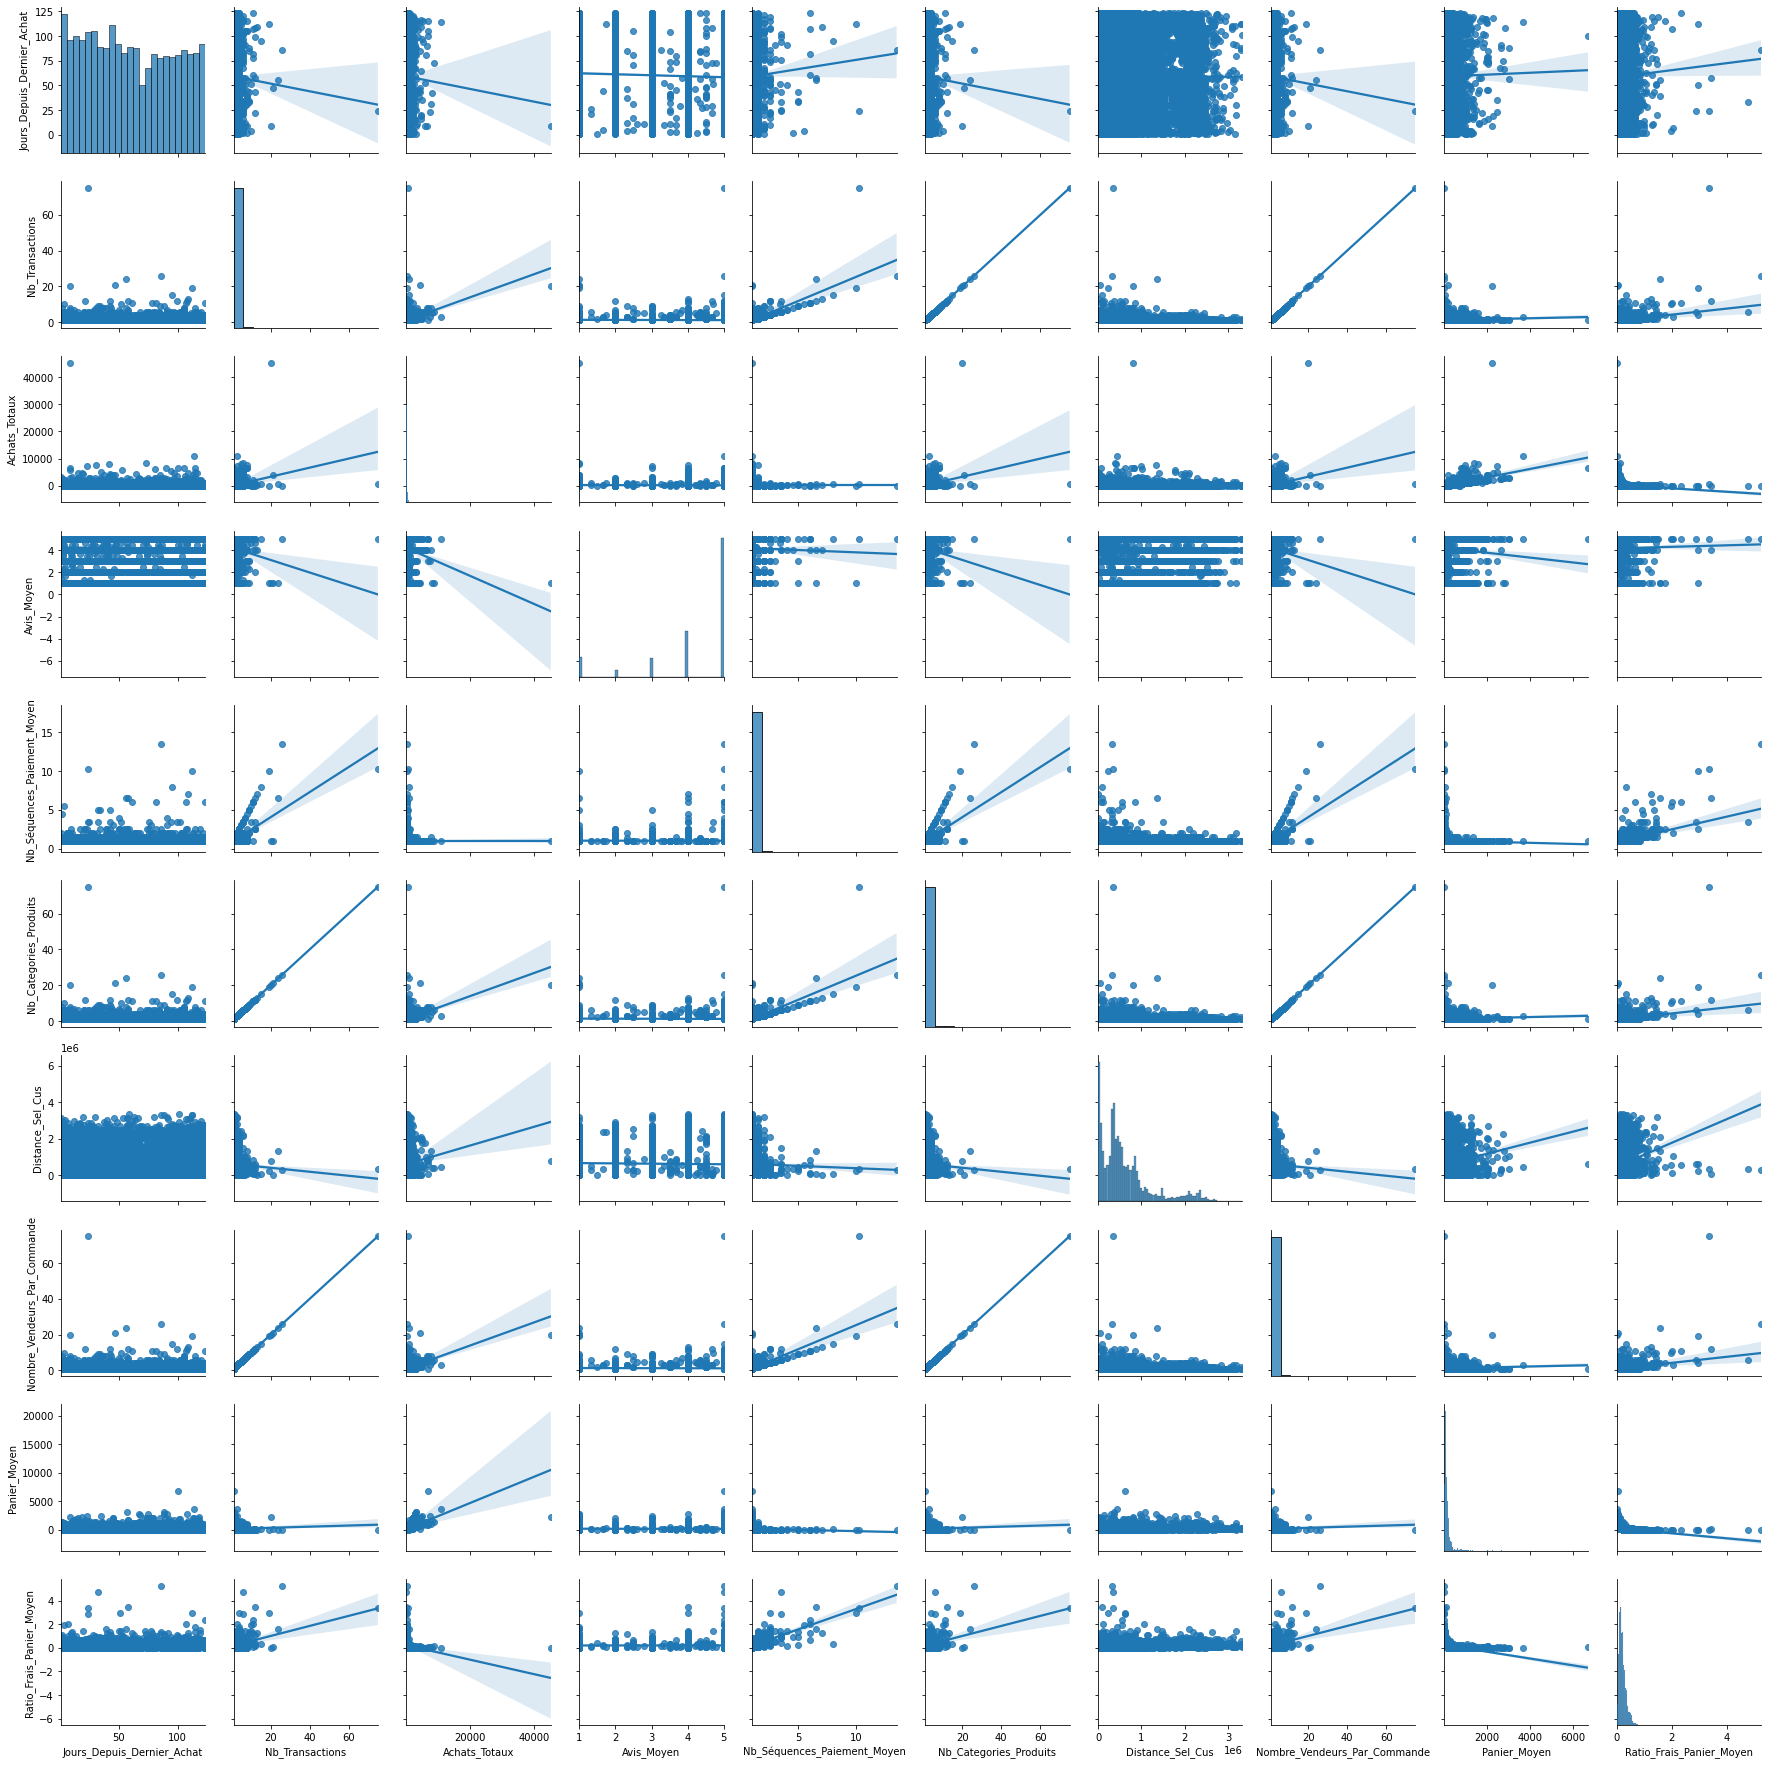

In [ ]:
sns.pairplot(df3_final, kind='reg')

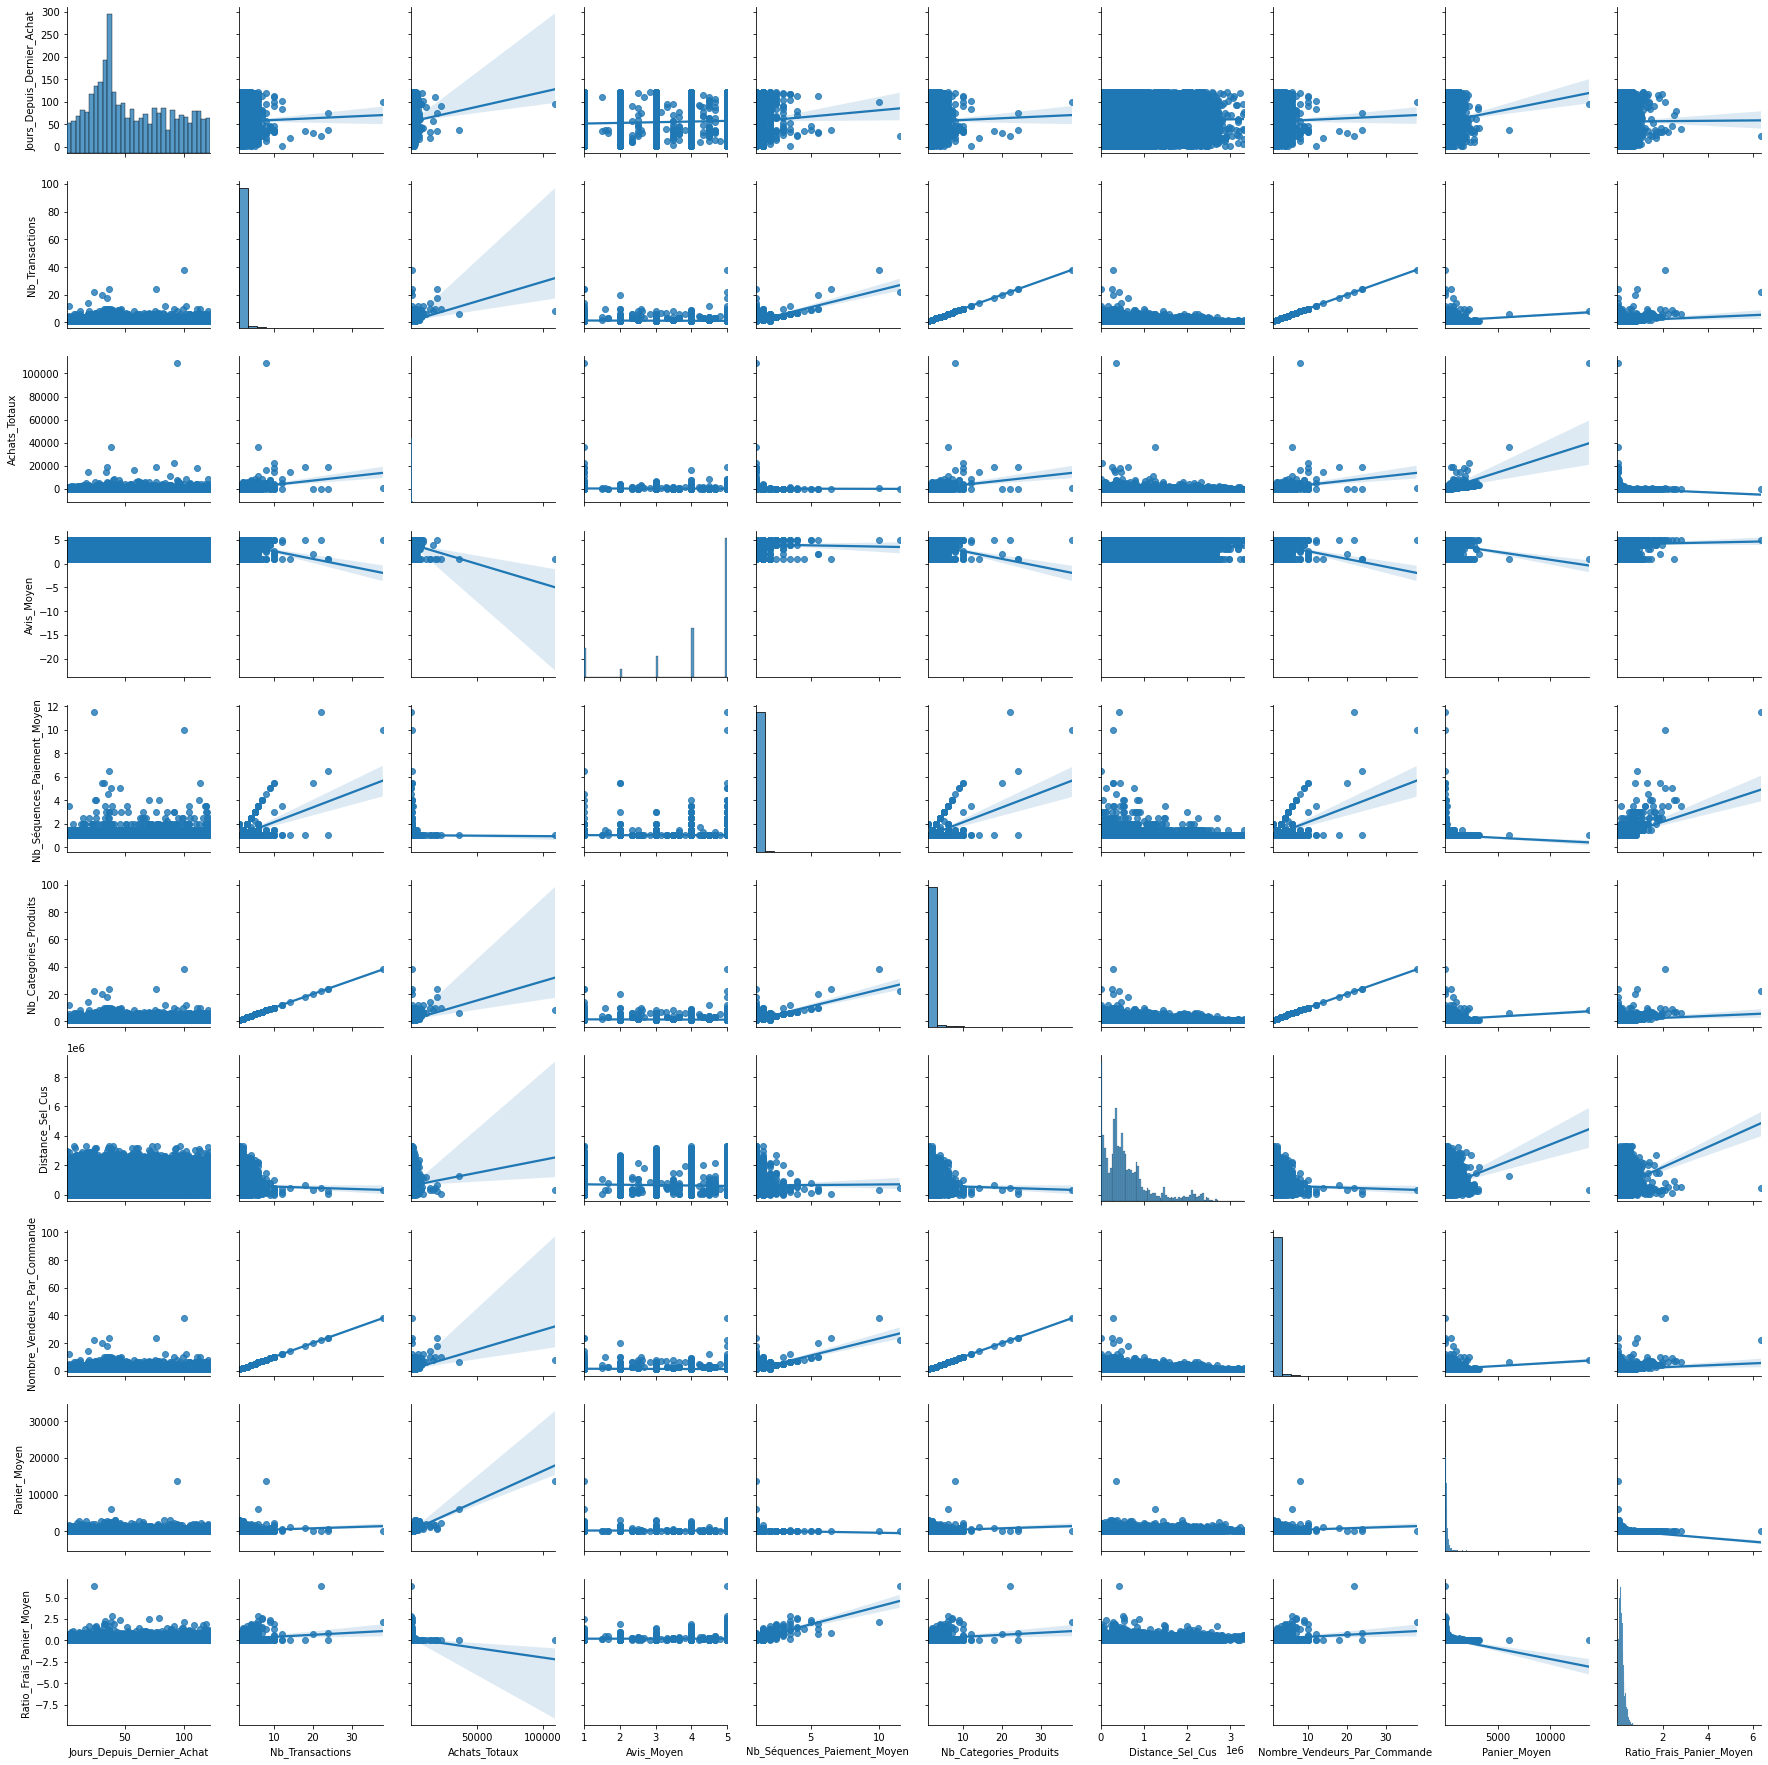

In [ ]:
sns.pairplot(df4_final, kind='reg')

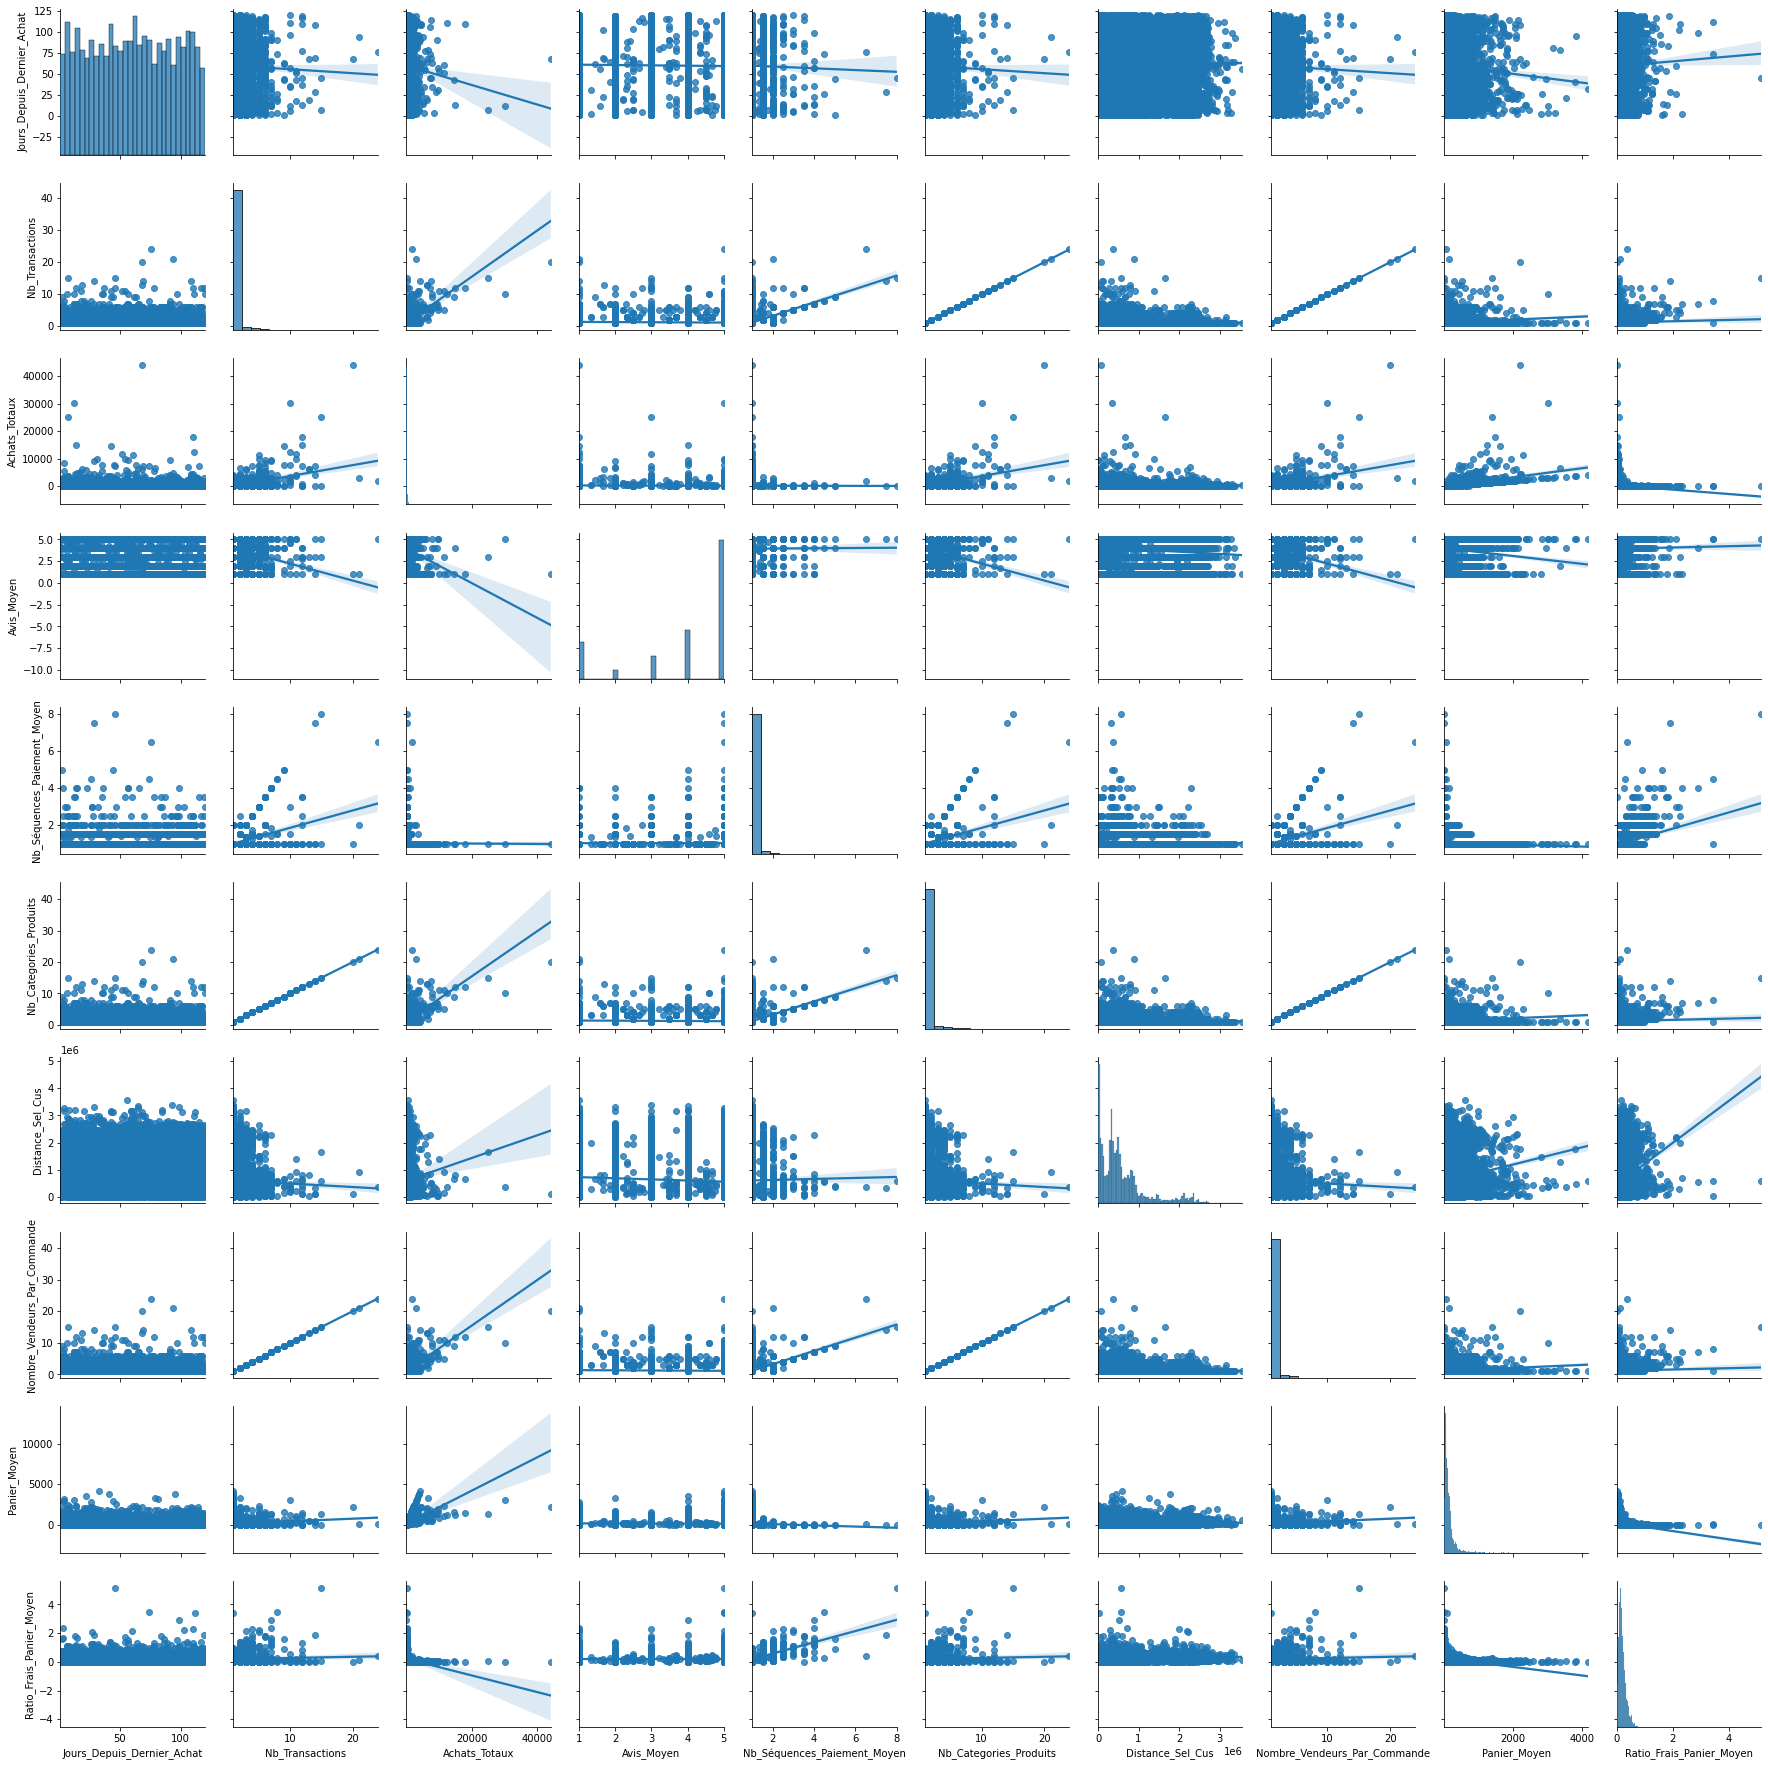

In [ ]:
sns.pairplot(df5_final, kind='reg')

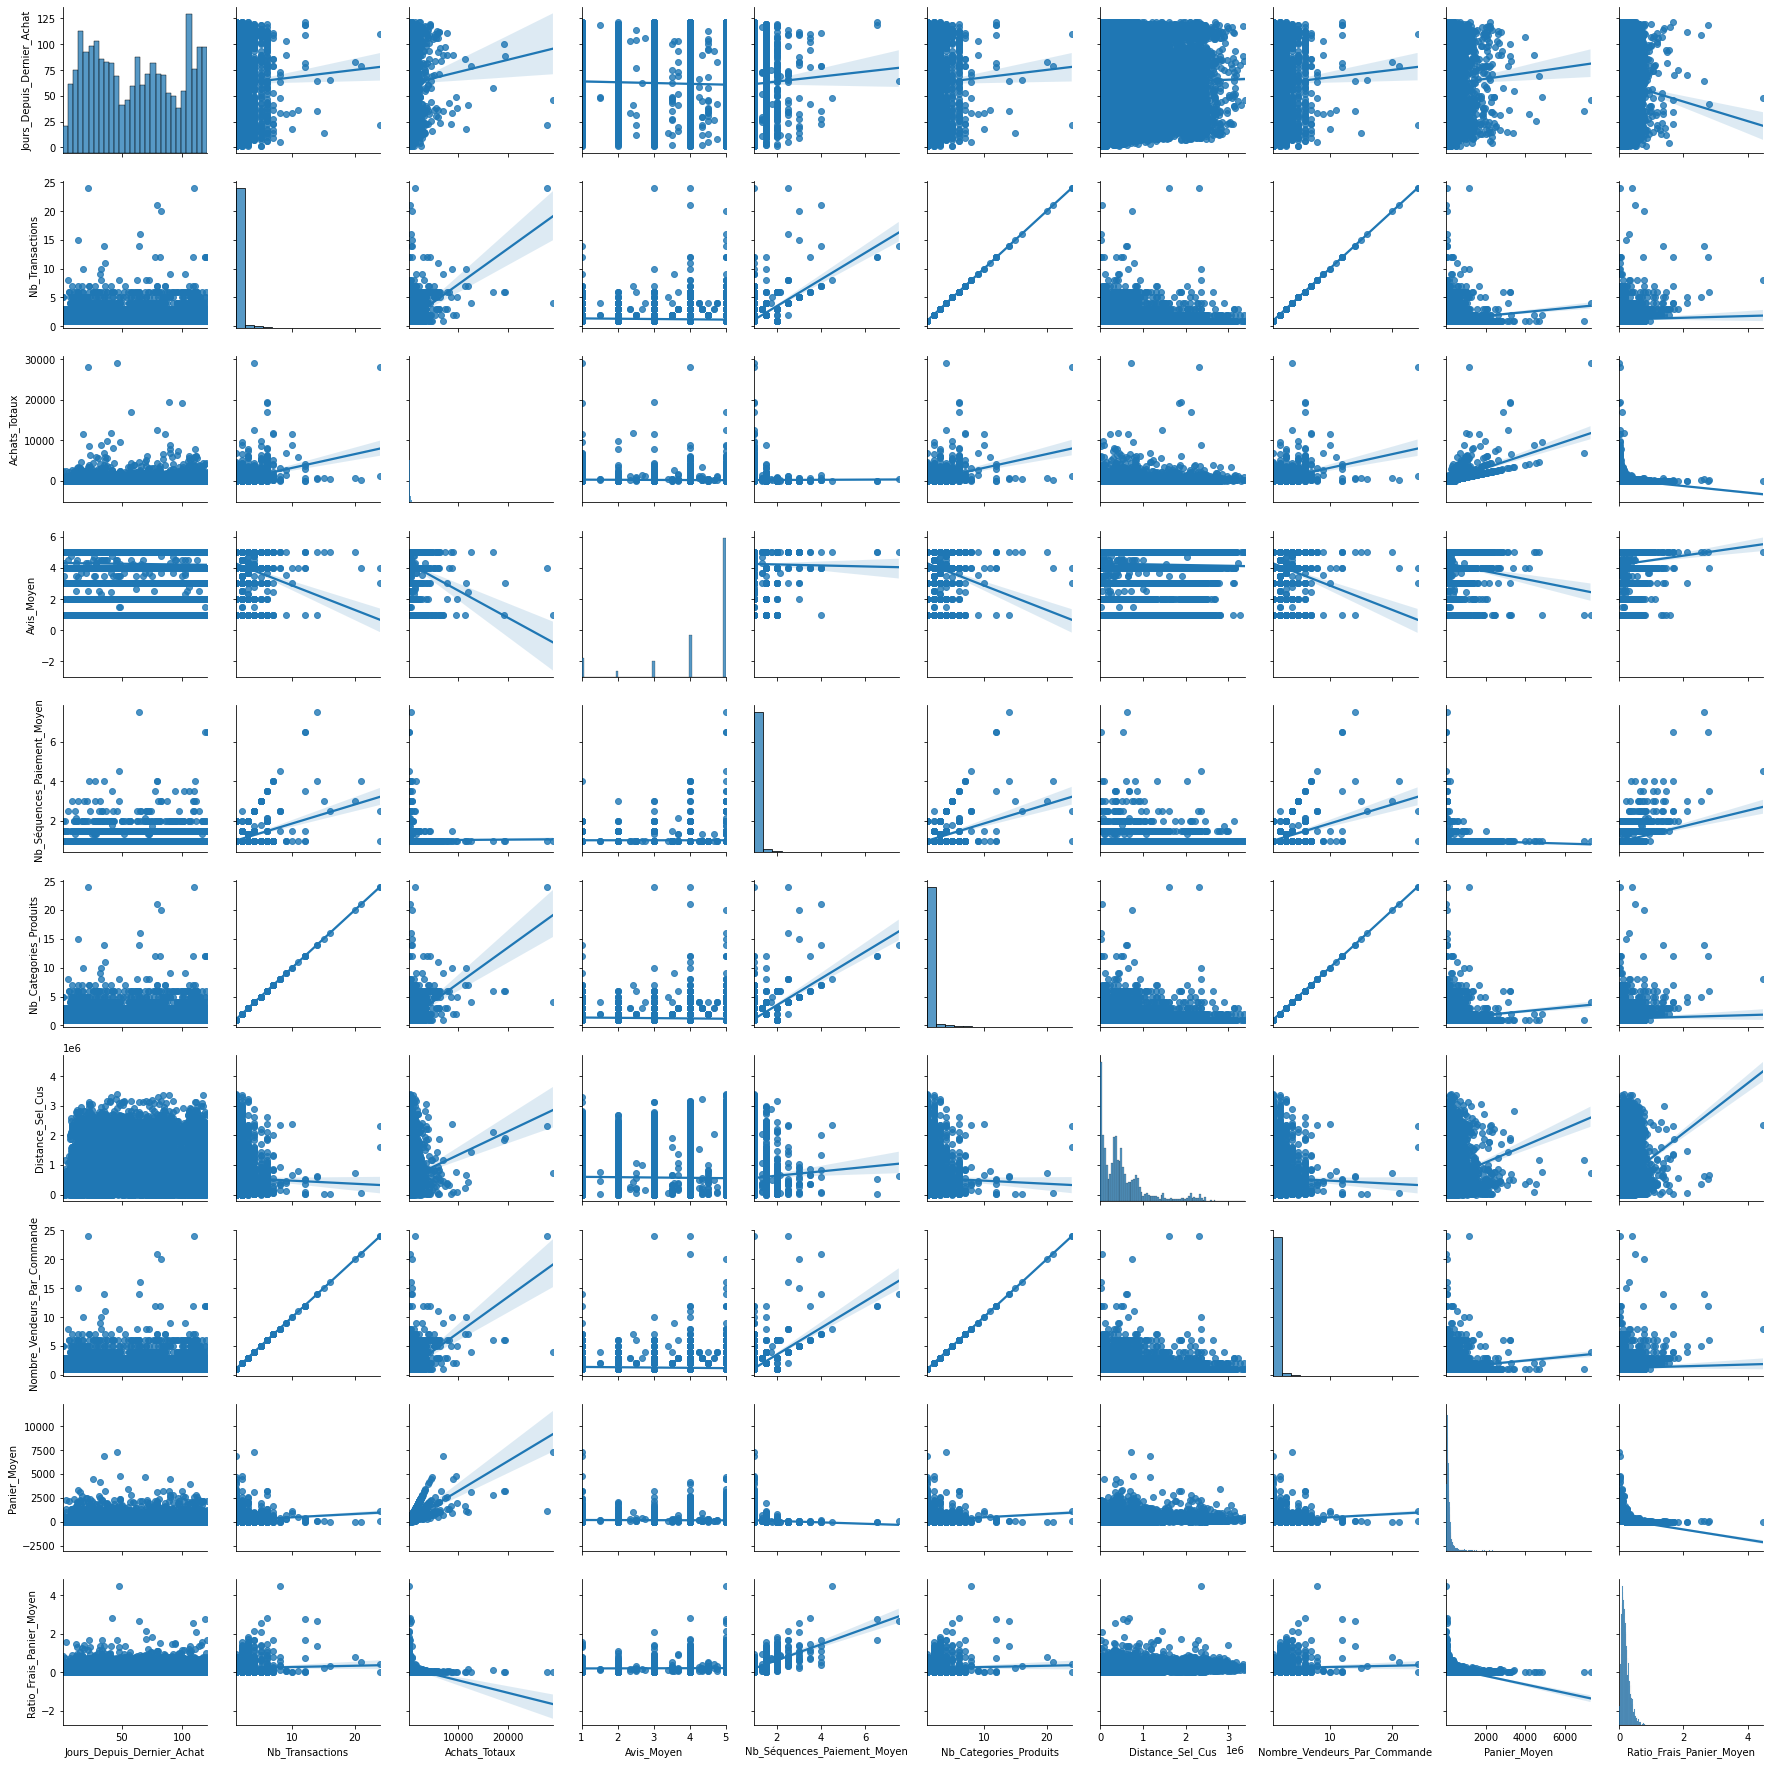

In [ ]:
sns.pairplot(df6_final, kind='reg')

In [ ]:
# Linear regression stats for df1_final
for var1 in list_var:
    for var2 in list_var:
        reg_lin_VF(df1_final, var1, var2)

Jours_Depuis_Dernier_Achat Jours_Depuis_Dernier_Achat
Le r de pearson est 1.0 rpearson
La covariance empirique est 30.587423640480154 covar
           n    r       CI95%   r2  adj_r2  p-val BF10  power
pearson  306  1.0  [1.0, 1.0]  1.0     1.0    0.0  nan    1.0
######################################################
Jours_Depuis_Dernier_Achat Nb_Transactions
Le r de pearson est 0.018655170006380593 rpearson
La covariance empirique est 0.08748771839890657 covar
           n         r          CI95%        r2   adj_r2     p-val   BF10  \
pearson  306  0.018655  [-0.09, 0.13]  0.000348 -0.00625  0.745162  0.075   

            power  
pearson  0.062148  
######################################################
Jours_Depuis_Dernier_Achat Achats_Totaux
Le r de pearson est 0.03230718553392536 rpearson
La covariance empirique est 68.11256567986673 covar
           n         r          CI95%        r2   adj_r2     p-val   BF10  \
pearson  306  0.032307  [-0.08, 0.14]  0.001044 -0.00555  0.57344

/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))
/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))


La covariance empirique est -22.736593498408446 covar
           n         r           CI95%       r2    adj_r2         p-val  \
pearson  306 -0.372841  [-0.47, -0.27]  0.13901  0.133327  1.584669e-11   

              BF10     power  
pearson  4.688e+08  0.999999  
######################################################
Avis_Moyen Jours_Depuis_Dernier_Achat
Le r de pearson est -0.12619944212087875 rpearson
La covariance empirique est -1.1602855739245583 covar
           n         r           CI95%        r2    adj_r2     p-val   BF10  \
pearson  306 -0.126199  [-0.23, -0.01]  0.015926  0.009431  0.027287  0.809   

           power  
pearson  0.59938  
######################################################
Avis_Moyen Nb_Transactions
Le r de pearson est -0.05532813213841895 rpearson
La covariance empirique est -0.0779935067709001 covar
           n         r          CI95%        r2    adj_r2     p-val   BF10  \
pearson  306 -0.055328  [-0.17, 0.06]  0.003061 -0.003519  0.334733  0.114 

/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))



######################################################
Nb_Categories_Produits Panier_Moyen
Le r de pearson est 0.07273385849613075 rpearson
La covariance empirique est 12.834921672372648 covar
           n         r          CI95%       r2    adj_r2     p-val   BF10  \
pearson  306  0.072734  [-0.04, 0.18]  0.00529 -0.001276  0.204514  0.159   

            power  
pearson  0.245706  
######################################################
Nb_Categories_Produits Ratio_Frais_Panier_Moyen
Le r de pearson est 0.1368961760230973 rpearson
La covariance empirique est 0.018570058278367364 covar
           n         r         CI95%        r2    adj_r2     p-val   BF10  \
pearson  306  0.136896  [0.03, 0.25]  0.018741  0.012264  0.016566  1.246   

            power  
pearson  0.670576  
######################################################
Distance_Sel_Cus Jours_Depuis_Dernier_Achat
Le r de pearson est 0.0844505859361446 rpearson
La covariance empirique est 311499.9365422834 covar
           

/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))
/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))



######################################################
Panier_Moyen Nb_Categories_Produits
Le r de pearson est 0.07273385849613075 rpearson
La covariance empirique est 12.834921672372648 covar
           n         r          CI95%       r2    adj_r2     p-val   BF10  \
pearson  306  0.072734  [-0.04, 0.18]  0.00529 -0.001276  0.204514  0.159   

            power  
pearson  0.245706  
######################################################
Panier_Moyen Distance_Sel_Cus
Le r de pearson est 0.1183922681385065 rpearson
La covariance empirique est 16431883.682828851 covar
           n         r         CI95%        r2    adj_r2     p-val   BF10  \
pearson  306  0.118392  [0.01, 0.23]  0.014017  0.007509  0.038468  0.603   

            power  
pearson  0.545218  
######################################################
Panier_Moyen Nombre_Vendeurs_Par_Commande
Le r de pearson est 0.07273385849613075 rpearson
La covariance empirique est 12.834921672372648 covar
           n         r         

In [ ]:
# Linear regression stats for df2_final
for var1 in list_var:
    for var2 in list_var:
        reg_lin_VF(df2_final, var1, var2)

Jours_Depuis_Dernier_Achat Jours_Depuis_Dernier_Achat
Le r de pearson est 1.0 rpearson
La covariance empirique est 868.658510078245 covar
            n    r       CI95%   r2  adj_r2  p-val BF10  power
pearson  7198  1.0  [1.0, 1.0]  1.0     1.0    0.0  nan    1.0
######################################################
Jours_Depuis_Dernier_Achat Nb_Transactions
Le r de pearson est 0.024512250381866066 rpearson
La covariance empirique est 0.6789804382851244 covar
            n         r        CI95%        r2    adj_r2     p-val   BF10  \
pearson  7198  0.024512  [0.0, 0.05]  0.000601  0.000323  0.037563  0.128   

            power  
pearson  0.547702  
######################################################
Jours_Depuis_Dernier_Achat Achats_Totaux
Le r de pearson est 0.00961586951365762 rpearson
La covariance empirique est 124.98643046820523 covar
            n         r          CI95%        r2    adj_r2     p-val   BF10  \
pearson  7198  0.009616  [-0.01, 0.03]  0.000092 -0.000185  0.4

/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))
/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))
/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))
/opt/anaconda3/lib/pyt

            n         r          CI95%        r2    adj_r2     p-val   BF10  \
pearson  7198  0.009616  [-0.01, 0.03]  0.000092 -0.000185  0.414673  0.021   

            power  
pearson  0.129014  
######################################################
Achats_Totaux Nb_Transactions
Le r de pearson est 0.3336601048487721 rpearson
La covariance empirique est 138.29407858346627 covar
            n        r         CI95%        r2    adj_r2          p-val  \
pearson  7198  0.33366  [0.31, 0.35]  0.111329  0.111082  1.046229e-186   

               BF10  power  
pearson  3.533e+182    1.0  
######################################################
Achats_Totaux Achats_Totaux
Le r de pearson est 1.0 rpearson
La covariance empirique est 194491.0086793507 covar
            n    r       CI95%   r2  adj_r2  p-val BF10  power
pearson  7198  1.0  [1.0, 1.0]  1.0     1.0    0.0  nan    1.0
######################################################
Achats_Totaux Avis_Moyen
Le r de pearson est -0.053459163

/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))
/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))


            n         r          CI95%        r2    adj_r2     p-val   BF10  \
pearson  7198  0.002652  [-0.02, 0.03]  0.000007 -0.000271  0.821988  0.015   

            power  
pearson  0.055817  
######################################################
Nb_Séquences_Paiement_Moyen Avis_Moyen
Le r de pearson est -0.009589567910690336 rpearson
La covariance empirique est -0.0035038119215687973 covar
            n        r          CI95%        r2    adj_r2     p-val   BF10  \
pearson  7198 -0.00959  [-0.03, 0.01]  0.000092 -0.000186  0.415951  0.021   

            power  
pearson  0.128571  
######################################################
Nb_Séquences_Paiement_Moyen Nb_Séquences_Paiement_Moyen
Le r de pearson est 0.9999999999999997 rpearson
La covariance empirique est 0.07476037157731664 covar
            n    r       CI95%   r2  adj_r2  p-val BF10  power
pearson  7198  1.0  [1.0, 1.0]  1.0     1.0    0.0  nan    1.0
######################################################
Nb_Séque

/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))
/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))
/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))
/opt/anaconda3/lib/pyt

            n         r          CI95%        r2    adj_r2     p-val   BF10  \
pearson  7198  0.004412  [-0.02, 0.03]  0.000019 -0.000258  0.708211  0.016   

            power  
pearson  0.066194  
######################################################
Distance_Sel_Cus Nb_Categories_Produits
Le r de pearson est -0.00784698626714431 rpearson
La covariance empirique est -4605.057623056953 covar
            n         r          CI95%        r2    adj_r2     p-val   BF10  \
pearson  7198 -0.007847  [-0.03, 0.02]  0.000062 -0.000216  0.505641  0.018   

            power  
pearson  0.102102  
######################################################
Distance_Sel_Cus Distance_Sel_Cus
Le r de pearson est 1.0 rpearson
La covariance empirique est 389910809291.40045 covar
            n    r       CI95%   r2  adj_r2  p-val BF10  power
pearson  7198  1.0  [1.0, 1.0]  1.0     1.0    0.0  nan    1.0
######################################################
Distance_Sel_Cus Nombre_Vendeurs_Par_Commande
Le

/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))
/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))
/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))


            n         r         CI95%        r2    adj_r2     p-val   BF10  \
pearson  7198  0.031722  [0.01, 0.05]  0.001006  0.000729  0.007112  0.552   

            power  
pearson  0.767877  
######################################################
Panier_Moyen Distance_Sel_Cus
Le r de pearson est 0.06572339153978064 rpearson
La covariance empirique est 10453327.291086923 covar
            n         r         CI95%       r2    adj_r2         p-val  \
pearson  7198  0.065723  [0.04, 0.09]  0.00432  0.004043  2.389934e-08   

              BF10     power  
pearson  8.549e+04  0.999855  
######################################################
Panier_Moyen Nombre_Vendeurs_Par_Commande
Le r de pearson est 0.03172193184656613 rpearson
La covariance empirique est 7.593834202880905 covar
            n         r         CI95%        r2    adj_r2     p-val   BF10  \
pearson  7198  0.031722  [0.01, 0.05]  0.001006  0.000729  0.007112  0.552   

            power  
pearson  0.767877  
##########

/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))


In [ ]:
# Linear regression stats for df3_final
for var1 in list_var:
    for var2 in list_var:
        reg_lin_VF(df3_final, var1, var2)

Jours_Depuis_Dernier_Achat Jours_Depuis_Dernier_Achat
Le r de pearson est 1.0 rpearson
La covariance empirique est 1289.8947432323403 covar
             n    r       CI95%   r2  adj_r2  p-val BF10  power
pearson  14425  1.0  [1.0, 1.0]  1.0     1.0    0.0  nan    1.0
######################################################
Jours_Depuis_Dernier_Achat Nb_Transactions
Le r de pearson est -0.011227874373746064 rpearson
La covariance empirique est -0.41947325946372926 covar
             n         r          CI95%        r2    adj_r2     p-val   BF10  \
pearson  14425 -0.011228  [-0.03, 0.01]  0.000126 -0.000013  0.177517  0.026   

            power  
pearson  0.270905  
######################################################
Jours_Depuis_Dernier_Achat Achats_Totaux
Le r de pearson est -0.00945825520461267 rpearson
La covariance empirique est -179.95537460433943 covar
             n         r          CI95%        r2    adj_r2     p-val  BF10  \
pearson  14425 -0.009458  [-0.03, 0.01]  0.00008

/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))
/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))
/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))
/opt/anaconda3/lib/pyt

             n         r          CI95%        r2    adj_r2     p-val  BF10  \
pearson  14425 -0.009458  [-0.03, 0.01]  0.000089 -0.000049  0.255997  0.02   

            power  
pearson  0.205939  
######################################################
Achats_Totaux Nb_Transactions
Le r de pearson est 0.3276365560884845 rpearson
La covariance empirique est 180.55046414600113 covar
             n         r         CI95%        r2    adj_r2  p-val BF10  power
pearson  14425  0.327637  [0.31, 0.34]  0.107346  0.107222    0.0  inf    1.0
######################################################
Achats_Totaux Achats_Totaux
Le r de pearson est 0.9999999999999999 rpearson
La covariance empirique est 280642.4188897825 covar
             n    r       CI95%   r2  adj_r2  p-val BF10  power
pearson  14425  1.0  [1.0, 1.0]  1.0     1.0    0.0  nan    1.0
######################################################
Achats_Totaux Avis_Moyen
Le r de pearson est -0.053981415060051136 rpearson
La covariance emp

/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))
/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))
/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))
/opt/anaconda3/lib/pyt

             n         r          CI95%            r2    adj_r2     p-val  \
pearson  14425 -0.000044  [-0.02, 0.02]  1.922714e-09 -0.000139  0.995798   

         BF10     power  
pearson  0.01  0.050002  
######################################################
Nb_Séquences_Paiement_Moyen Avis_Moyen
Le r de pearson est -0.008581005904307281 rpearson
La covariance empirique est -0.002720681309301625 covar
             n         r          CI95%        r2    adj_r2     p-val   BF10  \
pearson  14425 -0.008581  [-0.02, 0.01]  0.000074 -0.000065  0.302755  0.018   

            power  
pearson  0.177732  
######################################################
Nb_Séquences_Paiement_Moyen Nb_Séquences_Paiement_Moyen
Le r de pearson est 1.0 rpearson
La covariance empirique est 0.06480118786348081 covar
             n    r       CI95%   r2  adj_r2  p-val BF10  power
pearson  14425  1.0  [1.0, 1.0]  1.0     1.0    0.0  nan    1.0
######################################################
Nb_Séquenc

/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))
/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))
/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))
/opt/anaconda3/lib/pyt

La covariance empirique est -11813.448569709293 covar
             n         r          CI95%        r2    adj_r2     p-val   BF10  \
pearson  14425 -0.019065  [-0.04, -0.0]  0.000363  0.000225  0.022034  0.144   

            power  
pearson  0.629277  
######################################################
Distance_Sel_Cus Distance_Sel_Cus
Le r de pearson est 1.0 rpearson
La covariance empirique est 354836234953.3442 covar
             n    r       CI95%   r2  adj_r2  p-val BF10  power
pearson  14425  1.0  [1.0, 1.0]  1.0     1.0    0.0  nan    1.0
######################################################
Distance_Sel_Cus Nombre_Vendeurs_Par_Commande
Le r de pearson est -0.019064837776597177 rpearson
La covariance empirique est -11813.448569709293 covar
             n         r          CI95%        r2    adj_r2     p-val   BF10  \
pearson  14425 -0.019065  [-0.04, -0.0]  0.000363  0.000225  0.022034  0.144   

            power  
pearson  0.629277  
####################################

La covariance empirique est 10.716801793192978 covar
             n         r         CI95%        r2    adj_r2         p-val  \
pearson  14425  0.050551  [0.03, 0.07]  0.002555  0.002417  1.242080e-09   

              BF10     power  
pearson  1.074e+06  0.999981  
######################################################
Panier_Moyen Panier_Moyen
Le r de pearson est 1.0 rpearson
La covariance empirique est 41535.11379134038 covar
             n    r       CI95%   r2  adj_r2  p-val BF10  power
pearson  14425  1.0  [1.0, 1.0]  1.0     1.0    0.0  nan    1.0
######################################################
Panier_Moyen Ratio_Frais_Panier_Moyen
Le r de pearson est -0.3550375336359186 rpearson
La covariance empirique est -11.959833386000337 covar
             n         r           CI95%        r2   adj_r2  p-val BF10  power
pearson  14425 -0.355038  [-0.37, -0.34]  0.126052  0.12593    0.0  inf    1.0
######################################################
Ratio_Frais_Panier_Moyen Jour

/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))
/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))


In [ ]:
# Linear regression stats for df4_final
for var1 in list_var:
    for var2 in list_var:
        reg_lin_VF(df4_final, var1, var2)

Jours_Depuis_Dernier_Achat Jours_Depuis_Dernier_Achat
Le r de pearson est 1.0 rpearson
La covariance empirique est 1092.5727629570874 covar
             n    r       CI95%   r2  adj_r2  p-val BF10  power
pearson  20956  1.0  [1.0, 1.0]  1.0     1.0    0.0  nan    1.0
######################################################
Jours_Depuis_Dernier_Achat Nb_Transactions
Le r de pearson est 0.009608188529184283 rpearson
La covariance empirique est 0.2594731520293145 covar
             n         r         CI95%        r2    adj_r2     p-val   BF10  \
pearson  20956  0.009608  [-0.0, 0.02]  0.000092 -0.000003  0.164271  0.023   

            power  
pearson  0.285049  
######################################################
Jours_Depuis_Dernier_Achat Achats_Totaux
Le r de pearson est 0.018604816173252457 rpearson
La covariance empirique est 576.3058409156555 covar
             n         r         CI95%        r2    adj_r2     p-val   BF10  \
pearson  20956  0.018605  [0.01, 0.03]  0.000346  0.000

/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))
/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))
/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))
/opt/anaconda3/lib/pyt

             n         r         CI95%        r2    adj_r2         p-val  \
pearson  20956  0.129435  [0.12, 0.14]  0.016753  0.016659  5.661172e-79   

              BF10  power  
pearson  6.386e+74    1.0  
######################################################
Achats_Totaux Jours_Depuis_Dernier_Achat
Le r de pearson est 0.018604816173252457 rpearson
La covariance empirique est 576.3058409156555 covar
             n         r         CI95%        r2    adj_r2     p-val   BF10  \
pearson  20956  0.018605  [0.01, 0.03]  0.000346  0.000251  0.007074  0.325   

            power  
pearson  0.768369  
######################################################
Achats_Totaux Nb_Transactions
Le r de pearson est 0.32370785504504546 rpearson
La covariance empirique est 247.84571672416942 covar
             n         r         CI95%        r2    adj_r2  p-val BF10  power
pearson  20956  0.323708  [0.31, 0.34]  0.104787  0.104701    0.0  inf    1.0
###################################################

/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))
/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))


Le r de pearson est 0.5567118079707503 rpearson
La covariance empirique est 0.08433234620187169 covar
             n         r         CI95%        r2    adj_r2  p-val BF10  power
pearson  20956  0.556712  [0.55, 0.57]  0.309928  0.309862    0.0  inf    1.0
######################################################
Nb_Séquences_Paiement_Moyen Achats_Totaux
Le r de pearson est -0.0040057230109483396 rpearson
La covariance empirique est -0.6960194753118037 covar
             n         r          CI95%        r2    adj_r2    p-val  BF10  \
pearson  20956 -0.004006  [-0.02, 0.01]  0.000016 -0.000079  0.56202  0.01   

           power  
pearson  0.08932  
######################################################
Nb_Séquences_Paiement_Moyen Avis_Moyen
Le r de pearson est -0.007361973008281604 rpearson
La covariance empirique est -0.0018581020151043522 covar
             n         r          CI95%        r2    adj_r2     p-val   BF10  \
pearson  20956 -0.007362  [-0.02, 0.01]  0.000054 -0.000041  0

/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))
/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))
/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))
/opt/anaconda3/lib/pyt

             n         r         CI95%        r2    adj_r2     p-val    BF10  \
pearson  20956  0.027865  [0.01, 0.04]  0.000776  0.000681  0.000055  29.604   

           power  
pearson  0.98099  
######################################################
Distance_Sel_Cus Avis_Moyen
Le r de pearson est -0.06268450480776161 rpearson
La covariance empirique est -50257.1708394532 covar
             n         r           CI95%        r2    adj_r2         p-val  \
pearson  20956 -0.062685  [-0.08, -0.05]  0.003929  0.003834  1.058971e-19   

              BF10  power  
pearson  7.077e+15    1.0  
######################################################
Distance_Sel_Cus Nb_Séquences_Paiement_Moyen
Le r de pearson est 0.002544873479435354 rpearson
La covariance empirique est 277.9103663652378 covar
             n         r          CI95%        r2    adj_r2    p-val   BF10  \
pearson  20956  0.002545  [-0.01, 0.02]  0.000006 -0.000089  0.71259  0.009   

            power  
pearson  0.065685  
##

/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))
/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))


Le r de pearson est -0.05413412828180301 rpearson
La covariance empirique est -2.228165423867054 covar
             n         r           CI95%        r2    adj_r2         p-val  \
pearson  20956 -0.054134  [-0.07, -0.04]  0.002931  0.002835  4.439903e-15   

              BF10  power  
pearson  1.949e+11    1.0  
######################################################
Panier_Moyen Nb_Categories_Produits
Le r de pearson est 0.12274248339139376 rpearson
La covariance empirique est 22.261729023369682 covar
             n         r         CI95%        r2    adj_r2         p-val  \
pearson  20956  0.122742  [0.11, 0.14]  0.015066  0.014972  3.791098e-71   

              BF10  power  
pearson  1.007e+67    1.0  
######################################################
Panier_Moyen Distance_Sel_Cus
Le r de pearson est 0.10690233475601932 rpearson
La covariance empirique est 13977386.594107892 covar
             n         r         CI95%        r2    adj_r2         p-val  \
pearson  20956  0.1

/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))


In [ ]:
# Linear regression stats for df5_final
for var1 in list_var:
    for var2 in list_var:
        reg_lin_VF(df5_final, var1, var2)

Jours_Depuis_Dernier_Achat Jours_Depuis_Dernier_Achat
Le r de pearson est 1.0 rpearson
La covariance empirique est 1183.1429613979367 covar
             n    r       CI95%   r2  adj_r2  p-val BF10  power
pearson  26861  1.0  [1.0, 1.0]  1.0     1.0    0.0  nan    1.0
######################################################
Jours_Depuis_Dernier_Achat Nb_Transactions
Le r de pearson est -0.010334171265107592 rpearson
La covariance empirique est -0.266272661097549 covar
             n         r         CI95%        r2    adj_r2     p-val   BF10  \
pearson  26861 -0.010334  [-0.02, 0.0]  0.000107  0.000032  0.090329  0.032   

            power  
pearson  0.395145  
######################################################
Jours_Depuis_Dernier_Achat Achats_Totaux
Le r de pearson est -0.018770174629244896 rpearson
La covariance empirique est -358.7531080323603 covar
             n        r           CI95%        r2    adj_r2     p-val   BF10  \
pearson  26861 -0.01877  [-0.03, -0.01]  0.000352  

/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))


             n        r           CI95%        r2    adj_r2     p-val   BF10  \
pearson  26861 -0.01877  [-0.03, -0.01]  0.000352  0.000278  0.002095  0.868   

            power  
pearson  0.867914  
######################################################
Achats_Totaux Nb_Transactions
Le r de pearson est 0.5347575539587236 rpearson
La covariance empirique est 222.58607261156862 covar
             n         r         CI95%        r2    adj_r2  p-val BF10  power
pearson  26861  0.534758  [0.53, 0.54]  0.285966  0.285912    0.0  inf    1.0
######################################################
Achats_Totaux Achats_Totaux
Le r de pearson est 0.9999999999999998 rpearson
La covariance empirique est 308757.4843676229 covar
             n    r       CI95%   r2  adj_r2  p-val BF10  power
pearson  26861  1.0  [1.0, 1.0]  1.0     1.0    0.0  nan    1.0
######################################################
Achats_Totaux Avis_Moyen
Le r de pearson est -0.07731485656128187 rpearson
La covariance em

/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))
/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))


             n         r         CI95%        r2    adj_r2  p-val BF10  power
pearson  26861  0.443881  [0.43, 0.45]  0.197031  0.196971    0.0  inf    1.0
######################################################
Nb_Séquences_Paiement_Moyen Achats_Totaux
Le r de pearson est -0.0035800640044861016 rpearson
La covariance empirique est -0.3163104859824334 covar
             n        r          CI95%        r2    adj_r2    p-val   BF10  \
pearson  26861 -0.00358  [-0.02, 0.01]  0.000013 -0.000062  0.55739  0.009   

            power  
pearson  0.090276  
######################################################
Nb_Séquences_Paiement_Moyen Avis_Moyen
Le r de pearson est 0.001722177795632922 rpearson
La covariance empirique est 0.00039378095153311005 covar
             n         r          CI95%        r2    adj_r2     p-val   BF10  \
pearson  26861  0.001722  [-0.01, 0.01]  0.000003 -0.000071  0.777759  0.008   

            power  
pearson  0.059174  
##########################################

             n         r           CI95%        r2   adj_r2         p-val  \
pearson  26861 -0.102241  [-0.11, -0.09]  0.010453  0.01038  2.446516e-63   

              BF10  power  
pearson  1.468e+59    1.0  
######################################################
Distance_Sel_Cus Nb_Séquences_Paiement_Moyen
Le r de pearson est 0.005029395453444437 rpearson
La covariance empirique est 469.4625996851609 covar
             n         r          CI95%        r2    adj_r2     p-val   BF10  \
pearson  26861  0.005029  [-0.01, 0.02]  0.000025 -0.000049  0.409797  0.011   

            power  
pearson  0.130722  
######################################################
Distance_Sel_Cus Nb_Categories_Produits
Le r de pearson est -0.016494113105571376 rpearson
La covariance empirique est -7253.24659951911 covar
             n         r          CI95%        r2    adj_r2     p-val   BF10  \
pearson  26861 -0.016494  [-0.03, -0.0]  0.000272  0.000198  0.006865  0.295   

            power  
pearson

/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))


             n         r         CI95%        r2    adj_r2         p-val  \
pearson  26861  0.123375  [0.11, 0.14]  0.015221  0.015148  1.369178e-91   

              BF10  power  
pearson  2.165e+87    1.0  
######################################################
Panier_Moyen Distance_Sel_Cus
Le r de pearson est 0.10671004049771621 rpearson
La covariance empirique est 12302475.335454883 covar
             n        r         CI95%        r2    adj_r2         p-val  \
pearson  26861  0.10671  [0.09, 0.12]  0.011387  0.011313  7.303390e-69   

              BF10  power  
pearson  4.708e+64    1.0  
######################################################
Panier_Moyen Nombre_Vendeurs_Par_Commande
Le r de pearson est 0.12337464606925874 rpearson
La covariance empirique est 18.14990209587698 covar
             n         r         CI95%        r2    adj_r2         p-val  \
pearson  26861  0.123375  [0.11, 0.14]  0.015221  0.015148  1.369178e-91   

              BF10  power  
pearson  2.165e+87

/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))


In [ ]:
# Linear regression stats for df6_final
for var1 in list_var:
    for var2 in list_var:
        reg_lin_VF(df6_final, var1, var2)

Jours_Depuis_Dernier_Achat Jours_Depuis_Dernier_Achat
Le r de pearson est 1.0 rpearson
La covariance empirique est 1250.839997613682 covar
             n    r       CI95%   r2  adj_r2  p-val BF10  power
pearson  25138  1.0  [1.0, 1.0]  1.0     1.0    0.0  nan    1.0
######################################################
Jours_Depuis_Dernier_Achat Nb_Transactions
Le r de pearson est 0.014626651626306459 rpearson
La covariance empirique est 0.36784236716246205 covar


/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))


             n         r        CI95%        r2    adj_r2     p-val   BF10  \
pearson  25138  0.014627  [0.0, 0.03]  0.000214  0.000134  0.020392  0.116   

           power  
pearson  0.64027  
######################################################
Jours_Depuis_Dernier_Achat Achats_Totaux
Le r de pearson est 0.017669158147687297 rpearson
La covariance empirique est 329.31110360777456 covar
             n         r         CI95%        r2    adj_r2     p-val BF10  \
pearson  25138  0.017669  [0.01, 0.03]  0.000312  0.000233  0.005086  0.4   

            power  
pearson  0.800009  
######################################################
Jours_Depuis_Dernier_Achat Avis_Moyen
Le r de pearson est -0.027083691103999087 rpearson
La covariance empirique est -1.178717909281068 covar
             n         r           CI95%        r2    adj_r2     p-val  \
pearson  25138 -0.027084  [-0.04, -0.01]  0.000734  0.000654  0.000017   

           BF10     power  
pearson  79.944  0.990229  
#########

/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))
/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))
/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))


             n         r         CI95%        r2    adj_r2         p-val  \
pearson  25138  0.032297  [0.02, 0.04]  0.001043  0.000964  3.027959e-07   

             BF10     power  
pearson  3923.849  0.999217  
######################################################
Achats_Totaux Jours_Depuis_Dernier_Achat
Le r de pearson est 0.017669158147687297 rpearson
La covariance empirique est 329.31110360777456 covar
             n         r         CI95%        r2    adj_r2     p-val BF10  \
pearson  25138  0.017669  [0.01, 0.03]  0.000312  0.000233  0.005086  0.4   

            power  
pearson  0.800009  
######################################################
Achats_Totaux Nb_Transactions
Le r de pearson est 0.4593806934066061 rpearson
La covariance empirique est 172.13862376208118 covar
             n         r         CI95%        r2    adj_r2  p-val BF10  power
pearson  25138  0.459381  [0.45, 0.47]  0.211031  0.210968    0.0  inf    1.0
###################################################

/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))
/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))
/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))


             n         r          CI95%        r2    adj_r2     p-val   BF10  \
pearson  25138  0.006192  [-0.01, 0.02]  0.000038 -0.000041  0.326266  0.013   

            power  
pearson  0.165597  
######################################################
Nb_Séquences_Paiement_Moyen Avis_Moyen
Le r de pearson est -0.0037848452470136975 rpearson
La covariance empirique est -0.0006743855956432296 covar
             n         r          CI95%        r2    adj_r2     p-val   BF10  \
pearson  25138 -0.003785  [-0.02, 0.01]  0.000014 -0.000065  0.548467  0.009   

            power  
pearson  0.092163  
######################################################
Nb_Séquences_Paiement_Moyen Nb_Séquences_Paiement_Moyen
Le r de pearson est 1.0 rpearson
La covariance empirique est 0.020966117559707866 covar
             n    r       CI95%   r2  adj_r2  p-val BF10  power
pearson  25138  1.0  [1.0, 1.0]  1.0     1.0    0.0  nan    1.0
######################################################
Nb_Séquences_

/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))
/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))
/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))
/opt/anaconda3/lib/pyt

             n         r         CI95%        r2    adj_r2         p-val  \
pearson  25138  0.071382  [0.06, 0.08]  0.005095  0.005016  9.157137e-30   

              BF10  power  
pearson  6.009e+25    1.0  
######################################################
Distance_Sel_Cus Avis_Moyen
Le r de pearson est -0.02343552635362821 rpearson
La covariance empirique est -16866.576863177015 covar
             n         r           CI95%        r2   adj_r2     p-val   BF10  \
pearson  25138 -0.023436  [-0.04, -0.01]  0.000549  0.00047  0.000202  7.875   

            power  
pearson  0.960478  
######################################################
Distance_Sel_Cus Nb_Séquences_Paiement_Moyen
Le r de pearson est 0.018307326123809014 rpearson
La covariance empirique est 1550.3687782280501 covar
             n         r         CI95%        r2    adj_r2     p-val   BF10  \
pearson  25138  0.018307  [0.01, 0.03]  0.000335  0.000256  0.003699  0.534   

            power  
pearson  0.827124  
#

/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))
/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))


             n         r        CI95%        r2    adj_r2  p-val BF10  power
pearson  25138  0.710898  [0.7, 0.72]  0.505376  0.505336    0.0  inf    1.0
######################################################
Panier_Moyen Avis_Moyen
Le r de pearson est -0.047537173234702995 rpearson
La covariance empirique est -13.512177263334962 covar
             n         r           CI95%       r2   adj_r2         p-val  \
pearson  25138 -0.047537  [-0.06, -0.04]  0.00226  0.00218  4.667687e-14   

              BF10  power  
pearson  1.759e+10    1.0  
######################################################
Panier_Moyen Nb_Séquences_Paiement_Moyen
Le r de pearson est -0.04605151021643971 rpearson
La covariance empirique est -1.540258861181996 covar
             n         r           CI95%        r2    adj_r2         p-val  \
pearson  25138 -0.046052  [-0.06, -0.03]  0.002121  0.002041  2.773402e-13   

              BF10  power  
pearson  3.053e+09    1.0  
#########################################

/opt/anaconda3/lib/python3.7/site-packages/pingouin/effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
/opt/anaconda3/lib/python3.7/site-packages/pingouin/power.py:899: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))


## Supprimer certaines variables corrélées 

In [ ]:
df1_final.drop(columns=['Nb_Transactions',
                        'Nombre_Vendeurs_Par_Commande',
                        'Avis_Moyen',
                        'Distance_Sel_Cus'
                        ], inplace=True)
df1_final.sample(5)

Periode  ... Ratio_Frais_Panier_Moyen
102       1  ...                 0.169698
96        1  ...                 0.103930
89        1  ...                 0.031206
136       1  ...                 0.071926
202       1  ...                 0.201417

[5 rows x 8 columns]

In [ ]:
df2_final.drop(columns=['Nb_Transactions',
                        'Nombre_Vendeurs_Par_Commande',
                        'Avis_Moyen',
                        'Distance_Sel_Cus'
                        ], inplace=True)
df2_final.sample(5)

Periode  ... Ratio_Frais_Panier_Moyen
549        2  ...                 0.222222
2772       2  ...                 0.165421
5554       2  ...                 0.098522
3958       2  ...                 0.199908
4999       2  ...                 0.089805

[5 rows x 8 columns]

In [ ]:
df3_final.drop(columns=['Nb_Transactions',
                        'Nombre_Vendeurs_Par_Commande',
                        'Avis_Moyen',
                        'Distance_Sel_Cus'
                        ], inplace=True)
df3_final.sample(5)

Periode  ... Ratio_Frais_Panier_Moyen
2109        3  ...                 0.209327
387         3  ...                 0.243722
4715        3  ...                 0.093165
10886       3  ...                 0.161434
6519        3  ...                 0.222180

[5 rows x 8 columns]

In [ ]:
df4_final.drop(columns=['Nb_Transactions',
                        'Nombre_Vendeurs_Par_Commande',
                        'Avis_Moyen',
                        'Distance_Sel_Cus'
                        ], inplace=True)
df4_final.sample(5)

Periode  ... Ratio_Frais_Panier_Moyen
12058       4  ...                 0.331097
8233        4  ...                 0.117527
5482        4  ...                 0.042132
14469       4  ...                 0.165893
15366       4  ...                 0.171517

[5 rows x 8 columns]

In [ ]:
df5_final.drop(columns=['Nb_Transactions',
                        'Nombre_Vendeurs_Par_Commande',
                        'Avis_Moyen',
                        'Distance_Sel_Cus'
                        ], inplace=True)
df5_final.sample(5)

Periode  ... Ratio_Frais_Panier_Moyen
15750       5  ...                 0.071983
25030       5  ...                 0.000000
4308        5  ...                 0.139237
3657        5  ...                 0.067604
22658       5  ...                 0.249858

[5 rows x 8 columns]

In [ ]:
df6_final.drop(columns=['Nb_Transactions',
                        'Nombre_Vendeurs_Par_Commande',
                        'Avis_Moyen',
                        'Distance_Sel_Cus'
                        ], inplace=True)
df6_final.sample(5)

Periode  ... Ratio_Frais_Panier_Moyen
11250       6  ...                 0.070984
18109       6  ...                 0.184634
3475        6  ...                 0.126203
5400        6  ...                 0.217096
21991       6  ...                 0.210973

[5 rows x 8 columns]

In [ ]:
df1_final['Nb_Categories_Produits'].value_counts()

1    260
2     31
3      6
4      4
6      2
8      1
7      1
5      1
Name: Nb_Categories_Produits, dtype: int64

In [ ]:
df2_final['Nb_Categories_Produits'].value_counts()

1     6141
2      793
3      117
4       73
5       29
6       26
11       4
7        4
8        4
35       1
15       1
29       1
13       1
9        1
24       1
12       1
Name: Nb_Categories_Produits, dtype: int64

In [ ]:
df3_final['Nb_Categories_Produits'].value_counts()

1     12282
2      1559
3       286
4       170
6        43
5        40
8        12
7         8
9         5
12        5
11        5
10        2
24        1
15        1
26        1
75        1
20        1
13        1
21        1
19        1
Name: Nb_Categories_Produits, dtype: int64

In [ ]:
df4_final['Nb_Categories_Produits'].value_counts()

1     17893
2      2172
3       477
4       232
6        67
5        65
8        13
7        12
10       10
9         5
12        3
24        2
18        1
14        1
20        1
38        1
22        1
Name: Nb_Categories_Produits, dtype: int64

In [ ]:
df5_final['Nb_Categories_Produits'].value_counts()

1     23053
2      2811
3       526
4       230
5        95
6        85
7        21
10        8
12        7
8         6
9         5
11        4
14        3
13        2
15        2
24        1
21        1
20        1
Name: Nb_Categories_Produits, dtype: int64

In [ ]:
df6_final['Nb_Categories_Produits'].value_counts()

1     21842
2      2468
3       448
4       187
6        80
5        71
7        16
12        6
8         6
9         3
10        2
24        2
14        2
15        1
20        1
21        1
11        1
16        1
Name: Nb_Categories_Produits, dtype: int64

## Sauvegarder

In [ ]:
df1_final.to_csv('data1_final.csv', encoding='utf8')
df2_final.to_csv('data2_final.csv', encoding='utf8')
df3_final.to_csv('data3_final.csv', encoding='utf8')
df4_final.to_csv('data4_final.csv', encoding='utf8')
df5_final.to_csv('data5_final.csv', encoding='utf8')
df6_final.to_csv('data6_final.csv', encoding='utf8')

# Joindre les df finaux

In [ ]:
# Concatenate
dftot_final = pd.concat([
    df1_final, df2_final,
    df3_final, df4_final,
    df5_final, df6_final
])

In [ ]:
dftot_final.sample(10)

Periode                         ID_Client  Jours_Depuis_Dernier_Achat  \
19286       4  eb34fb8ca71153273b4beadf0f04111a                          83   
18326       6  ba9813b07a221d94ce5c0f7619b6c13a                          42   
14787       5  8caaf1714c79f39201cd7dc687ba5d19                          99   
23782       6  f227d62830b3214711e47660fe779f78                          50   
1515        3  1a30fcc47d99534662ce3b364f279749                          18   
16123       6  a3e9df44f0c518263a1513f7a03b2a0d                          70   
4082        3  47b1f4779cce5b6a93c5f02310ca9671                          55   
4533        2  a06d716c15cbac833955aebc7e1dbdd8                          17   
16396       5  9b9ec683f4c725d34f8844616265c45b                          57   
3955        4  30e464e301f31d494539d4918b8ce362                         110   

       Achats_Totaux  Nb_Séquences_Paiement_Moyen  Nb_Categories_Produits  \
19286          32.38                          1.0                       1   
18326         302.46                          1.0                       1   
14787          28.09                          1.0                       1   
23782          83.73                          1.0                       1   
1515          112.32                          1.0                       1   
16123          37.98                          2.5                       4   
4082          176.55                          1.0                       1   
4533          304.08                          1.0                       2   
16396         165.95                          1.0                       1   
3955          155.73                          1.0                       1   

       Ratio_Frais_Envoi_Prix_Commande  Panier_Moyen  
19286                         0.627136        32.380  
18326                         0.209888       302.460  
14787                         1.007863        28.090  
23782                         0.197854        83.730  
1515                          0.147293       112.320  
16123                         1.121788         9.495  
4082                          0.110377       176.550  
4533                          0.269115       152.040  
16396                         0.136644       165.950  
3955                          0.120360       155.730

## Sauvegarder

In [ ]:
dftot_final.to_csv('data_tot_final.csv', encoding='utf8')